In [2]:
import sys
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# 현재 노트북 파일의 경로를 기준으로 프로젝트 루트 경로를 계산
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))

# sys.path에 프로젝트 루트 경로가 없으면 추가
if project_root not in sys.path:
  sys.path.append(project_root)


In [3]:
from src.data.db_handler import DBHandler

data_store = DBHandler(db_name="data_store")

origin_df = data_store.fetch_data(table_name="kr_stock_data")

In [4]:
df = origin_df.copy()

In [5]:
df

,ticker,stck_bsop_date,prdy_vrss_x,prdy_vrss_sign_x,acml_vol_x,acml_tr_pbmn_x,stck_oprc_x,stck_hgpr_x,stck_lwpr_x,stck_clpr,flng_cls_code,sale_account,sale_cost,sale_totl_prfi,bsop_prti,op_prfi,thtr_ntin,cras,fxas,total_aset,flow_lblt,fix_lblt,total_lblt,total_cptl,grs,bsop_prfi_inrt,ntin_inrt,roe_val,eps_x,sps,bps_x,rsrv_rate,lblt_rate,bram_depn,crnt_rate,quck_rate,equt_inrt,totl_aset_inrt,cptl_ntin_rate,sale_ntin_rate,sale_totl_rate,payout_rate,ebitda,lstg_stqt,cpta,papr,scts_mket_lstg_dt,sbst_pric,thdt_clpr,bfdy_clpr,std_idst_clsf_cd_name,iscd_stat_cls_code,marg_rate,new_hgpr_lwpr_cls_code,prdy_vrss_y,prdy_ctrt,acml_tr_pbmn_y,acml_vol_y,prdy_vrss_vol_rate,stck_oprc_y,stck_hgpr_y,stck_lwpr_y,stck_mxpr,stck_llam,stck_sdpr,wghn_avrg_stck_prc,hts_frgn_ehrt,frgn_ntby_qty,pgtr_ntby_qty,pvt_scnd_dmrs_prc,pvt_frst_dmrs_prc,pvt_pont_val,pvt_frst_dmsp_prc,pvt_scnd_dmsp_prc,dmrs_val,dmsp_val,stck_sspr,aspr_unit,hts_avls,per,pbr,vol_tnrt,eps_y,bps_y,d250_hgpr,d250_hgpr_date,d250_hgpr_vrss_prpr_rate,d250_lwpr,d250_lwpr_date,d250_lwpr_vrss_prpr_rate,stck_dryy_hgpr,dryy_hgpr_vrss_prpr_rate,dryy_hgpr_date,stck_dryy_lwpr,dryy_lwpr_vrss_prpr_rate,dryy_lwpr_date,w52_hgpr,w52_hgpr_vrss_prpr_ctrt,w52_hgpr_date,w52_lwpr,w52_lwpr_vrss_prpr_ctrt,w52_lwpr_date,whol_loan_rmnd_rate,frgn_hldn_qty,last_ssts_cntg_qty,aspr_acpt_hour,askp1,askp10,bidp1,bidp10,askp_rsqn1,askp_rsqn2,askp_rsqn3,askp_rsqn4,askp_rsqn5,askp_rsqn6,askp_rsqn7,askp_rsqn8,askp_rsqn9,askp_rsqn10,bidp_rsqn1,bidp_rsqn2,bidp_rsqn3,bidp_rsqn4,bidp_rsqn5,bidp_rsqn6,bidp_rsqn7,bidp_rsqn8,bidp_rsqn9,bidp_rsqn10,total_askp_rsqn,total_bidp_rsqn,ntby_aspr_rsqn,new_mkop_cls_code,prdy_clpr_vrss_oprc_rate,lwpr_vrss_prpr,lwpr_vrss_prpr_sign,prdy_clpr_vrss_lwpr_rate,hgpr_vrss_prpr,hgpr_vrss_prpr_sign,prdy_clpr_vrss_hgpr_rate,oprc_vrss_prpr,oprc_vrss_prpr_sign,prdy_vol
0,000080,1985-01-25,0.0,3,0.0,0.000000e+00,6403.0,6403.0,6403.0,6403.0,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,70133611,363168055000,5000,2009-10-19,15320,19160,19160,알콜음료 제조업,55,40.0,NaN,-20.0,-0.10,3151539425,164607,85.87,19170,19180,19110,24900,13430,19180,19144.18,7.58,-17687.0,-23952,19413,19296,19223,19106,19033,19260,19070,15340,10,13438,14.25,1.13,0.23,1345.0,16889,22200,2025-07-07,-13.69,18680,2025-02-04,2.57,22200,-13.69,2025-07-07,18680,2.57,2025-02-04,22200,-13.69,2025-07-07,18680,2.57,2025-02-04,1.07,5313280,48024,160000,19170,19260,19160,19070,2593,1470,254,181,25,135,3,1174,23,46,298,5086,1207,5708,5010,7074,5596,2932,5652,1119,5904,39682,33778,31,-0.05,50.0,2,-0.36,-20.0,5,0.00,-10.0,5,191693
1,000080,1985-01-26,0.0,3,0.0,0.000000e+00,6403.0,6403.0,6403.0,6403.0,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,70133611,363168055000,5000,2009-10-19,15320,19160,19160,알콜음료 제조업,55,40.0,NaN,-20.0,-0.10,3151539425,164607,85.87,19170,19180,19110,24900,13430,19180,19144.18,7.58,-17687.0,-23952,19413,19296,19223,19106,19033,19260,19070,15340,10,13438,14.25,1.13,0.23,1345.0,16889,22200,2025-07-07,-13.69,18680,2025-02-04,2.57,22200,-13.69,2025-07-07,18680,2.57,2025-02-04,22200,-13.69,2025-07-07,18680,2.57,2025-02-04,1.07,5313280,48024,160000,19170,19260,19160,19070,2593,1470,254,181,25,135,3,1174,23,46,298,5086,1207,5708,5010,7074,5596,2932,5652,1119,5904,39682,33778,31,-0.05,50.0,2,-0.36,-20.0,5,0.00,-10.0,5,191693
2,000080,1985-01-28,0.0,3,0.0,0.000000e+00,6403.0,6403.0,6403.0,6403.0,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,70133611,363168055000,5000,2009-10-19,15320,19160,19160,알콜음료 제조업,55,40.0,NaN,-20.0,-0.10,3151539425,164607,85.87,19170,19180,19110,24900,13430,19180,19144.18,7.58,-17687.0,-23952,19413,19296,19223,19106,19033,19260,19070,15340,10,13438,14.25,1.13,0.23,1345.0,16889,22200,2025-07-07,-13.69,18680,2025-02-04,2.57,22200,-13.69,202

In [6]:
import pandas as pd
import numpy as np

# 1. 수치형 컬럼 선택
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# 2. 범주형 컬럼 선택
categorical_cols = df.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()
# 3. Datetime 컬럼 선택
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# --- 결과 확인 ---
print(f"총 {len(df.columns)}개의 컬럼이 3개의 그룹으로 분리되었습니다.")
print("-" * 50)
print(f"수치형 컬럼 ({len(numeric_cols)}개)")
print(f"범주형 컬럼 ({len(categorical_cols)}개)")
print(f"Datetime 컬럼 ({len(datetime_cols)}개)")
print("-" * 50)

# 최종 검증
total_classified = len(numeric_cols) + len(categorical_cols) + len(datetime_cols)
print(f"검증: {total_classified} (분류된 컬럼) == {len(df.columns)} (전체 컬럼)")

총 144개의 컬럼이 3개의 그룹으로 분리되었습니다.
--------------------------------------------------
수치형 컬럼 (126개)
범주형 컬럼 (10개)
Datetime 컬럼 (8개)
--------------------------------------------------
검증: 144 (분류된 컬럼) == 144 (전체 컬럼)


In [7]:
def log_transform(df: pd.DataFrame, columns: list) -> pd.DataFrame:
  """
  지정된 컬럼들에 대해 np.log1p (log(1+x)) 변환을 적용합니다.

  Args:
    df (pd.DataFrame): 원본 데이터프레임
    columns (list): 로그 변환을 적용할 컬럼 이름 리스트

  Returns:
    pd.DataFrame: 로그 변환이 적용된 새로운 데이터프레임
  """
  df_transformed = df.copy()
  for col in columns:
    df_transformed[col] = np.log1p(df_transformed[col])
  print(f"로그 변환이 적용된 컬럼 수: {len(columns)}")
  return df_transformed

df_log_transformed = log_transform(df, numeric_cols)

로그 변환이 적용된 컬럼 수: 126


In [8]:
def check_winsorizing_necessity(df: pd.DataFrame, columns: list, threshold: float = 3.0) -> dict:
  """
  지정된 컬럼들의 첨도(Kurtosis)를 계산하여 임계값을 초과하는지 확인합니다. 임계값은 기본적으로 3.0이고, 이는 전체 분포의 99.72%를 넘어서는 값입니다.

  Args:
    df (pd.DataFrame): 분석할 데이터프레임
    columns (list): 확인할 컬럼 이름 리스트
    threshold (float): 첨도 임계값. 이 값을 초과하면 이상치 처리를 권장.

  Returns:
    dict: 임계값을 초과한 컬럼과 해당 컬럼의 첨도 값을 담은 딕셔너리
  """
  kurtosis_values = df[columns].kurt()
  problematic_features = kurtosis_values[kurtosis_values > threshold]
  
  if problematic_features.empty:
    print("첨도 임계값을 초과하는 피처가 없습니다. 윈저라이징이 필요하지 않을 수 있습니다.")
    return {}
  else:
    print(f"첨도 임계값({threshold}) 초과 피처 (윈저라이징 권장):")
    for idx, val in problematic_features.to_dict().items():
      print(f"- {idx}: {val:.2f}")
    return problematic_features.to_dict()
  
winsorize_cols = check_winsorizing_necessity(df_log_transformed, numeric_cols)

첨도 임계값(3.0) 초과 피처 (윈저라이징 권장):
- sale_account: 6.78
- sale_cost: 5.88
- cras: 4.39
- fxas: 4.06
- total_aset: 6.74
- flow_lblt: 3.52
- total_cptl: 8.87
- sps: 11.40
- bps_x: 13.56
- rsrv_rate: 3.15
- crnt_rate: 5.46
- quck_rate: 4.55
- frgn_ntby_qty: 6.55
- vol_tnrt: 8.44
- aspr_acpt_hour: 3.76
- prdy_clpr_vrss_hgpr_rate: 3.22


In [9]:
def apply_winsorizing(df: pd.DataFrame, columns: list, lower_limit: float = 0.01, upper_limit: float = 0.99) -> pd.DataFrame:
  """
  지정된 컬럼들에 대해 윈저라이징을 적용하여 이상치를 대체합니다.

  Args:
    df (pd.DataFrame): 원본 데이터프레임
    columns (list): 윈저라이징을 적용할 컬럼 이름 리스트
    lower_limit (float): 하위 경계 백분위수 (e.g., 0.01은 하위 1%)
    upper_limit (float): 상위 경계 백분위수 (e.g., 0.99는 상위 99%)

  Returns:
    pd.DataFrame: 윈저라이징이 적용된 새로운 데이터프레임
  """
  df_winsorized = df.copy()
  for col in columns:
    lower_quantile = df_winsorized[col].quantile(lower_limit)
    upper_quantile = df_winsorized[col].quantile(upper_limit)
    df_winsorized[col] = df_winsorized[col].clip(lower=lower_quantile, upper=upper_quantile)
  print(f"윈저라이징이 적용된 컬럼: (하위 {lower_limit*100}%, 상위 {upper_limit*100}% 기준)")
  return df_winsorized

In [10]:
if winsorize_cols:
  df_numerical = apply_winsorizing(df_log_transformed, columns=list(winsorize_cols.keys()))
else:
  df_numerical = df_log_transformed

display(df_numerical.describe())

윈저라이징이 적용된 컬럼: (하위 1.0%, 상위 99.0% 기준)


,stck_bsop_date,prdy_vrss_x,acml_vol_x,acml_tr_pbmn_x,stck_oprc_x,stck_hgpr_x,stck_lwpr_x,stck_clpr,sale_account,sale_cost,sale_totl_prfi,bsop_prti,op_prfi,thtr_ntin,cras,fxas,total_aset,flow_lblt,fix_lblt,total_lblt,total_cptl,grs,bsop_prfi_inrt,ntin_inrt,roe_val,eps_x,sps,bps_x,rsrv_rate,lblt_rate,bram_depn,crnt_rate,quck_rate,equt_inrt,totl_aset_inrt,cptl_ntin_rate,sale_ntin_rate,sale_totl_rate,payout_rate,ebitda,lstg_stqt,cpta,papr,scts_mket_lstg_dt,sbst_pric,thdt_clpr,bfdy_clpr,marg_rate,prdy_vrss_y,prdy_ctrt,acml_tr_pbmn_y,acml_vol_y,prdy_vrss_vol_rate,stck_oprc_y,stck_hgpr_y,stck_lwpr_y,stck_mxpr,stck_llam,stck_sdpr,wghn_avrg_stck_prc,hts_frgn_ehrt,frgn_ntby_qty,pgtr_ntby_qty,pvt_scnd_dmrs_prc,pvt_frst_dmrs_prc,pvt_pont_val,pvt_frst_dmsp_prc,pvt_scnd_dmsp_prc,dmrs_val,dmsp_val,stck_sspr,aspr_unit,hts_avls,per,pbr,vol_tnrt,eps_y,bps_y,d250_hgpr,d250_hgpr_date,d250_hgpr_vrss_prpr_rate,d250_lwpr,d250_lwpr_date,d250_lwpr_vrss_prpr_rate,stck_dryy_hgpr,dryy_hgpr_vrss_prpr_rate,dryy_hgpr_date,stck_dryy_lwpr,dryy_lwpr_vrss_prpr_rate,dryy_lwpr_date,w52_hgpr,w52_hgpr_vrss_prpr_ctrt,w52_hgpr_date,w52_lwpr,w52_lwpr_vrss_prpr_ctrt,w52_lwpr_date,whol_loan_rmnd_rate,frgn_hldn_qty,last_ssts_cntg_qty,aspr_acpt_hour,askp1,askp10,bidp1,bidp10,askp_rsqn1,askp_rsqn2,askp_rsqn3,askp_rsqn4,askp_rsqn5,askp_rsqn6,askp_rsqn7,askp_rsqn8,askp_rsqn9,askp_rsqn10,bidp_rsqn1,bidp_rsqn2,bidp_rsqn3,bidp_rsqn4,bidp_rsqn5,bidp_rsqn6,bidp_rsqn7,bidp_rsqn8,bidp_rsqn9,bidp_rsqn10,total_askp_rsqn,total_bidp_rsqn,ntby_aspr_rsqn,prdy_clpr_vrss_oprc_rate,lwpr_vrss_prpr,prdy_clpr_vrss_lwpr_rate,hgpr_vrss_prpr,prdy_clpr_vrss_hgpr_rate,oprc_vrss_prpr,prdy_vol
count,1208825,5.902560e+05,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208765e+06,1.208825e+06,1.180877e+06,1.094141e+06,1.058447e+06,1.062330e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208520e+06,8.826030e+05,650337.000000,646181.000000,1.075668e+06,1.054106e+06,1.208765e+06,1.208520e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,959884.000000,943397.000000,1.119025e+06,1.098693e+06,1.182455e+06,1.177082e+06,1.174873e+06,1.208825e+06,1.208825e+06,1.208825e+06,1208825,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,372453.000000,6.496010e+05,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,547262.000000,496742.000000,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.006712e+06,1.208825e+06,1.208825e+06,1.006712e+06,1.208825e+06,1.208825e+06,1208825,38566.000000,1.208825e+06,1208825,1.208825e+06,1.208825e+06,38566.000000,1208825,1.208825e+06,1.208825e+06,1208825,1.208825e+06,38566.000000,1208825,1.208825e+06,1.208825e+06,1208825,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,763830.000000,1.093347e+06,1.208825e+06,315456.000000,100533.0,1.195940e+06,434231.000000,1.208825e+06
mean,2010-01-28 02:44:26.535850496,-inf,1.170274e+01,2.102779e+01,1.023439e+01,1.025211e+01,1.021719e+01,1.023446e+01,1.031247e+01,9.552843e+00,8.724208e+00,-inf,7.638727e+00,-inf,9.502402e+00,9.868776e+00,1.147693e+01,9.164480e+00,8.533443e+00,1.065206e+01,1.061613e+01,-inf,2.908210,2.832303,-inf,-inf,1.151382e+01,1.101885e+01,8.044371e+00,4.665399e+00,2.869448e+00,4.606860e+00,4.293757e+00,1.921541,1.954047,-inf,-inf,-inf,NaN,-inf,1.794721e+01,2.549001e+01,7.499734e+00,1991-12-26 20:46:29.060781824,1.086053e+01,1.115375e+01,1.115375e+01,3.524442e+00,5.669254,-inf,2.348407e+01,1.233038e+01,4.855649e+00,1.115680e+01,1.116966e+01,

In [11]:
import pandas as pd
import numpy as np

def create_data_info_df(dataframe):
  """
  데이터프레임의 각 컬럼에 대한 종합적인 정보(타입, 결측치, 고유값)를
  담은 새로운 데이터프레임을 생성합니다.

  Args:
    dataframe (pd.DataFrame): 분석할 원본 데이터프레임

  Returns:
    pd.DataFrame: 각 컬럼의 정보가 요약된 데이터프레임
  """
  total_rows = len(dataframe)

  # 결측치 정보 계산
  missing_counts = dataframe.isnull().sum()
  missing_percent = ((missing_counts / total_rows) * 100).round(2)

  # 고유값 정보 계산
  nunique_counts = dataframe.nunique()
  nunique_percent = ((nunique_counts / total_rows) * 100).round(2)

  # 데이터 타입 정보
  dtypes = dataframe.dtypes

  # 정보 취합
  info_df = pd.DataFrame({
    'dtype': dtypes,
    'missing_count': missing_counts,
    'missing_percent': missing_percent,
    'nunique_count': nunique_counts,
    'nunique_percent': nunique_percent
  })

  # 결측치 비율이 높은 순으로 정렬
  info_df = info_df.sort_values(by='missing_percent', ascending=False)

  return info_df

# 함수 실행 및 결과 확인
info_df_categorical = create_data_info_df(df[categorical_cols])

In [44]:
info_df_categorical.sort_values(by="nunique_count")

,dtype,missing_count,missing_percent,nunique_count,nunique_percent
iscd_stat_cls_code,object,0,0.0,2,0.00
new_hgpr_lwpr_cls_code,object,0,0.0,2,0.00
new_mkop_cls_code,object,0,0.0,2,0.00
lwpr_vrss_prpr_sign,object,0,0.0,2,0.00
hgpr_vrss_prpr_sign,object,0,0.0,2,0.00
oprc_vrss_prpr_sign,object,0,0.0,3,0.00
prdy_vrss_sign_x,object,0,0.0,5,0.00
flng_cls_code,object,0,0.0,6,0.00
std_idst_clsf_cd_name,object,0,0.0,67,0.01
ticker,object,0,0.0,200,0.02


--- 라이브러리 임포트 완료 ---
--- [0/7] 원본 데이터 로드 확인 ---
✅ 원본 데이터 로드 완료 (Shape: (1208825, 144))

--- [1/7] 산업 프로필 생성 ---
✅ 산업 프로필 생성 완료 (초기)
  - 초기 피처 수: 126

--- [2/7] 전체 파라미터 튜닝 시작 (피처 선택 + UMAP + HDBSCAN) ---
튜닝 범위:
  - 피처 선택: {'corr_threshold': [0.85, 0.9, 0.95], 'var_threshold': [0.0, 0.01, 0.05]}
  - UMAP: {'n_neighbors': [5, 10, 15, 20], 'min_dist': [0.0, 0.1, 0.25, 0.5], 'n_components': [5, 10, 16, 24], 'metric': ['euclidean', 'cosine']}
  - HDBSCAN: {'min_cluster_size': [3, 5, 7, 10]}
총 4608개의 파라미터 조합으로 튜닝을 시작합니다. (시간이 매우 오래 걸릴 수 있습니다)
실루엣 스코어 샘플링 사용: False


전체 파라미터 튜닝 진행 중: 100%|██████████| 4608/4608 [08:55<00:00,  8.61it/s]


✅ 전체 파라미터 튜닝 완료 (소요 시간: 8.92 분)

--- [3/7] 튜닝 결과 요약 및 최적 파라미터 선택 ---
튜닝 결과 (상위 5개 - 실루엣 스코어 기준):
      corr_threshold  var_threshold  n_neighbors  min_dist  n_components  \
1588             0.9           0.00            5       0.1            16   
1589             0.9           0.00            5       0.1            16   
2612             0.9           0.05            5       0.1            16   
2102             0.9           0.01            5       0.1            16   
2613             0.9           0.05            5       0.1            16   

      metric  min_cluster_size  n_clusters  n_noise  silhouette  n_features  
1588  cosine                 3           3        0      0.6387          57  
1589  cosine                 5           2        4      0.6387          57  
2612  cosine                 3           3        0      0.6387          57  
2102  cosine                 7           2        4      0.6387          57  
2613  cosine                 5           2        4     

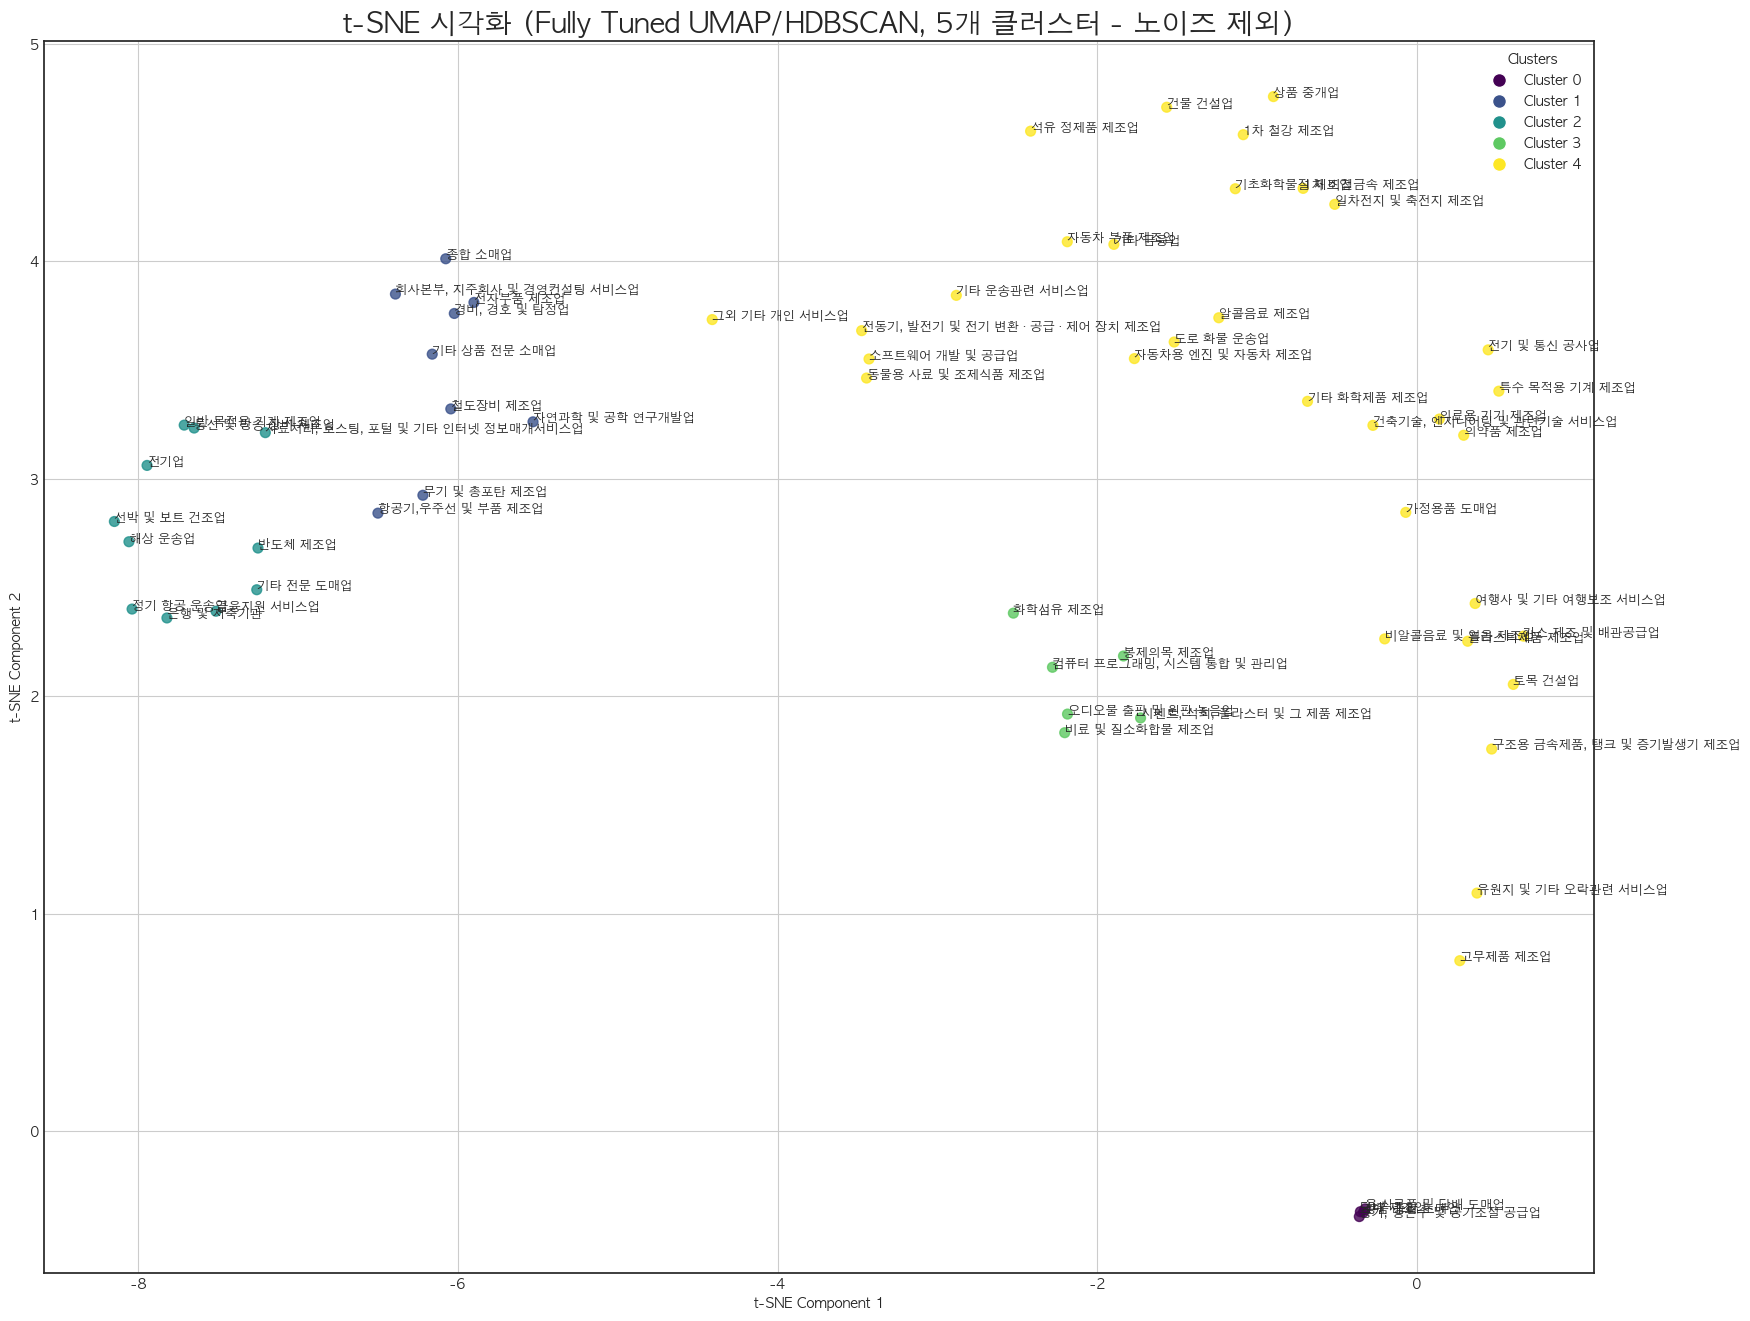


--- [7/7] 최종 클러스터 멤버 확인 (노이즈 제외) ---

--- Cluster 0 Members ---
['담배 제조업', '상품 종합 도매업', '음·식료품 및 담배 도매업', '증기, 냉온수 및 공기조절 공급업']

--- Cluster 1 Members ---
['경비, 경호 및 탐정업', '기타 상품 전문 소매업', '무기 및 총포탄 제조업', '자연과학 및 공학 연구개발업', '전자부품 제조업', '종합 소매업', '철도장비 제조업', '항공기,우주선 및 부품 제조업', '회사본부, 지주회사 및 경영컨설팅 서비스업']

--- Cluster 2 Members ---
['금융지원 서비스업', '기타 전문 도매업', '반도체 제조업', '선박 및 보트 건조업', '은행 및 저축기관', '일반 목적용 기계 제조업', '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개서비스업', '전기업', '정기 항공 운송업', '통신 및 방송 장비 제조업', '해상 운송업']

--- Cluster 3 Members ---
['봉제의복 제조업', '비료 및 질소화합물 제조업', '시멘트, 석회, 플라스터 및 그 제품 제조업', '오디오물 출판 및 원판 녹음업', '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '화학섬유 제조업']

--- Cluster 4 Members ---
['1차 비철금속 제조업', '1차 철강 제조업', '가스 제조 및 배관공급업', '가정용품 도매업', '건물 건설업', '건축기술, 엔지니어링 및 관련기술 서비스업', '고무제품 제조업', '구조용 금속제품, 탱크 및 증기발생기 제조업', '그외 기타 개인 서비스업', '기초화학물질 제조업', '기타 금융업', '기타 운송관련 서비스업', '기타 화학제품 제조업', '도로 화물 운송업', '동물용 사료 및 조제식품 제조업', '비알콜음료 및 얼음 제조업', '상품 중개업', '석유 정제품 제조업', '소프트웨어 개발 및 공급업', '알콜음료 제조업', '여행사 및 기타 여행보조 서비

In [ ]:
# ! 최종
# ==============================================================================
# 0. 라이브러리 임포트
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from sklearn.preprocessing import StandardScaler, RobustScaler # 스케일러
from sklearn.feature_selection import VarianceThreshold # 분산 기반 제거
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score # 실루엣 스코어 추가
import umap.umap_ as umap
import hdbscan
from itertools import product
from tqdm import tqdm
import matplotlib.cm as cm
import time # 시간 측정을 위해 추가

print("--- 라이브러리 임포트 완료 ---")

# ==============================================================================
# --- !!! 사용자 설정 변수 !!! ---
# ==============================================================================
# 1. 데이터 로드 (사용자 환경에 맞게 설정 필요)
# df = ... # 여기에 전처리된 원본 데이터프레임 로드 코드 작성

# 2. 스케일러 선택 ('StandardScaler' 또는 'RobustScaler')
SCALER_TYPE = 'StandardScaler'

# 3. 파라미터 튜닝 범위 (피처 선택 파라미터 포함)
PARAM_GRID_FS = {
    'corr_threshold': [0.85, 0.9, 0.95], # 상관관계 임계값 후보
    'var_threshold': [0.0, 0.01, 0.05]   # 분산 임계값 후보
}
PARAM_GRID_UMAP = {
    'n_neighbors': [5, 10, 15, 20],
    'min_dist': [0.0, 0.1, 0.25, 0.5],
    'n_components': [5, 10, 16, 24],
    'metric': ['euclidean', 'cosine']
}
PARAM_GRID_HDBSCAN = {
    'min_cluster_size': [3, 5, 7, 10]
    # 'min_samples': [None, 3, 5, 7] # 필요시 추가
}

# 4. 최적 파라미터 선택 조건
MIN_CLUSTERS = 5
MAX_CLUSTERS = 12
MAX_NOISE_RATIO = 0.20 # 최대 노이즈 비율

# 5. 실루엣 스코어 계산 시 샘플링 사용 여부
USE_SILHOUETTE_SAMPLING = False # <-- 시간 상관없으므로 False
SILHOUETTE_SAMPLE_SIZE = 5000   # (사용 안 함)

# ==============================================================================
# 1. 원본 데이터 로드 확인
# ==============================================================================
print("--- [0/7] 원본 데이터 로드 확인 ---")
if 'df' not in locals():
  raise ValueError("원본 데이터프레임 'df'가 로드되지 않았습니다.")
else:
  print(f"✅ 원본 데이터 로드 완료 (Shape: {df.shape})")

# ==============================================================================
# 2. 산업 프로필 데이터셋 생성 (튜닝 루프 밖에서 한 번만 수행)
# ==============================================================================
print("\n--- [1/7] 산업 프로필 생성 ---")
industry_col = 'std_idst_clsf_cd_name'
numeric_cols_all = df.select_dtypes(include=np.number).columns.tolist()

try:
  industry_profile_df_raw = df.groupby(industry_col)[numeric_cols_all].median()
except KeyError:
  print(f"오류: '{industry_col}' 컬럼을 찾을 수 없습니다.")
  raise

if industry_profile_df_raw.empty:
  raise ValueError("산업 프로필 생성 결과가 비어있습니다.")

unique_labels = industry_profile_df_raw.index.values
print("✅ 산업 프로필 생성 완료 (초기)")
print(f"  - 초기 피처 수: {len(industry_profile_df_raw.columns)}")

# ==============================================================================
# 3. 전체 파라미터 그리드 정의 및 튜닝 실행 (피처 선택 포함)
# ==============================================================================
print("\n--- [2/7] 전체 파라미터 튜닝 시작 (피처 선택 + UMAP + HDBSCAN) ---")

start_time = time.time() # 시작 시간 기록

fs_keys, fs_values = zip(*PARAM_GRID_FS.items())
umap_keys, umap_values = zip(*PARAM_GRID_UMAP.items())
hdbscan_keys, hdbscan_values = zip(*PARAM_GRID_HDBSCAN.items())

# 모든 파라미터 조합 생성
param_combinations = list(product(*(fs_values + umap_values + hdbscan_values)))
total_combinations = len(param_combinations)
print(f"튜닝 범위:")
print(f"  - 피처 선택: {PARAM_GRID_FS}")
print(f"  - UMAP: {PARAM_GRID_UMAP}")
print(f"  - HDBSCAN: {PARAM_GRID_HDBSCAN}")
print(f"총 {total_combinations}개의 파라미터 조합으로 튜닝을 시작합니다. (시간이 매우 오래 걸릴 수 있습니다)")
print(f"실루엣 스코어 샘플링 사용: {USE_SILHOUETTE_SAMPLING}")

results = []
# tqdm으로 튜닝 진행 상황 시각화
for params in tqdm(param_combinations, desc="전체 파라미터 튜닝 진행 중"):
  # 현재 조합의 파라미터 분리
  fs_params = dict(zip(fs_keys, params[:len(fs_keys)]))
  umap_params = dict(zip(umap_keys, params[len(fs_keys):len(fs_keys)+len(umap_keys)]))
  hdbscan_params = dict(zip(hdbscan_keys, params[len(fs_keys)+len(umap_keys):]))
  silhouette_avg = -1 # 기본값

  try:
    # --- 1. 피처 선택 (현재 파라미터 사용) ---
    industry_profile_df_temp = industry_profile_df_raw.fillna(0)
    
    # 1-1. 상관관계 기반 제거
    corr_threshold_current = fs_params['corr_threshold']
    corr_matrix = industry_profile_df_temp.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    cols_to_drop_corr = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold_current)]
    industry_profile_df_corr_removed = industry_profile_df_temp.drop(columns=cols_to_drop_corr)
    
    # 1-2. 분산 기반 제거
    var_threshold_current = fs_params['var_threshold']
    selector = VarianceThreshold(threshold=var_threshold_current)
    selector.fit(industry_profile_df_corr_removed)
    cols_mask_var = selector.get_support()
    cols_to_keep_var = industry_profile_df_corr_removed.columns[cols_mask_var]
    industry_profile_df_selected = industry_profile_df_raw[cols_to_keep_var].fillna(0) # 선택 후 fillna
    
    n_selected_features = len(industry_profile_df_selected.columns)
    
    # 피처가 너무 적거나 없으면 다음 조합으로 건너뜀
    if n_selected_features < min(PARAM_GRID_UMAP['n_components']): # 최소 임베딩 차원보다 적으면 UMAP 오류
        results.append({**fs_params, **umap_params, **hdbscan_params, 
                        'n_clusters': -2, 'n_noise': -2, 'silhouette': -1, 'n_features': n_selected_features}) # -2: 피처 부족
        continue
        
    # --- 2. 데이터 스케일링 ---
    if SCALER_TYPE == 'RobustScaler':
      scaler = RobustScaler()
    else:
      scaler = StandardScaler()
    profile_scaled = scaler.fit_transform(industry_profile_df_selected)
    profile_scaled_df = pd.DataFrame(profile_scaled, index=industry_profile_df_selected.index, columns=industry_profile_df_selected.columns)
    
    # --- 3. UMAP 임베딩 ---
    # 현재 조합의 n_components가 실제 피처 수보다 크면 조정
    umap_params_current = umap_params.copy()
    if umap_params_current['n_components'] >= n_selected_features:
        umap_params_current['n_components'] = max(2, n_selected_features - 1) # 최소 2차원
        
    embedder = umap.UMAP(**umap_params_current, random_state=42, low_memory=True, verbose=False)
    embedding_vectors = embedder.fit_transform(profile_scaled_df)
    
    # --- 4. HDBSCAN 클러스터링 ---
    clusterer = hdbscan.HDBSCAN(**hdbscan_params, metric='euclidean', gen_min_span_tree=False)
    cluster_labels = clusterer.fit_predict(embedding_vectors)
    
    n_clusters_found = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_noise_points = (cluster_labels == -1).sum()

    # --- 5. 실루엣 스코어 계산 ---
    if n_clusters_found >= 2 and n_clusters_found < len(embedding_vectors):
      X_for_silhouette = embedding_vectors
      labels_for_silhouette = cluster_labels
      if USE_SILHOUETTE_SAMPLING and len(X_for_silhouette) > SILHOUETTE_SAMPLE_SIZE:
        indices = np.random.choice(len(X_for_silhouette), SILHOUETTE_SAMPLE_SIZE, replace=False)
        silhouette_avg = silhouette_score(X_for_silhouette[indices], labels_for_silhouette[indices])
      else:
        silhouette_avg = silhouette_score(X_for_silhouette, labels_for_silhouette)

    # --- 6. 결과 저장 ---
    current_result = {**fs_params, **umap_params, **hdbscan_params,
                      'n_clusters': n_clusters_found,
                      'n_noise': n_noise_points,
                      'silhouette': round(silhouette_avg, 4),
                      'n_features': n_selected_features} # 선택된 피처 수 기록
    results.append(current_result)

  except Exception as e:
    # 오류 발생 시 기록
    print(f"\n오류 발생: FS={fs_params}, UMAP={umap_params}, HDBSCAN={hdbscan_params}, Error: {e}")
    results.append({**fs_params, **umap_params, **hdbscan_params, 'n_clusters': -1, 'n_noise': -1, 'silhouette': -1, 'n_features': -1})

results_df = pd.DataFrame(results)
end_time = time.time() # 종료 시간 기록
print(f"✅ 전체 파라미터 튜닝 완료 (소요 시간: {(end_time - start_time)/60:.2f} 분)")

# ==============================================================================
# 4. 튜닝 결과 확인 및 최적 파라미터 선택 (실루엣 스코어 기준)
# ==============================================================================
print("\n--- [3/7] 튜닝 결과 요약 및 최적 파라미터 선택 ---")
# 결과 정렬: 실루엣 스코어 내림차순
results_df_sorted = results_df.sort_values(by=['silhouette'], ascending=False)
print("튜닝 결과 (상위 5개 - 실루엣 스코어 기준):")
print(results_df_sorted.head(5))

# 최적 파라미터 선택 조건 적용
candidate_params = results_df_sorted[
    (results_df_sorted['n_clusters'] >= MIN_CLUSTERS) &
    (results_df_sorted['n_clusters'] <= MAX_CLUSTERS) &
    (results_df_sorted['n_noise'] < len(industry_profile_df_raw) * MAX_NOISE_RATIO) & # 노이즈 비율은 원본 산업 수 기준
    (results_df_sorted['silhouette'] > -1) # 유효한 실루엣 스코어만
].copy()

print(f"\n--- 추천 후보 파라미터 조합 ({MIN_CLUSTERS}~{MAX_CLUSTERS} 클러스터, {MAX_NOISE_RATIO*100:.0f}% 미만 노이즈, 실루엣 스코어 높은 순) ---")
print(candidate_params.head(5))

if not candidate_params.empty:
  BEST_PARAMS_INDEX = candidate_params.index[0]
  BEST_PARAMS_FULL = results_df.loc[BEST_PARAMS_INDEX].to_dict() # 모든 파라미터 포함
  print(f"\n자동 선택된 최적 파라미터 (인덱스: {BEST_PARAMS_INDEX}, 실루엣: {BEST_PARAMS_FULL['silhouette']:.4f}):")
  # 결과 확인용 파라미터 제외
  BEST_PARAMS = {k: v for k, v in BEST_PARAMS_FULL.items() if k not in ['n_clusters', 'n_noise', 'silhouette', 'n_features']}
  # 타입 변환
  BEST_PARAMS['corr_threshold'] = float(BEST_PARAMS['corr_threshold'])
  BEST_PARAMS['var_threshold'] = float(BEST_PARAMS['var_threshold'])
  BEST_PARAMS['n_neighbors'] = int(BEST_PARAMS['n_neighbors'])
  BEST_PARAMS['n_components'] = int(BEST_PARAMS['n_components'])
  BEST_PARAMS['min_cluster_size'] = int(BEST_PARAMS['min_cluster_size'])
  print(BEST_PARAMS)
else:
  print("\n추천 후보를 찾지 못했습니다. 결과 테이블 전체 또는 조건을 보고 BEST_PARAMS를 수동으로 설정하세요.")
  raise SystemExit("최적 파라미터를 찾지 못해 코드를 중지합니다.")

# ==============================================================================
# 5. 최적 파라미터로 최종 피처 선택, 스케일링, 클러스터링 실행
# ==============================================================================
print("\n--- [4/7] 최적 파라미터로 최종 피처 선택 및 스케일링 ---")

# 최적 피처 선택 파라미터 적용
best_fs_params = {k: v for k, v in BEST_PARAMS.items() if k in PARAM_GRID_FS}

industry_profile_df_temp = industry_profile_df_raw.fillna(0)
corr_matrix = industry_profile_df_temp.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
cols_to_drop_corr = [column for column in upper_tri.columns if any(upper_tri[column] > best_fs_params['corr_threshold'])]
industry_profile_df_corr_removed = industry_profile_df_temp.drop(columns=cols_to_drop_corr)

selector = VarianceThreshold(threshold=best_fs_params['var_threshold'])
try:
  selector.fit(industry_profile_df_corr_removed)
  cols_mask_var = selector.get_support()
  cols_to_keep_var = industry_profile_df_corr_removed.columns[cols_mask_var]
  industry_profile_df_final_selected = industry_profile_df_raw[cols_to_keep_var].fillna(0)
except ValueError as e:
   print(f"최종 피처 선택 중 오류: {e}")
   industry_profile_df_final_selected = industry_profile_df_corr_removed # 이전 결과 사용

if industry_profile_df_final_selected.empty or industry_profile_df_final_selected.shape[1] == 0:
  raise ValueError("최종 피처 선택 후 남은 피처가 없습니다.")

print(f"✅ 최종 선택된 피처 수: {len(industry_profile_df_final_selected.columns)}")

# 최종 스케일링
if SCALER_TYPE == 'RobustScaler': scaler = RobustScaler()
else: scaler = StandardScaler()
profile_final_scaled = scaler.fit_transform(industry_profile_df_final_selected)
profile_final_scaled_df = pd.DataFrame(profile_final_scaled, index=industry_profile_df_final_selected.index, columns=industry_profile_df_final_selected.columns)
print("✅ 최종 스케일링 완료")


print("\n--- [5/7] 최적 파라미터로 최종 클러스터링 실행 ---")
best_umap_params = {k: v for k, v in BEST_PARAMS.items() if k in PARAM_GRID_UMAP}
best_hdbscan_params = {k: v for k, v in BEST_PARAMS.items() if k in PARAM_GRID_HDBSCAN}

# n_components 조정 (피처 수보다 작거나 같게)
if best_umap_params['n_components'] >= profile_final_scaled_df.shape[1]:
    best_umap_params['n_components'] = max(2, profile_final_scaled_df.shape[1] - 1)
    print(f"경고: UMAP n_components를 {best_umap_params['n_components']}로 조정했습니다.")

final_embedder = umap.UMAP(**best_umap_params, random_state=42, verbose=False)
final_embedding_vectors = final_embedder.fit_transform(profile_final_scaled_df) # 최종 스케일링&선택된 데이터 사용
final_embedding_df = pd.DataFrame(final_embedding_vectors, index=industry_profile_df_final_selected.index)

final_clusterer = hdbscan.HDBSCAN(**best_hdbscan_params, metric='euclidean', gen_min_span_tree=False)
final_cluster_labels = final_clusterer.fit_predict(final_embedding_df)

industry_profile_df_final_selected['Final_Cluster'] = final_cluster_labels # 최종 선택된 DF에 결과 추가
final_n_clusters = len(set(final_cluster_labels)) - (1 if -1 in final_cluster_labels else 0)
final_n_noise = (final_cluster_labels == -1).sum()
print(f"✅ 최종 클러스터링 완료: {final_n_clusters}개 클러스터, {final_n_noise}개 노이즈")

# ==============================================================================
# 6. t-SNE 시각화 (최종 결과 반영, 노이즈 제외)
# ==============================================================================
print("\n--- [6/7] t-SNE 변환 및 시각화 생성 (노이즈 제외) ---")
os_name = platform.system()
if os_name == 'Windows': font_name = 'Malgun Gothic'
elif os_name == 'Darwin': font_name = 'AppleGothic'
else: font_name = 'NanumGothic'
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(final_embedding_df)-1))
tsne_results = tsne.fit_transform(final_embedding_df) # 최종 UMAP 임베딩 사용

non_noise_mask = final_cluster_labels != -1
tsne_results_filtered = tsne_results[non_noise_mask]
cluster_labels_filtered = final_cluster_labels[non_noise_mask]
labels_filtered = industry_profile_df_final_selected.index[non_noise_mask].values

if len(tsne_results_filtered) == 0:
  print("경고: 모든 데이터가 노이즈로 분류되어 시각화할 수 없습니다.")
else:
  print(f"✅ t-SNE 변환 완료. 노이즈 제외 {len(tsne_results_filtered)}개 포인트 시각화.")
  plt.figure(figsize=(20, 16))
  unique_valid_cluster_ids = sorted(list(set(cluster_labels_filtered)))
  n_valid_colors = len(unique_valid_cluster_ids)
  try:
    colors = plt.cm.get_cmap('viridis', n_valid_colors)
  except ValueError:
    colors = plt.cm.get_cmap('viridis', max(2, n_valid_colors))
  color_map = {cluster_id: colors(i) for i, cluster_id in enumerate(unique_valid_cluster_ids)}
  plot_colors = [color_map[label] for label in cluster_labels_filtered]
  scatter = plt.scatter(tsne_results_filtered[:, 0], tsne_results_filtered[:, 1], c=plot_colors, alpha=0.8, s=50)
  for i, label in enumerate(labels_filtered):
    plt.annotate(label, (tsne_results_filtered[i, 0], tsne_results_filtered[i, 1]), fontsize=9)
  legend_labels = {cluster_id: f'Cluster {cluster_id}' for cluster_id in unique_valid_cluster_ids}
  handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[cluster_id],
                        markerfacecolor=color_map[cluster_id], markersize=10)
             for cluster_id in unique_valid_cluster_ids]
  plt.legend(handles=handles, title="Clusters")
  plt.title(f't-SNE 시각화 (Fully Tuned UMAP/HDBSCAN, {final_n_clusters}개 클러스터 - 노이즈 제외)', fontsize=20)
  plt.xlabel("t-SNE Component 1")
  plt.ylabel("t-SNE Component 2")
  plt.grid(True)
  plt.show()

# ==============================================================================
# 7. 클러스터 멤버 출력 (최종 결과, 노이즈 제외)
# ==============================================================================
print("\n--- [7/7] 최종 클러스터 멤버 확인 (노이즈 제외) ---")
final_valid_ids = sorted([cid for cid in set(final_cluster_labels) if cid >= 0])
if not final_valid_ids:
  print("유효한 클러스터가 없습니다.")
else:
  for cluster_id in final_valid_ids:
    print(f"\n--- Cluster {cluster_id} Members ---")
    # 최종 클러스터 라벨이 저장된 DataFrame에서 멤버 확인
    members = industry_profile_df_final_selected[industry_profile_df_final_selected['Final_Cluster'] == cluster_id].index.tolist()
    print(members)

noise_members = industry_profile_df_final_selected[industry_profile_df_final_selected['Final_Cluster'] == -1].index.tolist()
if noise_members:
  print(f"\n--- Cluster -1 (Noise) Members ---")
  print(noise_members)

print("\n--- 전체 워크플로우 종료 ---")

--- 라이브러리 임포트 완료 ---
--- [0/7] 원본 데이터 로드 확인 ---
✅ 원본 데이터 로드 완료 (Shape: (1208825, 144))

--- [1/7] 산업 프로필 생성 ---
✅ 산업 프로필 생성 완료 (초기)
  - 초기 피처 수: 126

--- [2/7] 전체 파라미터 튜닝 시작 (피처 선택 + UMAP + HDBSCAN) ---
튜닝 범위:
  - 피처 선택: {'corr_threshold': [0.9, 0.95], 'var_threshold': [0.0, 0.01]}
  - UMAP: {'n_neighbors': [5, 15], 'min_dist': [0.0, 0.25], 'n_components': [5, 15], 'metric': ['euclidean', 'cosine'], 'n_epochs': [200, 500], 'learning_rate': [0.1, 1.0]}
  - HDBSCAN: {'min_cluster_size': [3, 5, 10], 'min_samples': [3, 5, 10], 'hdbscan_metric': ['euclidean', 'manhattan'], 'cluster_selection_method': ['eom', 'leaf']}
총 9216개의 파라미터 조합으로 튜닝을 시작합니다. (시간이 매우 오래 걸릴 수 있습니다)
실루엣 스코어 샘플링 사용: False


전체 파라미터 튜닝 진행 중: 100%|██████████| 9216/9216 [11:54<00:00, 12.89it/s]


✅ 전체 파라미터 튜닝 완료 (소요 시간: 11.91 분)

--- [3/7] 튜닝 결과 요약 및 최적 파라미터 선택 ---
튜닝 결과 (상위 5개 - 실루엣 스코어 기준):
      corr_threshold  var_threshold  n_neighbors  min_dist  n_components  \
3314            0.90           0.01            5      0.25            15   
1010            0.90           0.00            5      0.25            15   
720             0.90           0.00            5      0.25             5   
3024            0.90           0.01            5      0.25             5   
7346            0.95           0.01            5      0.00            15   

      metric  n_epochs  learning_rate  min_cluster_size  min_samples  \
3314  cosine       200            0.1                 3            3   
1010  cosine       200            0.1                 3            3   
720   cosine       200            0.1                 3            3   
3024  cosine       200            0.1                 3            3   
7346  cosine       200            0.1                 3            3   

     hdbscan

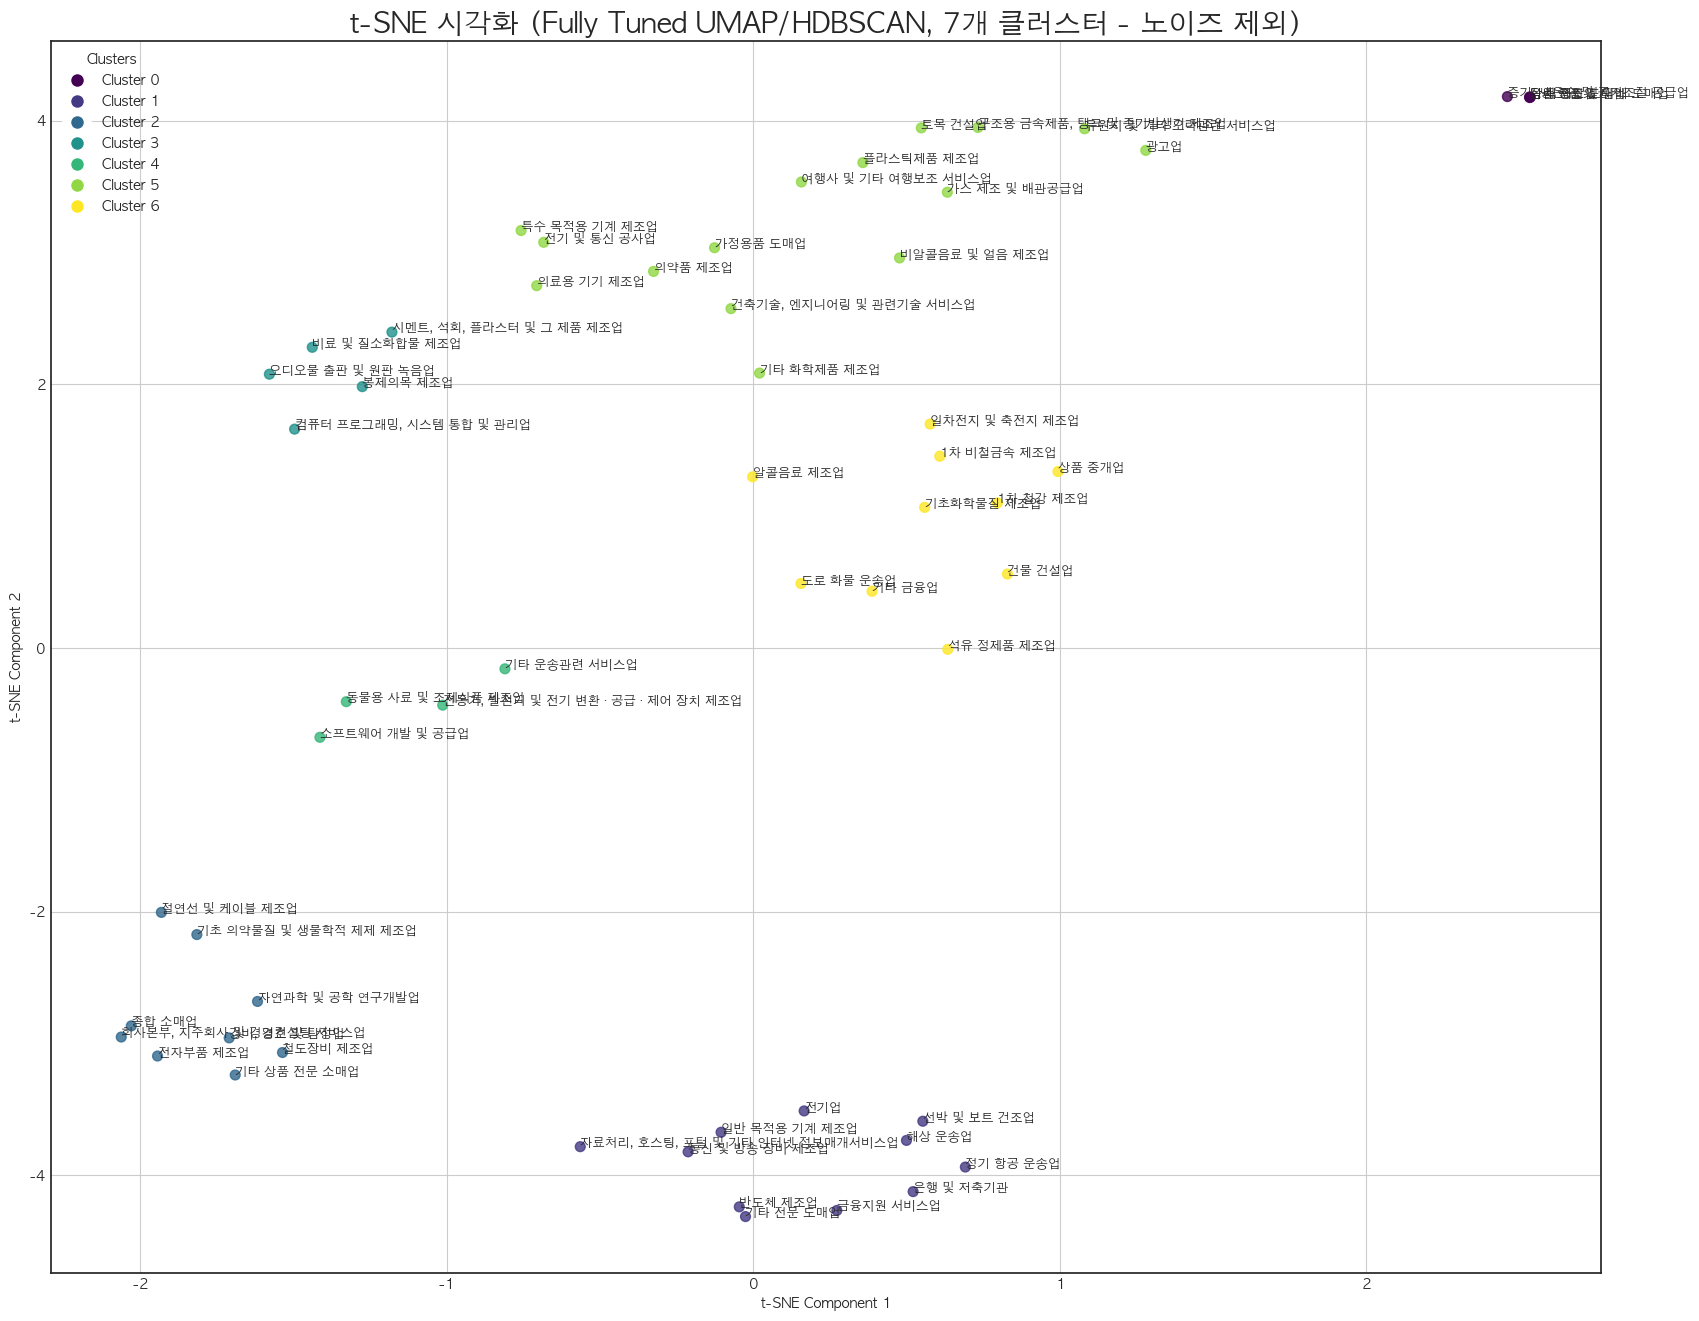


--- [7/7] 최종 클러스터 멤버 확인 (노이즈 제외) ---

--- Cluster 0 Members ---
['담배 제조업', '상품 종합 도매업', '음·식료품 및 담배 도매업', '증기, 냉온수 및 공기조절 공급업']

--- Cluster 1 Members ---
['금융지원 서비스업', '기타 전문 도매업', '반도체 제조업', '선박 및 보트 건조업', '은행 및 저축기관', '일반 목적용 기계 제조업', '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개서비스업', '전기업', '정기 항공 운송업', '통신 및 방송 장비 제조업', '해상 운송업']

--- Cluster 2 Members ---
['경비, 경호 및 탐정업', '기초 의약물질 및 생물학적 제제 제조업', '기타 상품 전문 소매업', '자연과학 및 공학 연구개발업', '전자부품 제조업', '절연선 및 케이블 제조업', '종합 소매업', '철도장비 제조업', '회사본부, 지주회사 및 경영컨설팅 서비스업']

--- Cluster 3 Members ---
['봉제의복 제조업', '비료 및 질소화합물 제조업', '시멘트, 석회, 플라스터 및 그 제품 제조업', '오디오물 출판 및 원판 녹음업', '컴퓨터 프로그래밍, 시스템 통합 및 관리업']

--- Cluster 4 Members ---
['기타 운송관련 서비스업', '동물용 사료 및 조제식품 제조업', '소프트웨어 개발 및 공급업', '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업']

--- Cluster 5 Members ---
['가스 제조 및 배관공급업', '가정용품 도매업', '건축기술, 엔지니어링 및 관련기술 서비스업', '광고업', '구조용 금속제품, 탱크 및 증기발생기 제조업', '기타 화학제품 제조업', '비알콜음료 및 얼음 제조업', '여행사 및 기타 여행보조 서비스업', '유원지 및 기타 오락관련 서비스업', '의료용 기기 제조업', '의약품 제조업', '전기 및 통신 공사업', '토목 건설업

In [22]:
# ==============================================================================
# 0. 라이브러리 임포트
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from sklearn.preprocessing import StandardScaler, RobustScaler # 스케일러
from sklearn.feature_selection import VarianceThreshold # 분산 기반 제거
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score # 실루엣 스코어 추가
import umap.umap_ as umap
import hdbscan
from itertools import product
from tqdm import tqdm
import matplotlib.cm as cm
import time # 시간 측정을 위해 추가

print("--- 라이브러리 임포트 완료 ---")

# ==============================================================================
# --- !!! 사용자 설정 변수 !!! ---
# ==============================================================================
# 1. 데이터 로드 (사용자 환경에 맞게 설정 필요)
# df = ... # 여기에 전처리된 원본 데이터프레임 로드 코드 작성

# 2. 스케일러 선택 ('StandardScaler' 또는 'RobustScaler')
SCALER_TYPE = 'StandardScaler'

# 3. 파라미터 튜닝 범위 (피처 선택 파라미터 포함)
# --- [수정됨] ---
# 학습 시간을 고려하여 각 파라미터의 탐색 범위를 축소
PARAM_GRID_FS = {
    'corr_threshold': [0.9, 0.95],      # 상관관계 임계값 후보 (2개)
    'var_threshold': [0.0, 0.01]        # 분산 임계값 후보 (2개)
}
PARAM_GRID_UMAP = {
    'n_neighbors': [5, 15],             # (4개 -> 2개)
    'min_dist': [0.0, 0.25],            # (4개 -> 2개)
    'n_components': [5, 15],            # (4개 -> 2개)
    'metric': ['euclidean', 'cosine'],  # (유지) (2개)
    'n_epochs': [200, 500],             # [신규] (2개)
    'learning_rate': [0.1, 1.0]         # [신규] (2개)
}
PARAM_GRID_HDBSCAN = {
    'min_cluster_size': [3, 5, 10],     # (4개 -> 3개)
    'min_samples': [3, 5, 10],          # [신규] (3개)
    'hdbscan_metric': ['euclidean', 'manhattan'], # [신규] (2개)
    'cluster_selection_method': ['eom', 'leaf'] # [신규] (2개)
}
# --- [수정 완료] ---

# 4. 최적 파라미터 선택 조건
MIN_CLUSTERS = 6
MAX_CLUSTERS = 8
MAX_NOISE_RATIO = 0.20 # 최대 노이즈 비율

# 5. 실루엣 스코어 계산 시 샘플링 사용 여부
USE_SILHOUETTE_SAMPLING = False # <-- 시간 상관없으므로 False
SILHOUETTE_SAMPLE_SIZE = 5000   # (사용 안 함)

# ==============================================================================
# 1. 원본 데이터 로드 확인
# ==============================================================================
print("--- [0/7] 원본 데이터 로드 확인 ---")
if 'df' not in locals():
  # (실제 실행 시) 샘플 데이터프레임 생성
  print("경고: 'df'가 없어 샘플 데이터를 생성합니다.")
  data = np.random.rand(100, 50)
  cols = [f'feature_{i}' for i in range(50)]
  industries = [f'Industry_{i % 10}' for i in range(100)]
  df = pd.DataFrame(data, columns=cols)
  df['std_idst_clsf_cd_name'] = industries
  # raise ValueError("원본 데이터프레임 'df'가 로드되지 않았습니다.")
else:
  print(f"✅ 원본 데이터 로드 완료 (Shape: {df.shape})")

# ==============================================================================
# 2. 산업 프로필 데이터셋 생성 (튜닝 루프 밖에서 한 번만 수행)
# ==============================================================================
print("\n--- [1/7] 산업 프로필 생성 ---")
industry_col = 'std_idst_clsf_cd_name'
numeric_cols_all = df.select_dtypes(include=np.number).columns.tolist()

try:
  industry_profile_df_raw = df.groupby(industry_col)[numeric_cols_all].median()
except KeyError:
  print(f"오류: '{industry_col}' 컬럼을 찾을 수 없습니다.")
  raise

if industry_profile_df_raw.empty:
  raise ValueError("산업 프로필 생성 결과가 비어있습니다.")

unique_labels = industry_profile_df_raw.index.values
print("✅ 산업 프로필 생성 완료 (초기)")
print(f"  - 초기 피처 수: {len(industry_profile_df_raw.columns)}")

# ==============================================================================
# 3. 전체 파라미터 그리드 정의 및 튜닝 실행 (피처 선택 포함)
# ==============================================================================
print("\n--- [2/7] 전체 파라미터 튜닝 시작 (피처 선택 + UMAP + HDBSCAN) ---")

start_time = time.time() # 시작 시간 기록

fs_keys, fs_values = zip(*PARAM_GRID_FS.items())
umap_keys, umap_values = zip(*PARAM_GRID_UMAP.items())
hdbscan_keys, hdbscan_values = zip(*PARAM_GRID_HDBSCAN.items())

# 모든 파라미터 조합 생성
param_combinations = list(product(*(fs_values + umap_values + hdbscan_values)))
total_combinations = len(param_combinations)
print(f"튜닝 범위:")
print(f"  - 피처 선택: {PARAM_GRID_FS}")
print(f"  - UMAP: {PARAM_GRID_UMAP}")
print(f"  - HDBSCAN: {PARAM_GRID_HDBSCAN}")
print(f"총 {total_combinations}개의 파라미터 조합으로 튜닝을 시작합니다. (시간이 매우 오래 걸릴 수 있습니다)")
print(f"실루엣 스코어 샘플링 사용: {USE_SILHOUETTE_SAMPLING}")

results = []
# tqdm으로 튜닝 진행 상황 시각화
for params in tqdm(param_combinations, desc="전체 파라미터 튜닝 진행 중"):
  # 현재 조합의 파라미터 분리
  fs_params = dict(zip(fs_keys, params[:len(fs_keys)]))
  umap_params = dict(zip(umap_keys, params[len(fs_keys):len(fs_keys)+len(umap_keys)]))
  hdbscan_params = dict(zip(hdbscan_keys, params[len(fs_keys)+len(umap_keys):]))
  silhouette_avg = -1 # 기본값

  try:
    # --- 1. 피처 선택 (현재 파라미터 사용) ---
    industry_profile_df_temp = industry_profile_df_raw.fillna(0)
    
    # 1-1. 상관관계 기반 제거
    corr_threshold_current = fs_params['corr_threshold']
    corr_matrix = industry_profile_df_temp.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    cols_to_drop_corr = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold_current)]
    industry_profile_df_corr_removed = industry_profile_df_temp.drop(columns=cols_to_drop_corr)
    
    # 1-2. 분산 기반 제거
    var_threshold_current = fs_params['var_threshold']
    selector = VarianceThreshold(threshold=var_threshold_current)
    selector.fit(industry_profile_df_corr_removed)
    cols_mask_var = selector.get_support()
    cols_to_keep_var = industry_profile_df_corr_removed.columns[cols_mask_var]
    industry_profile_df_selected = industry_profile_df_raw[cols_to_keep_var].fillna(0) # 선택 후 fillna
    
    n_selected_features = len(industry_profile_df_selected.columns)
    
    # 피처가 너무 적거나 없으면 다음 조합으로 건너뜀
    min_umap_components = min(PARAM_GRID_UMAP['n_components'])
    if n_selected_features < min_umap_components: # 최소 임베딩 차원보다 적으면 UMAP 오류
        results.append({**fs_params, **umap_params, **hdbscan_params, 
                        'n_clusters': -2, 'n_noise': -2, 'silhouette': -1, 'n_features': n_selected_features}) # -2: 피처 부족
        continue
        
    # --- 2. 데이터 스케일링 ---
    if SCALER_TYPE == 'RobustScaler':
      scaler = RobustScaler()
    else:
      scaler = StandardScaler()
    profile_scaled = scaler.fit_transform(industry_profile_df_selected)
    profile_scaled_df = pd.DataFrame(profile_scaled, index=industry_profile_df_selected.index, columns=industry_profile_df_selected.columns)
    
    # --- 3. UMAP 임베딩 ---
    # 현재 조합의 n_components가 실제 피처 수보다 크면 조정
    umap_params_current = umap_params.copy()
    if umap_params_current['n_components'] >= n_selected_features:
        umap_params_current['n_components'] = max(2, n_selected_features - 1) # 최소 2차원
        
    embedder = umap.UMAP(**umap_params_current, random_state=42, low_memory=True, verbose=False)
    embedding_vectors = embedder.fit_transform(profile_scaled_df)
    
    # --- 4. HDBSCAN 클러스터링 ---
    # --- [수정됨] ---
    # 'hdbscan_metric'을 'metric' 인자로 전달하기 위해 분리
    hdbscan_params_current = hdbscan_params.copy()
    hdbscan_metric_val = hdbscan_params_current.pop('hdbscan_metric')
    
    clusterer = hdbscan.HDBSCAN(
        **hdbscan_params_current, 
        metric=hdbscan_metric_val, # [수정] 파라미터 그리드 값 사용
        gen_min_span_tree=False
    )
    # --- [수정 완료] ---
    
    cluster_labels = clusterer.fit_predict(embedding_vectors)
    
    n_clusters_found = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_noise_points = (cluster_labels == -1).sum()

    # --- 5. 실루엣 스코어 계산 ---
    if n_clusters_found >= 2 and n_clusters_found < len(embedding_vectors):
      X_for_silhouette = embedding_vectors
      labels_for_silhouette = cluster_labels
      if USE_SILHOUETTE_SAMPLING and len(X_for_silhouette) > SILHOUETTE_SAMPLE_SIZE:
        indices = np.random.choice(len(X_for_silhouette), SILHOUETTE_SAMPLE_SIZE, replace=False)
        silhouette_avg = silhouette_score(X_for_silhouette[indices], labels_for_silhouette[indices])
      else:
        silhouette_avg = silhouette_score(X_for_silhouette, labels_for_silhouette)

    # --- 6. 결과 저장 ---
    current_result = {**fs_params, **umap_params, **hdbscan_params,
                      'n_clusters': n_clusters_found,
                      'n_noise': n_noise_points,
                      'silhouette': round(silhouette_avg, 4),
                      'n_features': n_selected_features} # 선택된 피처 수 기록
    results.append(current_result)

  except Exception as e:
    # 오류 발생 시 기록
    print(f"\n오류 발생: FS={fs_params}, UMAP={umap_params}, HDBSCAN={hdbscan_params}, Error: {e}")
    results.append({**fs_params, **umap_params, **hdbscan_params, 'n_clusters': -1, 'n_noise': -1, 'silhouette': -1, 'n_features': -1})

results_df = pd.DataFrame(results)
end_time = time.time() # 종료 시간 기록
print(f"✅ 전체 파라미터 튜닝 완료 (소요 시간: {(end_time - start_time)/60:.2f} 분)")

# ==============================================================================
# 4. 튜닝 결과 확인 및 최적 파라미터 선택 (실루엣 스코어 기준)
# ==============================================================================
print("\n--- [3/7] 튜닝 결과 요약 및 최적 파라미터 선택 ---")
# 결과 정렬: 실루엣 스코어 내림차순
results_df_sorted = results_df.sort_values(by=['silhouette'], ascending=False)
print("튜닝 결과 (상위 5개 - 실루엣 스코어 기준):")
print(results_df_sorted.head(5))

# 최적 파라미터 선택 조건 적용
candidate_params = results_df_sorted[
    (results_df_sorted['n_clusters'] >= MIN_CLUSTERS) &
    (results_df_sorted['n_clusters'] <= MAX_CLUSTERS) &
    (results_df_sorted['n_noise'] < len(industry_profile_df_raw) * MAX_NOISE_RATIO) & # 노이즈 비율은 원본 산업 수 기준
    (results_df_sorted['silhouette'] > -1) # 유효한 실루엣 스코어만
].copy()

print(f"\n--- 추천 후보 파라미터 조합 ({MIN_CLUSTERS}~{MAX_CLUSTERS} 클러스터, {MAX_NOISE_RATIO*100:.0f}% 미만 노이즈, 실루엣 스코어 높은 순) ---")
print(candidate_params.head(5))

if not candidate_params.empty:
  BEST_PARAMS_INDEX = candidate_params.index[0]
  BEST_PARAMS_FULL = results_df.loc[BEST_PARAMS_INDEX].to_dict() # 모든 파라미터 포함
  print(f"\n자동 선택된 최적 파라미터 (인덱스: {BEST_PARAMS_INDEX}, 실루엣: {BEST_PARAMS_FULL['silhouette']:.4f}):")
  # 결과 확인용 파라미터 제외
  BEST_PARAMS = {k: v for k, v in BEST_PARAMS_FULL.items() if k not in ['n_clusters', 'n_noise', 'silhouette', 'n_features']}
  
  # --- [수정됨] ---
  # 타입 변환 (새로운 파라미터 추가)
  BEST_PARAMS['corr_threshold'] = float(BEST_PARAMS['corr_threshold'])
  BEST_PARAMS['var_threshold'] = float(BEST_PARAMS['var_threshold'])
  
  BEST_PARAMS['n_neighbors'] = int(BEST_PARAMS['n_neighbors'])
  BEST_PARAMS['n_components'] = int(BEST_PARAMS['n_components'])
  BEST_PARAMS['n_epochs'] = int(BEST_PARAMS['n_epochs']) # [신규]
  BEST_PARAMS['learning_rate'] = float(BEST_PARAMS['learning_rate']) # [신규]
  
  BEST_PARAMS['min_cluster_size'] = int(BEST_PARAMS['min_cluster_size'])
  BEST_PARAMS['min_samples'] = int(BEST_PARAMS['min_samples']) # [신규]
  # 'metric', 'hdbscan_metric', 'cluster_selection_method'는 문자열이므로 변환 불필요
  # --- [수정 완료] ---
  
  print(BEST_PARAMS)
else:
  print("\n추천 후보를 찾지 못했습니다. 결과 테이블 전체 또는 조건을 보고 BEST_PARAMS를 수동으로 설정하세요.")
  raise SystemExit("최적 파라미터를 찾지 못해 코드를 중지합니다.")

# ==============================================================================
# 5. 최적 파라미터로 최종 피처 선택, 스케일링, 클러스터링 실행
# ==============================================================================
print("\n--- [4/7] 최적 파라미터로 최종 피처 선택 및 스케일링 ---")

# 최적 피처 선택 파라미터 적용
best_fs_params = {k: v for k, v in BEST_PARAMS.items() if k in PARAM_GRID_FS}

industry_profile_df_temp = industry_profile_df_raw.fillna(0)
corr_matrix = industry_profile_df_temp.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
cols_to_drop_corr = [column for column in upper_tri.columns if any(upper_tri[column] > best_fs_params['corr_threshold'])]
industry_profile_df_corr_removed = industry_profile_df_temp.drop(columns=cols_to_drop_corr)

selector = VarianceThreshold(threshold=best_fs_params['var_threshold'])
try:
  selector.fit(industry_profile_df_corr_removed)
  cols_mask_var = selector.get_support()
  cols_to_keep_var = industry_profile_df_corr_removed.columns[cols_mask_var]
  industry_profile_df_final_selected = industry_profile_df_raw[cols_to_keep_var].fillna(0)
except ValueError as e:
   print(f"최종 피처 선택 중 오류: {e}")
   industry_profile_df_final_selected = industry_profile_df_corr_removed # 이전 결과 사용

if industry_profile_df_final_selected.empty or industry_profile_df_final_selected.shape[1] == 0:
  raise ValueError("최종 피처 선택 후 남은 피처가 없습니다.")

print(f"✅ 최종 선택된 피처 수: {len(industry_profile_df_final_selected.columns)}")

# 최종 스케일링
if SCALER_TYPE == 'RobustScaler': scaler = RobustScaler()
else: scaler = StandardScaler()
profile_final_scaled = scaler.fit_transform(industry_profile_df_final_selected)
profile_final_scaled_df = pd.DataFrame(profile_final_scaled, index=industry_profile_df_final_selected.index, columns=industry_profile_df_final_selected.columns)
print("✅ 최종 스케일링 완료")


print("\n--- [5/7] 최적 파라미터로 최종 클러스터링 실행 ---")
best_umap_params = {k: v for k, v in BEST_PARAMS.items() if k in PARAM_GRID_UMAP}
best_hdbscan_params = {k: v for k, v in BEST_PARAMS.items() if k in PARAM_GRID_HDBSCAN}

# n_components 조정 (피처 수보다 작거나 같게)
if best_umap_params['n_components'] >= profile_final_scaled_df.shape[1]:
    best_umap_params['n_components'] = max(2, profile_final_scaled_df.shape[1] - 1)
    print(f"경고: UMAP n_components를 {best_umap_params['n_components']}로 조정했습니다.")

final_embedder = umap.UMAP(**best_umap_params, random_state=42, verbose=False)
final_embedding_vectors = final_embedder.fit_transform(profile_final_scaled_df) # 최종 스케일링&선택된 데이터 사용
final_embedding_df = pd.DataFrame(final_embedding_vectors, index=industry_profile_df_final_selected.index)

# --- [수정됨] ---
# 'hdbscan_metric'을 'metric' 인자로 전달하기 위해 분리
best_hdbscan_metric_val = best_hdbscan_params.pop('hdbscan_metric')

final_clusterer = hdbscan.HDBSCAN(
    **best_hdbscan_params, 
    metric=best_hdbscan_metric_val, # [수정] 최적 파라미터 사용
    gen_min_span_tree=False
)
# --- [수정 완료] ---

final_cluster_labels = final_clusterer.fit_predict(final_embedding_df)

industry_profile_df_final_selected['Final_Cluster'] = final_cluster_labels # 최종 선택된 DF에 결과 추가
final_n_clusters = len(set(final_cluster_labels)) - (1 if -1 in final_cluster_labels else 0)
final_n_noise = (final_cluster_labels == -1).sum()
print(f"✅ 최종 클러스터링 완료: {final_n_clusters}개 클러스터, {final_n_noise}개 노이즈")

# ==============================================================================
# 6. t-SNE 시각화 (최종 결과 반영, 노이즈 제외)
# ==============================================================================
print("\n--- [6/7] t-SNE 변환 및 시각화 생성 (노이즈 제외) ---")
os_name = platform.system()
if os_name == 'Windows': font_name = 'Malgun Gothic'
elif os_name == 'Darwin': font_name = 'AppleGothic'
else: font_name = 'NanumGothic'
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

tsne_perplexity = min(30, len(final_embedding_df) - 1) # Perplexity는 샘플 수보다 작아야 함
if tsne_perplexity <= 0:
    print("경고: t-SNE를 실행하기에 데이터 포인트가 너무 적습니다.")
else:
    tsne = TSNE(n_components=2, random_state=42, perplexity=tsne_perplexity)
    tsne_results = tsne.fit_transform(final_embedding_df) # 최종 UMAP 임베딩 사용

    non_noise_mask = final_cluster_labels != -1
    tsne_results_filtered = tsne_results[non_noise_mask]
    cluster_labels_filtered = final_cluster_labels[non_noise_mask]
    labels_filtered = industry_profile_df_final_selected.index[non_noise_mask].values

    if len(tsne_results_filtered) == 0:
      print("경고: 모든 데이터가 노이즈로 분류되어 시각화할 수 없습니다.")
    else:
      print(f"✅ t-SNE 변환 완료. 노이즈 제외 {len(tsne_results_filtered)}개 포인트 시각화.")
      plt.figure(figsize=(20, 16))
      unique_valid_cluster_ids = sorted(list(set(cluster_labels_filtered)))
      n_valid_colors = len(unique_valid_cluster_ids)
      try:
        colors = plt.cm.get_cmap('viridis', n_valid_colors)
      except ValueError:
        colors = plt.cm.get_cmap('viridis', max(2, n_valid_colors))
      color_map = {cluster_id: colors(i) for i, cluster_id in enumerate(unique_valid_cluster_ids)}
      plot_colors = [color_map[label] for label in cluster_labels_filtered]
      scatter = plt.scatter(tsne_results_filtered[:, 0], tsne_results_filtered[:, 1], c=plot_colors, alpha=0.8, s=50)
      for i, label in enumerate(labels_filtered):
        plt.annotate(label, (tsne_results_filtered[i, 0], tsne_results_filtered[i, 1]), fontsize=9)
      legend_labels = {cluster_id: f'Cluster {cluster_id}' for cluster_id in unique_valid_cluster_ids}
      handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[cluster_id],
                            markerfacecolor=color_map[cluster_id], markersize=10)
                 for cluster_id in unique_valid_cluster_ids]
      plt.legend(handles=handles, title="Clusters")
      plt.title(f't-SNE 시각화 (Fully Tuned UMAP/HDBSCAN, {final_n_clusters}개 클러스터 - 노이즈 제외)', fontsize=20)
      plt.xlabel("t-SNE Component 1")
      plt.ylabel("t-SNE Component 2")
      plt.grid(True)
      plt.show()

# ==============================================================================
# 7. 클러스터 멤버 출력 (최종 결과, 노이즈 제외)
# ==============================================================================
print("\n--- [7/7] 최종 클러스터 멤버 확인 (노이즈 제외) ---")
final_valid_ids = sorted([cid for cid in set(final_cluster_labels) if cid >= 0])
if not final_valid_ids:
  print("유효한 클러스터가 없습니다.")
else:
  for cluster_id in final_valid_ids:
    print(f"\n--- Cluster {cluster_id} Members ---")
    # 최종 클러스터 라벨이 저장된 DataFrame에서 멤버 확인
    members = industry_profile_df_final_selected[industry_profile_df_final_selected['Final_Cluster'] == cluster_id].index.tolist()
    print(members)

noise_members = industry_profile_df_final_selected[industry_profile_df_final_selected['Final_Cluster'] == -1].index.tolist()
if noise_members:
  print(f"\n--- Cluster -1 (Noise) Members ---")
  print(noise_members)

print("\n--- 전체 워크플로우 종료 ---")

--- 모든 랜덤 시드를 3020로 고정 ---
--- 라이브러리 임포트 완료 ---
--- [1] ^KS200 데이터 다운로드 ---


[*********************100%***********************]  1 of 1 completed



--- [2] 베이즈 최적화(Bayesian Optimization) 시작 ---
 (5개 파라미터 튜닝: 총 40회(10+30)의 '비싼' 작업을 수행합니다...)
|   iter    |  target   | batch_... | featur... | hidden... | latent... | n_regimes |
-------------------------------------------------------------------------------------
| 1         | 0.4745    | 26.54     | 79.36     | 16.24     | 2.873     | 3.589     |
| 2         | 0.3304    | 28.22     | 49.55     | 15.1      | 3.375     | 2.489     |
| 3         | 0.4036    | 30.56     | 46.13     | 16.2      | 2.777     | 2.813     |
| 4         | 0.4452    | 21.58     | 119.1     | 13.17     | 4.914     | 2.468     |
| 5         | 0.5175    | 34.24     | 99.83     | 9.313     | 2.398     | 3.303     |
| 6         | 0.2756    | 23.0      | 116.9     | 15.75     | 4.069     | 4.938     |
| 7         | 0.1947    | 43.25     | 108.3     | 17.12     | 5.1       | 2.458     |
| 8         | 0.3142    | 24.79     | 40.63     | 19.3      | 3.511     | 2.169     |
| 9         | 0.3009    | 52.51     | 82.25   

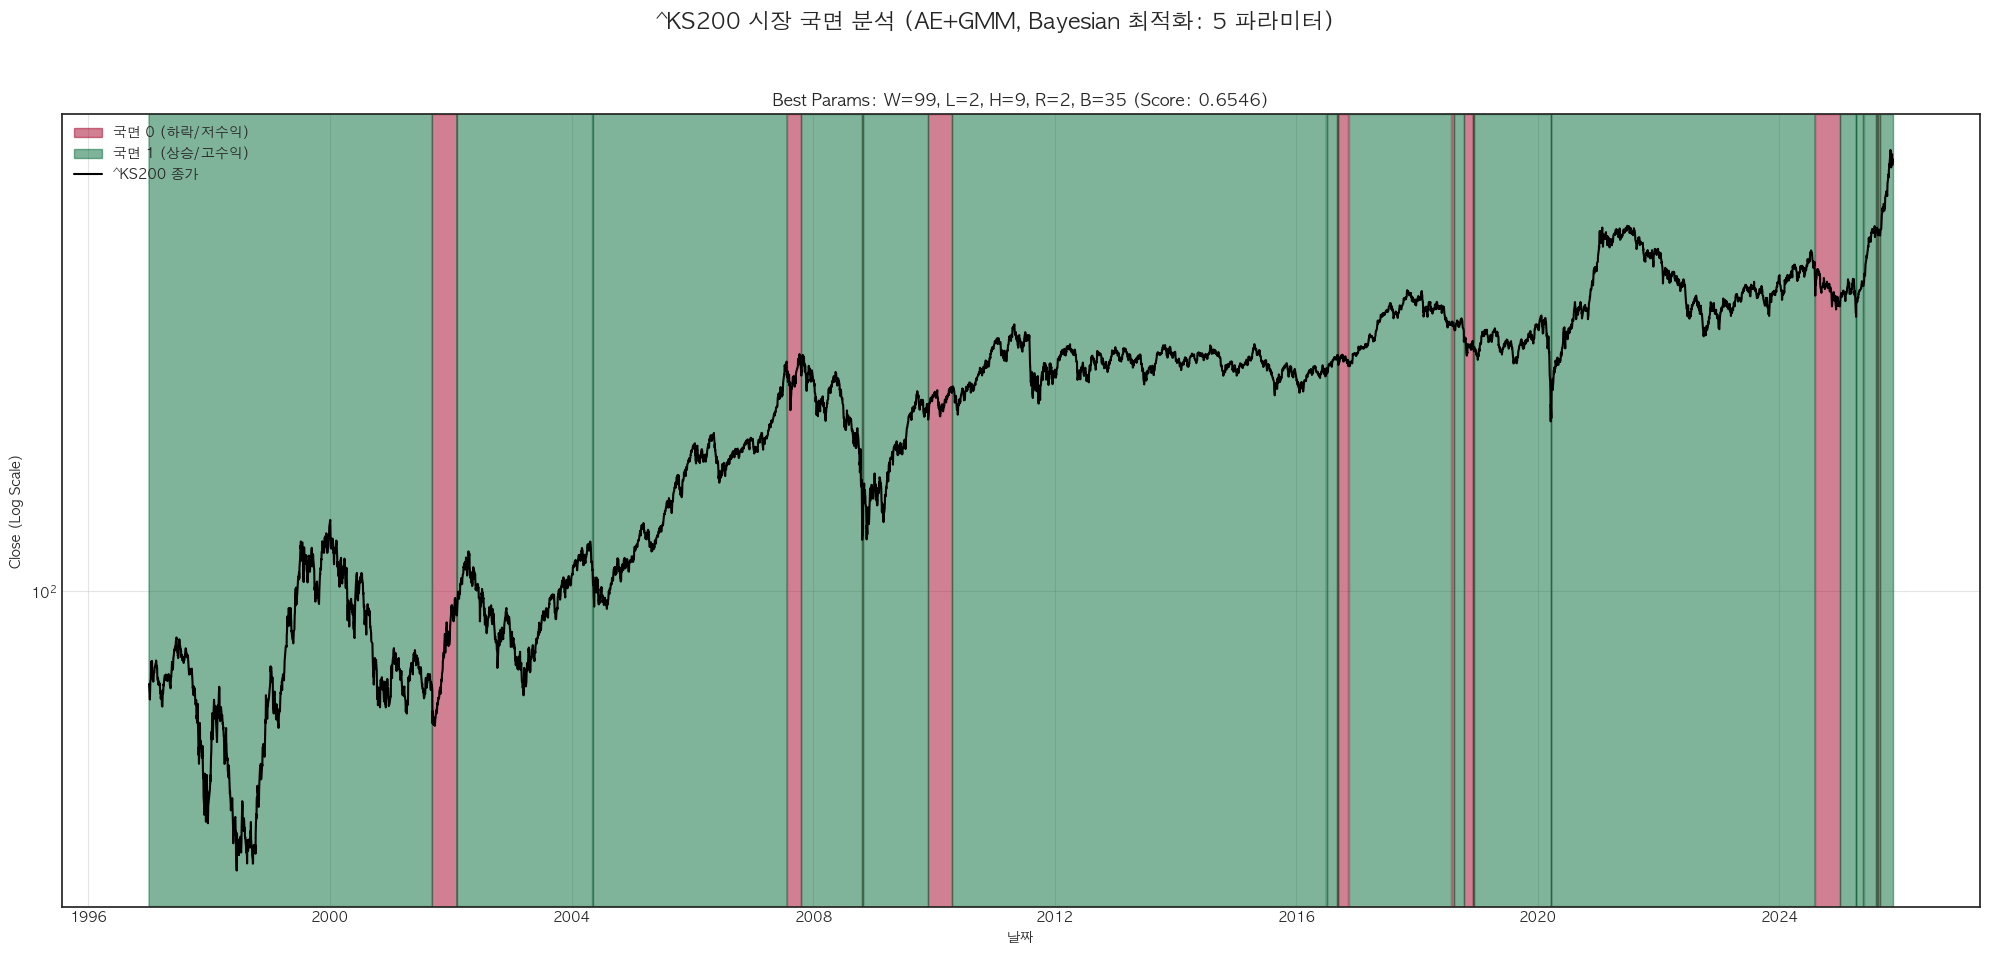


--- [5] 시각화 완료 ---

--- 전체 워크플로우 종료 ---


In [23]:
# ==============================================================================
# 0. 라이브러리 임포트
# ==============================================================================
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import platform
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture # GMM
from sklearn.metrics import silhouette_score
import random

# --- 딥러닝(Autoencoder) 라이브러리 ---
try:
    import tensorflow as tf
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Dense
    from tensorflow.keras.callbacks import EarlyStopping
except ImportError:
    print("--- 'tensorflow'가 설치되지 않았습니다. 'pip install tensorflow'로 설치해주세요. ---")
    raise

# --- ★ 베이즈 최적화 라이브러리 ★ ---
try:
    from bayes_opt import BayesianOptimization
except ImportError:
    print("--- 'bayesian-optimization'이 설치되지 않았습니다. 'pip install bayesian-optimization'로 설치해주세요. ---")
    raise

# 경고 무시
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
tf.get_logger().setLevel('ERROR')

# --- ★★★ 재현성을 위한 랜덤 시드 고정 ★★★ ---
SEED = 3020
print(f"--- 모든 랜덤 시드를 {SEED}로 고정 ---")
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1' 
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# --- ★★★ 시드 고정 완료 ★★★ ---

print("--- 라이브러리 임포트 완료 ---")

# ==============================================================================
# --- !!! 사용자 설정 변수 !!! ---
# ==============================================================================
TICKER = "^KS200"
START_DATE = "1997-01-01"
END_DATE = pd.Timestamp.today().strftime('%Y-%m-%d')

# --- [수정됨] ---
# N_REGIMES, BATCH_SIZE가 튜닝 대상이므로 전역 변수에서 제거.
# EPOCHS는 EarlyStopping이 제어하므로 유지.
EPOCHS = 100 
# ==============================================================================

# ==============================================================================
# 1. 데이터 다운로드 (최초 1회 실행)
# ==============================================================================
print(f"--- [1] {TICKER} 데이터 다운로드 ---")
try:
    data_raw = yf.download(TICKER, start=START_DATE, end=END_DATE)
    if data_raw.empty: raise ValueError(f"{TICKER} 데이터 로드 실패")
except Exception as e:
    raise ConnectionError(f"데이터 다운로드 중 오류: {e}")

# MultiIndex 및 'Close' 컬럼 처리
if isinstance(data_raw.columns, pd.MultiIndex):
    data_raw.columns = data_raw.columns.get_level_values(0)
if 'Adj Close' in data_raw.columns:
    close_col = 'Adj Close'
elif 'Close' in data_raw.columns:
    close_col = 'Close'
else:
    raise KeyError("Close 또는 Adj Close 컬럼을 찾을 수 없습니다.")

# ==============================================================================
# 2. 헬퍼 함수 정의 (베이즈 최적화를 위해 수정)
# ==============================================================================

# (데이터 로딩 함수는 캐싱을 위해 전역으로 분리)
@np.vectorize
def get_features_and_scale(window_size):
    """ (이 함수는 현재 캐싱 로직에서는 직접 사용되지 않음) """
    prices = data_raw[[close_col]].copy()
    prices.rename(columns={close_col: 'price'}, inplace=True)
    prices['log_return'] = np.log(prices['price'] / prices['price'].shift(1))
    prices = prices.dropna() 

    features_df = pd.DataFrame(index=prices.index)
    features_df['return'] = prices['log_return'].rolling(window=window_size).mean() * 252 
    features_df['volatility'] = prices['log_return'].rolling(window=window_size).std() * np.sqrt(252)
    features_df['skewness'] = prices['log_return'].rolling(window=window_size).skew()
    features_df['kurtosis'] = prices['log_return'].rolling(window=window_size).kurt()
    
    features_df = features_df.dropna()
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features_df.values)
    return features_df, scaled_data

# --- [수정됨] ---
def build_and_train_autoencoder(scaled_data, n_features, latent_dim, hidden_dim, batch_size):
    """ 2. 오토인코더 빌드 및 학습 (hidden_dim, batch_size 파라미터 추가) """
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    
    N_FEATURES = n_features
    LATENT_DIM = latent_dim
    HIDDEN_DIM = hidden_dim # [신규]
    BATCH_SIZE_CURRENT = batch_size # [신규]

    input_layer = Input(shape=(N_FEATURES,))
    # --- [수정됨] '8'을 hidden_dim으로 변경 ---
    encoded = Dense(HIDDEN_DIM, activation='relu')(input_layer) 
    latent_vector = Dense(LATENT_DIM)(encoded) 
    decoded = Dense(HIDDEN_DIM, activation='relu')(latent_vector) 
    # --- [수정 완료] ---
    output_layer = Dense(N_FEATURES)(decoded) 
    
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer='adam', loss='mse')
    encoder = Model(inputs=input_layer, outputs=latent_vector)

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    autoencoder.fit(
        scaled_data, scaled_data,
        epochs=EPOCHS, 
        batch_size=BATCH_SIZE_CURRENT, # [수정] BATCH_SIZE -> batch_size
        validation_split=0.1, 
        callbacks=[early_stopping], 
        verbose=0
    )
    
    latent_vectors = encoder.predict(scaled_data, verbose=0)
    return latent_vectors

def get_gmm_score(latent_vectors, n_regimes):
    """ 3. GMM 군집화 및 실루엣 점수 계산 (n_regimes를 인자로 받음) """
    gmm = GaussianMixture(n_components=n_regimes, random_state=SEED)
    labels = gmm.fit_predict(latent_vectors)
    
    if len(np.unique(labels)) < 2: return 0 # 클러스터가 1개 이하면 0점
    score = silhouette_score(latent_vectors, labels)
    return score

# ==============================================================================
# 3. 베이즈 최적화 (★ 핵심 로직 ★)
# ==============================================================================
print("\n--- [2] 베이즈 최적화(Bayesian Optimization) 시작 ---")

# (데이터 캐싱: window_size가 바뀔 때만 피처를 재계산하기 위한 딕셔너리)
features_cache = {}

# --- [수정됨] ---
def black_box_function(feature_window, latent_dim, hidden_dim, n_regimes, batch_size):
    """
    베이즈 최적화가 호출할 '비싼' 목적 함수
    (5개 파라미터) -> silhouette_score
    """
    
    # ★ 중요: 베이즈 최적화는 float을 전달 -> 정수로 변환 ★
    window = int(feature_window)
    latent = int(latent_dim)
    hidden = int(hidden_dim)   # [신규]
    regimes = int(n_regimes) # [신규]
    batch = int(batch_size)    # [신규]
    
    try:
        # --- 1. 피처 생성 (캐시 확인) ---
        if window in features_cache:
            features_df, scaled_data = features_cache[window]
        else:
            prices = data_raw[[close_col]].copy()
            prices.rename(columns={close_col: 'price'}, inplace=True)
            prices['log_return'] = np.log(prices['price'] / prices['price'].shift(1))
            prices = prices.dropna() 

            features_df = pd.DataFrame(index=prices.index)
            features_df['return'] = prices['log_return'].rolling(window=window).mean() * 252 
            features_df['volatility'] = prices['log_return'].rolling(window=window).std() * np.sqrt(252)
            features_df['skewness'] = prices['log_return'].rolling(window=window).skew()
            features_df['kurtosis'] = prices['log_return'].rolling(window=window).kurt()
            
            features_df = features_df.dropna()
            
            scaler = StandardScaler()
            scaled_data = scaler.fit_transform(features_df.values)
            features_cache[window] = (features_df, scaled_data) # 캐시에 저장

        if len(scaled_data) == 0:
            return 0 # 데이터 없음
            
        # --- 2. AE 학습 (hidden, batch 전달) ---
        latent_vectors = build_and_train_autoencoder(
            scaled_data, 
            scaled_data.shape[1], 
            latent, 
            hidden,  # [신규]
            batch    # [신규]
        )
        
        # --- 3. GMM 점수 (regimes 전달) ---
        score = get_gmm_score(latent_vectors, regimes) # [신규]
        
        return score
    except Exception as e:
        print(f"  오류 발생 (W={window}, L={latent}, H={hidden}, R={regimes}, B={batch}): {e}")
        return 0 # 오류 발생 시 0점 반환

# --- ★ 튜닝할 파라미터 범위(Bounds) ---
# --- [수정됨] 3개 파라미터 추가 ---
pbounds = {
    'feature_window': (40, 120),      # 40일 ~ 120일 (약 2~6개월)
    'latent_dim': (2, 5.99),          # 2~5차원 (AE 잠재공간)
    'hidden_dim': (4, 20.99),         # 4~20 노드 (AE 은닉층) [신규]
    'n_regimes': (2, 5.99),           # 2~5개 국면 (GMM 클러스터 수) [신규]
    'batch_size': (16, 64.99)         # 16~64 (AE 배치 크기) [신규]
}
# --- [수정 완료] ---

# 1. 옵티마이저 객체 생성
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=SEED, # 옵티마이저 자체의 시드
    verbose=2 # 0: 끄기, 1: 요약, 2: 상세
)

# 2. 최적화 실행
# --- [수정됨] 5개 파라미터 탐색을 위해 반복 횟수 증가 ---
# init_points: 무작위로 10개 지점 탐색
# n_iter: '지능적으로' 30개 지점 탐색 (총 40회 시도)
print(" (5개 파라미터 튜닝: 총 40회(10+30)의 '비싼' 작업을 수행합니다...)")
optimizer.maximize(
    init_points=10,
    n_iter=30
)
# --- [수정 완료] ---

print("\n--- [3] 베이즈 최적화 완료 ---")

# 3. 최적의 결과 추출
best_params_float = optimizer.max['params']
# --- [수정됨] 모든 파라미터 정수 변환 ---
best_params = {
    'feature_window': int(best_params_float['feature_window']),
    'latent_dim': int(best_params_float['latent_dim']),
    'hidden_dim': int(best_params_float['hidden_dim']), # [신규]
    'n_regimes': int(best_params_float['n_regimes']),   # [신규]
    'batch_size': int(best_params_float['batch_size'])  # [신규]
}
# --- [수정 완료] ---
best_score = optimizer.max['target']

print("\n--- ★ 최적의 하이퍼파라미터 ★ ---")
print(f"  Parameters: {best_params}")
print(f"  Best Silhouette Score: {best_score:.4f}")


# ==============================================================================
# 4. 최적의 파라미터로 최종 모델 학습 및 시각화
# ==============================================================================
print("\n--- [4] 최적의 파라미터로 최종 모델 재학습 및 시각화 ---")

# 1. 최적의 피처 생성
# --- [수정됨] 모든 최적 파라미터 로드 ---
FINAL_WINDOW = best_params['feature_window']
FINAL_LATENT = best_params['latent_dim']
FINAL_HIDDEN = best_params['hidden_dim']
FINAL_REGIMES = best_params['n_regimes']
FINAL_BATCH = best_params['batch_size']
# --- [수정 완료] ---

# (캐시에서 다시 로드)
if FINAL_WINDOW in features_cache:
    features_df, scaled_data = features_cache[FINAL_WINDOW]
else:
    # (혹시 캐시가 비었을 경우를 대비해 다시 생성)
    prices = data_raw[[close_col]].copy()
    prices.rename(columns={close_col: 'price'}, inplace=True)
    prices['log_return'] = np.log(prices['price'] / prices['price'].shift(1))
    prices = prices.dropna() 
    features_df = pd.DataFrame(index=prices.index)
    features_df['return'] = prices['log_return'].rolling(window=FINAL_WINDOW).mean() * 252 
    features_df['volatility'] = prices['log_return'].rolling(window=FINAL_WINDOW).std() * np.sqrt(252)
    features_df['skewness'] = prices['log_return'].rolling(window=FINAL_WINDOW).skew()
    features_df['kurtosis'] = prices['log_return'].rolling(window=FINAL_WINDOW).kurt()
    features_df = features_df.dropna()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features_df.values)

# 2. 최적의 AE 학습
latent_vectors = build_and_train_autoencoder(
    scaled_data, 
    scaled_data.shape[1], 
    FINAL_LATENT, 
    FINAL_HIDDEN, 
    FINAL_BATCH
)

# 3. 최적의 GMM 군집화
gmm = GaussianMixture(n_components=FINAL_REGIMES, random_state=SEED)
regime_labels_raw = gmm.fit_predict(latent_vectors)

print("✅ 최종 모델 GMM 군집화 완료")

# 4. 국면 해석 및 매핑
results_df = features_df.copy()
results_df['regime_raw'] = regime_labels_raw
regime_stats = results_df.groupby('regime_raw')[['return', 'volatility', 'skewness', 'kurtosis']].mean()

print("\n--- AI가 분류한 최종 국면의 특징 (Raw) ---")
print(regime_stats)

# [중요] 수익률(return) 기준으로 국면을 정렬 (0=가장 낮음, N=가장 높음)
sorted_indices = regime_stats['return'].sort_values().index
regime_map = {idx: i for i, idx in enumerate(sorted_indices)}
results_df['regime'] = results_df['regime_raw'].map(regime_map)

print(f"매핑 완료 (수익률 낮은 순): {regime_map}")

# ==============================================================================
# 5. 최종 시각화
# ==============================================================================
print("\n--- [5] 최종 시각화 생성 ---")

os_name = platform.system()
if os_name == 'Windows': font_name = 'Malgun Gothic'
elif os_name == 'Darwin': font_name = 'AppleGothic'
else: font_name = 'NanumGothic'
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# --- 최종 국면 분류 차트 (1-Panel) ---
fig, ax = plt.subplots(figsize=(20, 10))
title = f'{TICKER} 시장 국면 분석 (AE+GMM, Bayesian 최적화: 5 파라미터)'
fig.suptitle(title, fontsize=16)

plot_prices = data_raw[close_col] 
dates = plot_prices.index

# 국면 데이터를 전체 가격 데이터프레임에 병합
plot_prices_df = plot_prices.to_frame()
plot_prices_df['regime'] = results_df['regime']
plot_prices_df['regime'] = plot_prices_df['regime'].fillna(method='bfill') 
plot_prices_df['regime'] = plot_prices_df['regime'].fillna(method='ffill')

# --- [수정됨] 국면 개수(N_REGIMES)가 동적이 됨 ---
# 국면 이름과 색상을 동적으로 생성
# (수익률 순으로 0=하락, 1=횡보, 2=상승 등으로 매핑됨)
colors = plt.cm.get_cmap('RdYlGn', FINAL_REGIMES) # (빨강-노랑-초록 계열)
regime_names = {}
regime_colors = {}
for i in range(FINAL_REGIMES):
    # (간단한 이름 부여)
    if i == 0:
        name = f'국면 {i} (하락/저수익)'
    elif i == FINAL_REGIMES - 1:
        name = f'국면 {i} (상승/고수익)'
    else:
        name = f'국면 {i} (횡보/중수익)'
    regime_names[i] = name
    regime_colors[i] = colors(i / (FINAL_REGIMES - 1) if FINAL_REGIMES > 1 else 0.5)
# --- [수정 완료] ---


# 가격 그래프
price_line, = ax.plot(plot_prices, color='black', linewidth=1.5, label=f'{TICKER} 종가')

# 국면별 배경 채우기
legend_patches = []
for i in range(FINAL_REGIMES):
  # (혹시 모를 오류 방지: 해당 국면이 존재할 때만 그리기)
  if i in regime_names and i in plot_prices_df['regime'].values:
    state_mask = (plot_prices_df['regime'] == i)
    ax.fill_between(dates, 0, 1, where=state_mask, color=regime_colors[i], 
                    alpha=0.5, transform=ax.get_xaxis_transform())
    legend_patches.append(mpatches.Patch(color=regime_colors[i], 
                                        alpha=0.5, label=regime_names[i]))

legend_patches.append(price_line)

# 제목에 모든 최적 파라미터 표시
best_params_str = f"W={FINAL_WINDOW}, L={FINAL_LATENT}, H={FINAL_HIDDEN}, R={FINAL_REGIMES}, B={FINAL_BATCH}"
ax.set_title(f"Best Params: {best_params_str} (Score: {best_score:.4f})", fontsize=12)
ax.legend(handles=legend_patches, loc='upper left')
ax.set_ylabel(f'{close_col} (Log Scale)')
ax.set_xlabel('날짜')
ax.grid(True, alpha=0.5)

# Y축 로그 스케일
ax.set_yscale('log') 

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- [5] 시각화 완료 ---")
print("\n--- 전체 워크플로우 종료 ---")

Market Regime Detection Using Autoencoders and Gaussian Mixture Models (2020)

KOSPI 200 데이터 다운로드 중...


[*********************100%***********************]  1 of 1 completed


[알림] MultiIndex 감지. 컬럼을 단순화합니다.
200DMA 피처 생성 중...
결측치(NaN) 제거 중...
데이터 처리 완료.

--- [3] 국면 정의 및 데이터 분리 중 ---
상승장(Bull Market) 데이터 일수: 4024
 (상승장 최근 5일 샘플):
Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2025-11-12  586.729980  586.729980  588.070007  577.510010  579.169983   
2025-11-13  588.650024  588.650024  591.979980  582.820007  583.380005   
2025-11-14  563.429993  563.429993  576.369995  563.419983  571.979980   
2025-11-17  576.650024  576.650024  576.849976  569.900024  574.429993   
2025-11-18  556.450012  556.450012    0.000000    0.000000    0.000000   

Price          Volume     SMA_200  regime  
Date                                       
2025-11-12  139800000  404.084501       1  
2025-11-13  161800000  405.372901       1  
2025-11-14  141900000  406.511401       1  
2025-11-17  107300000  407.719201       1  
2025-11-18          0  408.831751       1  

하락장(Bear Market) 

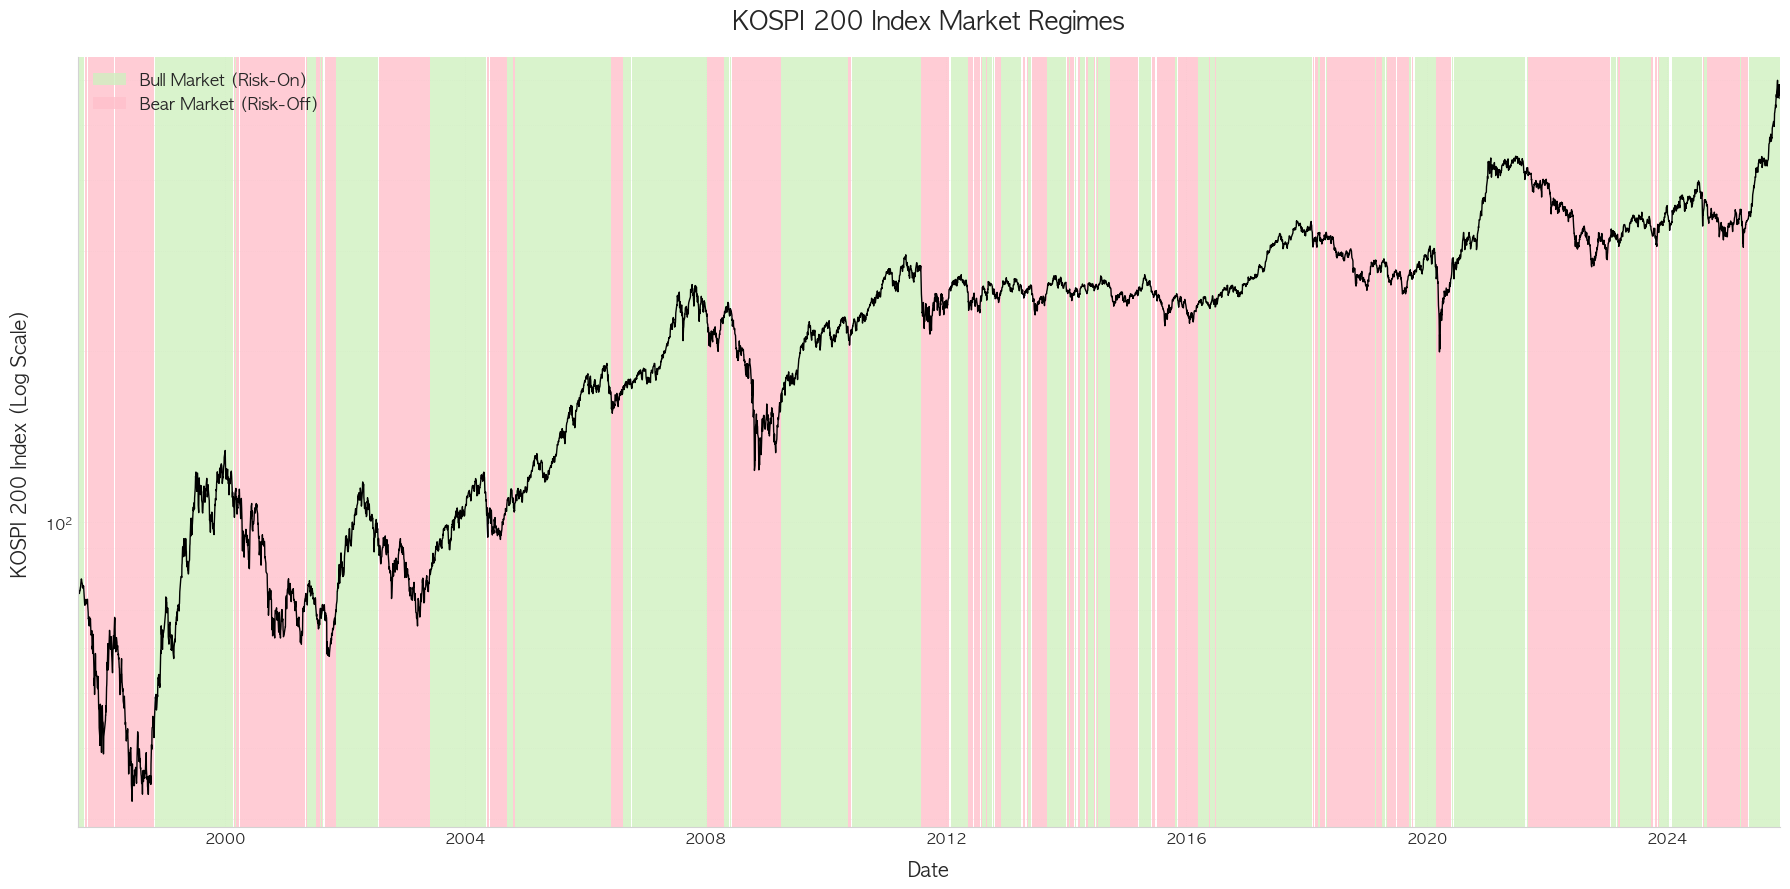

논문용 그래프 생성 완료.

함수가 반환한 [상승장] 데이터 (bull_data):

함수가 반환한 [하락장] 데이터 (bear_data):


In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # ★ np.where를 사용하기 위해 추가
from matplotlib.patches import Patch
import platform
import traceback

def get_and_plot_kospi_regimes(): # ★ 함수 이름 변경 (데이터 'Get' 기능 추가)
    """
    [논문용 최종 디자인]
    1. 200DMA 기준으로 상승/하락장을 정의하고, 해당 데이터를 분리하여 반환합니다.
    2. 논문 가독성을 위한 전문적인 색상 팔레트와 디자인을 적용하여 차트를 플롯합니다.
    3. 제목 및 축 레이블을 영문으로 변경합니다.
    4. 그리드 스타일, 범례 위치 등을 논문 목적에 맞게 조정합니다.
    
    Returns:
        (pd.DataFrame, pd.DataFrame): (bull_market_data, bear_market_data)
        두 개의 데이터프레임을 튜플로 반환합니다.
        오류 발생 시 (None, None)을 반환합니다.
    """
    
    # --- 1. 스타일 및 폰트 설정 ---
    plt.style.use('seaborn-v0_8-white') 

    os_name = platform.system()
    font_name = None
    
    if os_name == 'Windows':
        font_name = 'Malgun Gothic' # 한글 폰트
    elif os_name == 'Darwin': # macOS
        font_name = 'AppleGothic' # 한글 폰트
    else: # Linux
        pass 

    try:
        if font_name:
            plt.rc('font', family=font_name)
        plt.rcParams['axes.unicode_minus'] = False
    except Exception as e:
        print(f"[경고] 한글 폰트 설정 실패: {e}. 영문으로 출력될 수 있습니다.")

    # --- 2. 데이터 수집 및 피처 생성 ---
    print("KOSPI 200 데이터 다운로드 중...")
    try:
        data = yf.download('^KS200', start='1996-10-01', auto_adjust=False) 
        
        if data.empty:
            print("[오류] 데이터가 비어있습니다.")
            return None, None # ★ 반환값 추가

        if isinstance(data.columns, pd.MultiIndex):
            print("[알림] MultiIndex 감지. 컬럼을 단순화합니다.")
            data.columns = data.columns.droplevel(1) 

        if 'Close' not in data.columns:
            print(f"[오류] 'Close' 컬럼을 찾을 수 없습니다.")
            return None, None # ★ 반환값 추가
            
        print("200DMA 피처 생성 중...")
        data['SMA_200'] = data['Close'].rolling(window=200).mean()
        
        print("결측치(NaN) 제거 중...")
        data = data.dropna(subset=['SMA_200'])
        
        if data.empty:
             print("[오류] 200DMA 계산 후 데이터가 모두 제거되었습니다.")
             return None, None # ★ 반환값 추가
             
        print("데이터 처리 완료.")

    except Exception as e:
        print(f"[치명적 오류] 데이터 처리 중 예상치 못한 예외 발생: {e}") 
        traceback.print_exc()
        return None, None # ★ 반환값 추가

    # --- 3. ★★★ (신규) 국면 정의 및 데이터 분리 ★★★ ---
    print("\n--- [3] 국면 정의 및 데이터 분리 중 ---")
    
    # 'regime' 컬럼 생성: 1 = Bull (상승), 0 = Bear (하락)
    data['regime'] = np.where(data['Close'] > data['SMA_200'], 1, 0)
    
    # 국면별로 데이터프레임 필터링
    bull_market_data = data[data['regime'] == 1].copy()
    bear_market_data = data[data['regime'] == 0].copy()
    
    print(f"상승장(Bull Market) 데이터 일수: {len(bull_market_data)}")
    print(" (상승장 최근 5일 샘플):")
    print(bull_market_data.tail())
    
    print(f"\n하락장(Bear Market) 데이터 일수: {len(bear_market_data)}")
    print(" (하락장 최근 5일 샘플):")
    print(bear_market_data.tail())


    # --- 4. Matplotlib 시각화 (논문용 디자인) ---
    print("\n--- [4] 논문용 그래프 생성 중 ---")
    
    try:
        fig, ax = plt.subplots(figsize=(18, 9)) 
        
        fig.patch.set_facecolor('white')
        ax.set_facecolor('white')

        COLOR_RISK_ON = '#D0F0C0' 
        COLOR_RISK_OFF = '#FFC0CB'
        COLOR_ALPHA = 0.8          

        y_min = data['Close'].min() * 0.9
        y_max = data['Close'].max() * 1.1

        # 상승 국면 (Risk-On)
        ax.fill_between(data.index, y_min, y_max,
                        where=(data['regime'] == 1), # ★ 정의된 컬럼 사용
                        facecolor=COLOR_RISK_ON, 
                        alpha=COLOR_ALPHA, 
                        label='Bull Market (Risk-On)') 

        # 하락 국면 (Risk-Off)
        ax.fill_between(data.index, y_min, y_max,
                        where=(data['regime'] == 0), # ★ 정의된 컬럼 사용
                        facecolor=COLOR_RISK_OFF, 
                        alpha=COLOR_ALPHA, 
                        label='Bear Market (Risk-Off)') 
                        
        ax.plot(data.index, data['Close'], color='black', linewidth=1.0) 
        
        legend_elements = [
            Patch(facecolor=COLOR_RISK_ON, alpha=COLOR_ALPHA, label='Bull Market (Risk-On)'),
            Patch(facecolor=COLOR_RISK_OFF, alpha=COLOR_ALPHA, label='Bear Market (Risk-Off)')
        ]
        ax.legend(handles=legend_elements, loc='upper left', frameon=False, fontsize=12) 

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('lightgray')
        ax.spines['bottom'].set_color('lightgray')
        ax.spines['left'].set_linewidth(0.8)
        ax.spines['bottom'].set_linewidth(0.8)

        ax.set_title('KOSPI 200 Index Market Regimes', fontsize=18, weight='bold', pad=20)
        ax.set_xlabel('Date', fontsize=14, labelpad=10)
        ax.set_ylabel('KOSPI 200 Index (Log Scale)', fontsize=14, labelpad=10)
        ax.set_yscale('log') 
        
        ax.set_xlim(data.index.min(), data.index.max())
        ax.set_ylim(y_min, y_max) 

        ax.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.5)
        
        plt.tick_params(axis='both', which='major', labelsize=11) 
        
        plt.tight_layout() 
        
        plt.show()
        print("논문용 그래프 생성 완료.")

    except Exception as e:
        print(f"[오류] 그래프 생성 중 예외 발생: {e}")
        traceback.print_exc()
        return bull_market_data, bear_market_data # ★ 그래프 실패 시에도 데이터는 반환
    
    # --- 5. ★★★ (신규) 데이터 반환 ★★★ ---
    return bull_market_data, bear_market_data

# --- 실행 ---
bull_data, bear_data = get_and_plot_kospi_regimes()

# --- 반환된 데이터 확인 ---
if bull_data is not None and bear_data is not None:
    print("\n" + "="*50)
    print("함수가 반환한 [상승장] 데이터 (bull_data):")
    print("\n" + "="*50)
    print("함수가 반환한 [하락장] 데이터 (bear_data):")
else:
    print("\n데이터 처리 중 오류가 발생하여 데이터를 반환하지 못했습니다.")

In [13]:
print(bull_data.index)

DatetimeIndex(['1997-07-23', '1997-07-24', '1997-07-25', '1997-07-28',
               '1997-07-29', '1997-07-30', '1997-07-31', '1997-08-01',
               '1997-08-04', '1997-08-05',
               ...
               '2025-11-05', '2025-11-06', '2025-11-07', '2025-11-10',
               '2025-11-11', '2025-11-12', '2025-11-13', '2025-11-14',
               '2025-11-17', '2025-11-18'],
              dtype='datetime64[ns]', name='Date', length=4024, freq=None)


In [14]:
def get_ticker_data(df: pd.DataFrame, ticker_symbol: str) -> pd.DataFrame:
    """
    주어진 DataFrame에서 특정 티커(ticker)에 해당하는 데이터만 필터링하여 반환합니다.

    Args:
        df (pd.DataFrame): 원본 DataFrame (반드시 'ticker' 컬럼을 포함해야 함)
        ticker_symbol (str): 필터링할 티커 번호 (예: '000080')

    Returns:
        pd.DataFrame: 해당 티커의 데이터만 포함된 새로운 DataFrame
    """
    print(f"--- '{ticker_symbol}' 티커 데이터({df[df['ticker'].astype(str) == str(ticker_symbol)].shape}) 필터링 시작 ---")
    
    # 'ticker' 컬럼과 입력된 ticker_symbol이 정확히 일치하는 행을 찾습니다.
    # (안정적인 비교를 위해 양쪽 모두 문자열(str) 타입으로 변환)
    try:
        filtered_df = df[df['ticker'].astype(str) == str(ticker_symbol)].copy()
        
        if filtered_df.empty:
            print(f"경고: '{ticker_symbol}'에 해당하는 데이터가 원본 DataFrame에 없습니다.")
        
        return filtered_df
    
    except KeyError:
        print("오류: DataFrame에 'ticker' 컬럼이 존재하지 않습니다.")
        return pd.DataFrame() # 빈 DataFrame 반환
    except Exception as e:
        print(f"필터링 중 예기치 않은 오류 발생: {e}")
        return pd.DataFrame()

In [15]:
sec_1 = get_ticker_data(df, '033780') # 필수 소비재
sec_2 = get_ticker_data(df, '005930') # 반도체
sec_3 = get_ticker_data(df, '009150') # 전기 전자
sec_4 = get_ticker_data(df, '035420') # 소프트웨어
sec_5 = get_ticker_data(df, '012330') # 자동차
sec_6 = get_ticker_data(df, '000720') # 건설
sec_7 = get_ticker_data(df, '005490') # 철강

--- '033780' 티커 데이터((6401, 144)) 필터링 시작 ---
--- '005930' 티커 데이터((10020, 144)) 필터링 시작 ---
--- '009150' 티커 데이터((10020, 144)) 필터링 시작 ---
--- '035420' 티커 데이터((5655, 144)) 필터링 시작 ---
--- '012330' 티커 데이터((9321, 144)) 필터링 시작 ---
--- '000720' 티커 데이터((10021, 144)) 필터링 시작 ---
--- '005490' 티커 데이터((9686, 144)) 필터링 시작 ---


In [16]:
sec_1

,ticker,stck_bsop_date,prdy_vrss_x,prdy_vrss_sign_x,acml_vol_x,acml_tr_pbmn_x,stck_oprc_x,stck_hgpr_x,stck_lwpr_x,stck_clpr,flng_cls_code,sale_account,sale_cost,sale_totl_prfi,bsop_prti,op_prfi,thtr_ntin,cras,fxas,total_aset,flow_lblt,fix_lblt,total_lblt,total_cptl,grs,bsop_prfi_inrt,ntin_inrt,roe_val,eps_x,sps,bps_x,rsrv_rate,lblt_rate,bram_depn,crnt_rate,quck_rate,equt_inrt,totl_aset_inrt,cptl_ntin_rate,sale_ntin_rate,sale_totl_rate,payout_rate,ebitda,lstg_stqt,cpta,papr,scts_mket_lstg_dt,sbst_pric,thdt_clpr,bfdy_clpr,std_idst_clsf_cd_name,iscd_stat_cls_code,marg_rate,new_hgpr_lwpr_cls_code,prdy_vrss_y,prdy_ctrt,acml_tr_pbmn_y,acml_vol_y,prdy_vrss_vol_rate,stck_oprc_y,stck_hgpr_y,stck_lwpr_y,stck_mxpr,stck_llam,stck_sdpr,wghn_avrg_stck_prc,hts_frgn_ehrt,frgn_ntby_qty,pgtr_ntby_qty,pvt_scnd_dmrs_prc,pvt_frst_dmrs_prc,pvt_pont_val,pvt_frst_dmsp_prc,pvt_scnd_dmsp_prc,dmrs_val,dmsp_val,stck_sspr,aspr_unit,hts_avls,per,pbr,vol_tnrt,eps_y,bps_y,d250_hgpr,d250_hgpr_date,d250_hgpr_vrss_prpr_rate,d250_lwpr,d250_lwpr_date,d250_lwpr_vrss_prpr_rate,stck_dryy_hgpr,dryy_hgpr_vrss_prpr_rate,dryy_hgpr_date,stck_dryy_lwpr,dryy_lwpr_vrss_prpr_rate,dryy_lwpr_date,w52_hgpr,w52_hgpr_vrss_prpr_ctrt,w52_hgpr_date,w52_lwpr,w52_lwpr_vrss_prpr_ctrt,w52_lwpr_date,whol_loan_rmnd_rate,frgn_hldn_qty,last_ssts_cntg_qty,aspr_acpt_hour,askp1,askp10,bidp1,bidp10,askp_rsqn1,askp_rsqn2,askp_rsqn3,askp_rsqn4,askp_rsqn5,askp_rsqn6,askp_rsqn7,askp_rsqn8,askp_rsqn9,askp_rsqn10,bidp_rsqn1,bidp_rsqn2,bidp_rsqn3,bidp_rsqn4,bidp_rsqn5,bidp_rsqn6,bidp_rsqn7,bidp_rsqn8,bidp_rsqn9,bidp_rsqn10,total_askp_rsqn,total_bidp_rsqn,ntby_aspr_rsqn,new_mkop_cls_code,prdy_clpr_vrss_oprc_rate,lwpr_vrss_prpr,lwpr_vrss_prpr_sign,prdy_clpr_vrss_lwpr_rate,hgpr_vrss_prpr,hgpr_vrss_prpr_sign,prdy_clpr_vrss_hgpr_rate,oprc_vrss_prpr,oprc_vrss_prpr_sign,prdy_vol
879245,033780,1999-10-08,4800.0,1,2726950.0,1.003518e+11,36800.0,36800.0,36800.0,36800.0,00,193209.0,137783.0,55426.0,16694.0,18521.0,14711.0,0.0,0.0,3191246.0,0.0,0.0,2854668.0,336578.0,12.23,1.06,1.30,8.94,6971.0,193209.0,168759.0,33651.89,848.14,8.04,0.00,0.00,-18.92,-0.21,0.93,7.61,28.69,0.31,18193.0,122062497,954959485000,5000,1999-10-08,112320,140400,140400,담배 제조업,55,20.0,NaN,1100.0,0.79,49943637350,357012,81.58,138600,141300,137900,181000,97600,139300,139886.86,40.85,23078.0,-65351,143166,141232,138466,136532,133766,142200,137500,111440,100,171376,15.64,1.71,0.29,8975.0,81920,149400,2025-08-08,-6.02,94600,2025-03-13,48.41,149400,-6.02,2025-08-08,94600,48.41,2025-03-13,149400,-6.02,2025-08-08,94600,48.41,2025-03-13,0.1,49867600,22733,160000,140500,141700,140400,139500,8,1,72,25,8674,2292,4846,1285,1256,181,5510,5859,6824,4913,12381,1881,2438,812,1454,108,18640,42180,23540,31,-0.5,2500.0,2,-1.01,-900.0,5,1.44,1800.0,2,437640
879246,033780,1999-10-11,1600.0,2,6580210.0,2.555726e+11,39700.0,39700.0,36800.0,38400.0,00,193209.0,137783.0,55426.0,16694.0,18521.0,14711.0,0.0,0.0,3191246.0,0.0,0.0,2854668.0,336578.0,12.23,1.06,1.30,8.94,6971.0,193209.0,168759.0,33651.89,848.14,8.04,0.00,0.00,-18.92,-0.21,0.93,7.61,28.69,0.31,18193.0,122062497,954959485000,5000,1999-10-08,112320,140400,140400,담배 제조업,55,20.0,NaN,1100.0,0.79,49943637350,357012,81.58,138600,141300,137900,181000,97600,139300,139886.86,40.85,23078.0,-65351,143166,141232,138466,136532,133766,142200,137500,111440,100,171376,15.64,1.71,0.29,8975.0,81920,149400,2025-08-08,-6.02,94600,2025-03-13,48.41,149400,-6.02,2025-08-08,94600,48.41,2025-03-13,149400,-6.02,2025-08-08,94600,48.41,2025-03-13,0.1,49867600,22733,160000,140500,141700,140400,139500,8,1,72,25,8674,2292,4846,1285,1256,181,5510,5859,6824,4913,12381,1881,2438,812,1454,108,18640,42180,23540,31,-0.5,2500.0,2,-1.01,-900.0,5,1.44,1800.0,2,437640
879247,033780,1999-10-12,-1500.0,5,2009970.0,7.485732e+10,37800.0,37950.0,36800.0,36900.0,00,193209.0,137783.0,55426.0,16694.0,18521.0,14711.0,0.0,0.0,3191246.0,0.0,0.0,2854668.0,336578.0,12.23,1.06,1.30,8.94,6971.0,193209.0,168759.0,33651.89,848.14,8.04,0.00,0.00,-18.92,-0.21,0.93,

In [17]:
import pandas as pd
import numpy as np
import warnings
import sys

# 경고 무시
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# ==============================================================================
# --- [0] 국면 필터 준비 ---
# ==============================================================================
try:
    df_bull_market_filter = bull_data
    print("\n--- [0] df_bull_market_filter (상승장 KOSPI) 준비 완료 ---")
    print(f"(Filter shape: {df_bull_market_filter.shape})")
except NameError:
    print("[치명적 오류] 'bull_data' 변수가 존재하지 않습니다.")
    print("             KOSPI 200 국면을 정의하는 'bull_data'를 먼저 생성해야 합니다.")
    sys.exit()

# ==============================================================================
# --- [1] 분류 함수 정의 (★ 수정: 인수를 sec_1 -> df_to_filter로 일반화) ---
# ==============================================================================
def split_data_by_regime_filter(df_to_filter: pd.DataFrame, df_bull_filter: pd.DataFrame):
    """
    DataFrame을 받아서 상승장/하락장으로 분리합니다.

    Args:
        df_to_filter (pd.DataFrame): 144개 컬럼의 전체 섹터 데이터.
                                     (반드시 'stck_bsop_date' 컬럼 포함)
        df_bull_filter (pd.DataFrame): KOSPI 200의 상승장 날짜 정보가 담긴 데이터.
                                       (반드시 DatetimeIndex를 포함)

    Returns:
        (pd.DataFrame, pd.DataFrame): (bull_data_final, bear_data_final) 튜플
    """
    
    print(f"\n--- [Processing] {df_to_filter.shape[0]} 행 데이터 필터링 시작 ---")
    
    # ★ 수정: 원본 데이터프레임(sec_1 등)을 직접 수정하지 않도록 복사본 생성
    df_copy = df_to_filter.copy()
    
    try:
        # 1. 날짜 컬럼을 datetime 객체로 변환 (복사본을 사용)
        if not pd.api.types.is_datetime64_any_dtype(df_copy['stck_bsop_date']):
            df_copy['stck_bsop_date'] = pd.to_datetime(df_copy['stck_bsop_date'])
        
        # 2. 필터 날짜 추출 (빠른 검색을 위해 set 사용)
        bull_dates = set(df_bull_filter.index.date)
        
        if not bull_dates:
            print("[오류] 상승장 필터(df_bull_filter)에 날짜 데이터가 없습니다.")
            return None, None
            
        print(f"✅ 상승장 필터 날짜 {len(bull_dates)}일 확인")

        # 3. 마스크 생성 (복사본을 사용)
        is_bull_market = df_copy['stck_bsop_date'].dt.date.isin(bull_dates)
        
        # 4. 마스크를 기준으로 2개의 DataFrame 분리 (복사본을 사용)
        bull_data_final = df_copy[is_bull_market]
        bear_data_final = df_copy[~is_bull_market] # ~ (틸드) = False인 모든 것
        
        print(f"✅ 분류 완료: 상승장 {len(bull_data_final)} 행, 하락장 {len(bear_data_final)} 행")
        
        return bull_data_final, bear_data_final

    except KeyError as e:
        print(f"오류: DataFrame에 필수 컬럼이 없습니다. (필요 컬럼: 'stck_bsop_date') - {e}")
        return None, None
    except Exception as e:
        print(f"분류 중 예기치 않은 오류 발생: {e}")
        return None, None

# ==============================================================================
# --- [2] ★★★ 8개 섹터 루프 실행 (핵심 수정 사항) ★★★ ---
# ==============================================================================

# 1. 8개 섹터 변수 리스트 준비 (변수명, "변수이름_문자열" 튜플)
try:
    all_sec_data = [
        (sec_1, "sec_1"),
        (sec_2, "sec_2"),
        (sec_3, "sec_3"),
        (sec_4, "sec_4"),
        (sec_5, "sec_5"),
        (sec_6, "sec_6"),
        (sec_7, "sec_7"),
    ]
except NameError as e:
    print(f"\n[치명적 오류] '{e.name}' 변수가 로드되지 않았습니다. sec_1 ~ sec_8을 먼저 로드해야 합니다.")
    sys.exit()

# 2. 결과를 저장할 딕셔너리 2개 생성
bull_market_data = {}
bear_market_data = {}

print("\n" + "="*50)
print("--- [2] 전체 8개 섹터에 대해 국면 분류 루프 시작 ---")
print("="*50)

# 3. 8개 섹터 데이터로 루프 실행
for sec_df, df_name in all_sec_data:
    print(f"\n--- [Processing: {df_name}] (전체: {sec_df.shape}) ---")
    
    # 4. 일반화된 함수 호출
    bull_df, bear_df = split_data_by_regime_filter(sec_df, df_bull_market_filter)
    
    # 5. 딕셔너리에 결과 저장 (예: 'sec_1_bull', 'sec_1_bear')
    bull_key = f"{df_name}_bull"
    bear_key = f"{df_name}_bear"
    
    if bull_df is not None:
        bull_market_data[bull_key] = bull_df
        print(f"✅ {bull_key} 저장 완료 (Shape: {bull_df.shape})")
        
    if bear_df is not None:
        bear_market_data[bear_key] = bear_df
        print(f"✅ {bear_key} 저장 완료 (Shape: {bear_df.shape})")


# ==============================================================================
# --- [3] 최종 결과 확인 (기존 코드를 루프 후로 이동) ---
# ==============================================================================
print("\n" + "="*50)
print("--- [3] 최종 분류 결과 (딕셔너리) ---")
print("="*50)

print(f"\n[상승장 데이터 딕셔너리 (총 {len(bull_market_data)}개)]")
for key, df in bull_market_data.items():
    print(f"  - {key}: {df.shape}")
    
print(f"\n[하락장 데이터 딕셔너리 (총 {len(bear_market_data)}개)]")
for key, df in bear_market_data.items():
    print(f"  - {key}: {df.shape}")

print("\n--- [4] 16개 데이터셋 딕셔너리 생성 완료 ---")


--- [0] df_bull_market_filter (상승장 KOSPI) 준비 완료 ---
(Filter shape: (4024, 8))

--- [2] 전체 8개 섹터에 대해 국면 분류 루프 시작 ---

--- [Processing: sec_1] (전체: (6401, 144)) ---

--- [Processing] 6401 행 데이터 필터링 시작 ---
✅ 상승장 필터 날짜 4024일 확인
✅ 분류 완료: 상승장 3724 행, 하락장 2677 행
✅ sec_1_bull 저장 완료 (Shape: (3724, 144))
✅ sec_1_bear 저장 완료 (Shape: (2677, 144))

--- [Processing: sec_2] (전체: (10020, 144)) ---

--- [Processing] 10020 행 데이터 필터링 시작 ---
✅ 상승장 필터 날짜 4024일 확인
✅ 분류 완료: 상승장 3986 행, 하락장 6034 행
✅ sec_2_bull 저장 완료 (Shape: (3986, 144))
✅ sec_2_bear 저장 완료 (Shape: (6034, 144))

--- [Processing: sec_3] (전체: (10020, 144)) ---

--- [Processing] 10020 행 데이터 필터링 시작 ---
✅ 상승장 필터 날짜 4024일 확인
✅ 분류 완료: 상승장 3986 행, 하락장 6034 행
✅ sec_3_bull 저장 완료 (Shape: (3986, 144))
✅ sec_3_bear 저장 완료 (Shape: (6034, 144))

--- [Processing: sec_4] (전체: (5655, 144)) ---

--- [Processing] 5655 행 데이터 필터링 시작 ---
✅ 상승장 필터 날짜 4024일 확인
✅ 분류 완료: 상승장 3412 행, 하락장 2243 행
✅ sec_4_bull 저장 완료 (Shape: (3412, 144))
✅ sec_4_bear 저장 완료 (Shape: (2243, 144))

In [18]:
print(bull_market_data)

{'sec_1_bull':         ticker stck_bsop_date  prdy_vrss_x prdy_vrss_sign_x  acml_vol_x  \
879245  033780     1999-10-08       4800.0                1   2726950.0   
879246  033780     1999-10-11       1600.0                2   6580210.0   
879247  033780     1999-10-12      -1500.0                5   2009970.0   
879248  033780     1999-10-13       -500.0                5   1408180.0   
879249  033780     1999-10-14        100.0                2    926530.0   
...        ...            ...          ...              ...         ...   
885641  033780     2025-09-15       2900.0                2    444862.0   
885642  033780     2025-09-16      -1500.0                5    305389.0   
885643  033780     2025-09-17       1700.0                2    233972.0   
885644  033780     2025-09-18       2500.0                2    437640.0   
885645  033780     2025-09-19       1100.0                2    357012.0   

        acml_tr_pbmn_x  stck_oprc_x  stck_hgpr_x  stck_lwpr_x  stck_clpr  \
879245  

In [ ]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import optuna
# import shap # SHAP 라이브러리
# import os
# import warnings
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# from sklearn.linear_model import LogisticRegression # Ridge 대체
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import re # 정규표현식 라이브러리
# import traceback # 오류 상세 추적
# from collections import OrderedDict # 정렬된 딕셔너리용
# # 'ta' 라이브러리 import 제거

# # (신규) Keras/Tensorflow import
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Input
# from tensorflow.keras.callbacks import EarlyStopping
# # (신규) Keras 모델을 scikit-learn처럼 쓰기 위한 래퍼
# from scikeras.wrappers import KerasClassifier 


# # --- [0] 기본 설정 ---

# # ★★★ [요청 1] 디버깅 / 프로덕션 모드 설정 ★★★
# # True: n_trials=10, epochs=10 (오류 확인용)
# # False: n_trials=100, epochs=100 (최종 성능 측정용)
# DEBUG_MODE = False 

# # 프로덕션 설정
# N_TRIALS_PROD = 100
# EPOCHS_PROD = 100

# # 디버깅 설정
# N_TRIALS_DEBUG = 10
# EPOCHS_DEBUG = 10

# # 최종 사용할 설정값
# N_TRIALS_SETTING = N_TRIALS_DEBUG if DEBUG_MODE else N_TRIALS_PROD
# EPOCHS_SETTING = EPOCHS_DEBUG if DEBUG_MODE else EPOCHS_PROD

# if DEBUG_MODE:
#   print("="*80)
#   print("★★★ DEBUG MODE IS ON ★★★")
#   print(f"  - N_TRIALS: {N_TRIALS_SETTING}")
#   print(f"  - EPOCHS:   {EPOCHS_SETTING}")
#   print("="*80)
# else:
#   print("="*80)
#   print("★★★ 🚀 PRODUCTION MODE IS ON 🚀 ★★★")
#   print(f"  - N_TRIALS: {N_TRIALS_SETTING} (실제 튜닝)")
#   print(f"  - EPOCHS:   {EPOCHS_SETTING} (실제 학습)")
#   print("="*80)
# # ★★★ 설정 완료 ★★★


# # 경고 메시지 무시
# warnings.filterwarnings('ignore')
# # Optuna 로깅 최소화
# optuna.logging.set_verbosity(optuna.logging.WARNING)
# # TF 로깅 최소화
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# tf.get_logger().setLevel('ERROR')

# # SHAP 결과(이미지)를 저장할 폴더 생성
# output_dir = "shap_results"
# if not os.path.exists(output_dir):
#   os.makedirs(output_dir)
#   print(f"✅ SHAP 결과 저장 폴더 '{output_dir}' 생성 완료")

# # ==============================================================================
# # --- ★[A] 피처 엔지니어링 함수 (Pandas-Native) ★ ---
# # ==============================================================================

# def create_features_native(df):
#   """
#   원본 데이터프레임을 받아 'ta' 라이브러리 없이
#   Pandas 내장 함수로 피처 엔지니어링을 수행합니다.
#   """
#   df_out = df.copy()
  
#   # 1. 정제 (오류 방지를 위해 숫자형으로 강제 변환)
#   cols_to_clean_native = ['stck_clpr', 'acml_vol_x']
#   for col in cols_to_clean_native:
#       if col in df_out.columns:
#         df_out[col] = df_out[col].astype(str).str.replace(r'\[.*\]', 'nan', regex=True)
#         df_out[col] = pd.to_numeric(df_out[col], errors='coerce').astype(float)
  
#   # 2. 이동 평균 (MA) - (ticker별로 따로 계산)
#   df_out['clpr_ma_5'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
#   df_out['clpr_ma_20'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
#   df_out['clpr_ma_60'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=60, min_periods=1).mean())
#   df_out['vol_ma_20'] = df_out.groupby('ticker')['acml_vol_x'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
  
#   # 3. 모멘텀 (Momentum) - (N일 전 대비 수익률)
#   df_out['momentum_1m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=21))
#   df_out['momentum_3m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=63))
#   df_out['momentum_6m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=126))

#   # 4. 변동성 (Volatility)
#   df_out['volatility_20d'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=20, min_periods=1).std())

#   # 5. 종가/이동평균 비율 (Price-MA Ratio)
#   df_out['clpr_ma_20_ratio'] = df_out['stck_clpr'] / df_out['clpr_ma_20']
  
#   # 6. (신규) 고가/저가 비율
#   if 'stck_hgpr_x' in df_out.columns and 'stck_lwpr_x' in df_out.columns:
#       df_out['hgpr_lwpr_ratio'] = df_out['stck_hgpr_x'] / df_out['stck_lwpr_x']

#   return df_out

# # ==============================================================================
# # --- ★[신규] 4번째 모델 (MLP) 정의 ★ ---
# # ==============================================================================

# def create_nn_model(n_features_in, nn_params, **kwargs):
#   """
#   Optuna 파라미터를 받아 Keras MLP(Dense) 모델을 생성합니다.
#   """
#   model = Sequential()
#   model.add(Input(shape=(n_features_in,)))
  
#   # 튜닝 가능한 레이어 1
#   model.add(Dense(
#       units=nn_params['units_layer_1'], 
#       activation='relu', 
#       kernel_initializer='he_normal'
#   ))
#   model.add(Dropout(nn_params['dropout_1']))
  
#   # 튜닝 가능한 레이어 2
#   if nn_params['n_layers'] == 2:
#       model.add(Dense(
#           units=nn_params['units_layer_2'], 
#           activation='relu', 
#           kernel_initializer='he_normal'
#       ))
#       model.add(Dropout(nn_params['dropout_2']))
      
#   model.add(Dense(1, activation='sigmoid')) # 이진 분류
  
#   # 옵티마이저 인스턴스 수동 생성
#   if nn_params['optimizer'] == 'adam':
#       optimizer_instance = tf.keras.optimizers.Adam(learning_rate=nn_params['learning_rate'])
#   else: # 'rmsprop'
#       optimizer_instance = tf.keras.optimizers.RMSprop(learning_rate=nn_params['learning_rate'])

#   model.compile(
#       optimizer=optimizer_instance,
#       loss='binary_crossentropy',
#       metrics=['AUC']
#   )
#   return model

# # ==============================================================================
# # --- [1] 마스터 모델링 함수 정의 (앙상블 구조로 변경) ---
# # ==============================================================================

# # 1D/2D 예측값을 1D로 통일하는 헬퍼 함수
# def to_1d_proba(model_prediction_array):
#   """
#   scikit-learn 모델(N, 2)과 Keras(N,) 예측값을
#   모두 (N,) 형태의 1D 확률 배열로 통일합니다.
#   """
#   if model_prediction_array.ndim == 2:
#       # (N, 2) 배열 -> 1번 클래스 확률 반환
#       return model_prediction_array[:, 1]
#   # (N,) 1D 배열 -> 그대로 반환
#   return model_prediction_array


# def run_ensemble_experiment(df_input: pd.DataFrame, 
#                             data_name: str, 
#                             target_days: int = 20, 
#                             test_size: float = 0.2, 
#                             n_folds: int = 5, 
#                             n_trials: int = N_TRIALS_SETTING, # 상수 사용
#                             early_stopping: int = 50):
  
#   # ★★★ [요청 4] 가독성 좋게 print문 수정 ★★★
#   print("\n" + "="*80)
#   print(f"🚀 [Task Start] 모델링 시작: {data_name} (4-모델 앙상블)")
#   print(f"(Orig shape: {df_input.shape}, Trials: {n_trials}, Folds: {n_folds})")
#   print("="*80)

#   try:
#     # --- 1. 전처리 및 피처 엔지니어링 ---
#     print("[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...")
    
#     # ... (기존 코드 동일) ...
#     df = create_features_native(df_input)
#     if 'stck_bsop_date' in df.columns:
#       df = df.sort_values(by='stck_bsop_date').reset_index(drop=True)
#     price_cols = [
#       'stck_clpr', 'stck_oprc_x', 'stck_hgpr_x', 'stck_lwpr_x', 'stck_oprc_y', 'stck_hgpr_y', 'stck_lwpr_y',
#       'stck_mxpr', 'stck_llam', 'stck_sdpr', 'wghn_avrg_stck_prc', 'pvt_scnd_dmrs_prc', 'pvt_frst_dmrs_prc', 
#       'pvt_pont_val', 'pvt_frst_dmsp_prc', 'pvt_scnd_dmsp_prc', 'dmrs_val', 'dmsp_val', 'stck_sspr', 
#       'thdt_clpr', 'bfdy_clpr', 'd250_hgpr', 'd250_lwpr', 'stck_dryy_hgpr', 'stck_dryy_lwpr',
#       'w52_hgpr', 'w52_lwpr', 'askp1', 'askp10', 'bidp1', 'bidp10'
#     ]
#     non_feature_cols = [
#       'target_20d', 'target_20d_class', 'ticker', 'stck_bsop_date', 'std_idst_clsf_cd_name', 
#       'new_hgpr_lwpr_cls_code', 'scts_mket_lstg_dt', 'd250_hgpr_date', 'd250_lwpr_date',
#       'dryy_hgpr_date', 'dryy_lwpr_date', 'w52_hgpr_date', 'w52_lwpr_date'
#     ]
#     cols_to_exclude_MANUAL = set(price_cols + non_feature_cols)
#     features = [col for col in df.columns if col not in cols_to_exclude_MANUAL]
#     cols_to_clean = features + ['stck_clpr']
#     for col in cols_to_clean:
#       if col in df.columns:
#         df[col] = df[col].astype(str).str.replace(r'\[.*\]', 'nan', regex=True)
#         df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
#     df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     df['target_20d'] = (df['stck_clpr'].shift(-target_days) - df['stck_clpr']) / df['stck_clpr']
#     df['target_20d_class'] = np.where(df['target_20d'] > 0, 1, 0)
#     df_final = df[features + ['target_20d_class']].dropna()
#     df_final['target_20d_class'] = df_final['target_20d_class'].astype(int) 

#     if df_final.empty:
#       print(f"[Error] {data_name}: 전처리 후 데이터가 없습니다. (NaN 제거됨). Task 중단.")
#       return None

#     X = df_final[features]
#     y = df_final['target_20d_class'] 
    
#     print(f"  ✅ 전처리 완료. (피처: {X.shape[1]}개, 학습 샘플: {X.shape[0]}개)")
#     print(f"  - Target 분포: Class 0 (하락/보합)={y.value_counts().get(0, 0)} | Class 1 (상승)={y.value_counts().get(1, 0)}")

#     # --- 2. 시계열 데이터 분리 (Train-Val / Test) ---
#     print("[Step 2] ✂️  데이터 분리 (Train/Val/Test)...")
    
#     test_idx = int(len(X) * (1 - test_size))
    
#     X_train_val = X.iloc[:test_idx]
#     y_train_val = y.iloc[:test_idx]
#     X_test = X.iloc[test_idx:]
#     y_test = y.iloc[test_idx:]

#     # (신규) 딥러닝 모델을 위한 스케일링
#     scaler = StandardScaler()
#     X_train_val_scaled = scaler.fit_transform(X_train_val)
#     X_test_scaled = scaler.transform(X_test)
    
#     # (신규) 딥러닝 모델 KerasClassifier에 전달할 훈련 콜백
#     nn_callbacks = [
#         EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
#         optuna.integration.KerasPruningCallback(trial=None, monitor='val_loss') # trial은 objective 내부에서 주입
#     ]

#     print(f"  - Train/Val Set: {X_train_val.shape[0]} 샘플 (튜닝 및 학습용)")
#     print(f"  - Test Set: {X_test.shape[0]} 샘플 (최종 성능 검증용)")

#     # --- 3. Optuna + TimeSeriesSplit 튜닝 (4-모델 앙상블) ---
#     print(f"[Step 3] 🧠 Optuna 튜닝 시작 (n_trials={n_trials})...")
    
#     def objective(trial):
#       tscv = TimeSeriesSplit(n_splits=n_folds)
      
#       # --- 4개 모델 하이퍼파라미터 제안 ---
#       xgb_params = {
#         'objective': 'binary:logistic', 'eval_metric': 'auc', 'n_jobs': -1, 'random_state': 42, 'base_score': 0.5,
#         'lambda': trial.suggest_loguniform('xgb_lambda', 1e-3, 10.0), 'alpha': trial.suggest_loguniform('xgb_alpha', 1e-3, 10.0),
#         'max_depth': trial.suggest_int('xgb_max_depth', 3, 10), 'n_estimators': trial.suggest_int('xgb_n_estimators', 200, 2000),
#         'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.2), 'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0), 'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
#       }
#       rf_params = {
#           'n_estimators': trial.suggest_int('rf_n_estimators', 100, 1000), 'max_depth': trial.suggest_int('rf_max_depth', 5, 20),
#           'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 2, 20), 'random_state': 42, 'n_jobs': -1
#       }
#       lr_params = {
#           'C': trial.suggest_loguniform('lr_C', 1e-4, 1e2), 'solver': 'liblinear', 'random_state': 42
#       }
#       nn_params = {
#           'n_layers': trial.suggest_int('nn_n_layers', 1, 2), 'units_layer_1': trial.suggest_int('nn_units_layer_1', 16, 128),
#           'dropout_1': trial.suggest_float('nn_dropout_1', 0.1, 0.5), 'units_layer_2': trial.suggest_int('nn_units_layer_2', 8, 64),
#           'dropout_2': trial.suggest_float('nn_dropout_2', 0.1, 0.5), 'optimizer': trial.suggest_categorical('nn_optimizer', ['adam', 'rmsprop']),
#           'learning_rate': trial.suggest_float('nn_learning_rate', 1e-4, 1e-2, log=True)
#       }
#       fold_aucs = []

#       # --- K-Fold 교차 검증 (앙상블) ---
#       for train_idx, val_idx in tscv.split(X_train_val):
#         X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
#         y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]
#         X_train_fold_scaled = scaler.transform(X_train_fold)
#         X_val_fold_scaled = scaler.transform(X_val_fold)
        
#         xgb_params['base_score'] = 0.5
#         model_xgb = xgb.XGBClassifier(**xgb_params, early_stopping_rounds=early_stopping) 
#         model_rf = RandomForestClassifier(**rf_params)
#         model_lr = LogisticRegression(**lr_params)
        
#         nn_callbacks[1] = optuna.integration.KerasPruningCallback(trial, monitor='val_loss')
#         model_nn = KerasClassifier(
#             model=create_nn_model, n_features_in=X.shape[1], nn_params=nn_params,
#             epochs=EPOCHS_SETTING, # 상수 사용
#             batch_size=64, callbacks=nn_callbacks, validation_data=(X_val_fold_scaled, y_val_fold), verbose=0
#         )
        
#         model_xgb.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
#         model_rf.fit(X_train_fold, y_train_fold)
#         model_lr.fit(X_train_fold_scaled, y_train_fold) 
#         model_nn.fit(X_train_fold_scaled, y_train_fold)
        
#         # 헬퍼 함수를 사용하여 1D/2D 불일치 문제 해결
#         pred_xgb = to_1d_proba(model_xgb.predict_proba(X_val_fold))
#         pred_rf = to_1d_proba(model_rf.predict_proba(X_val_fold))
#         pred_lr = to_1d_proba(model_lr.predict_proba(X_val_fold_scaled))
#         pred_nn = to_1d_proba(model_nn.predict_proba(X_val_fold_scaled))

#         avg_proba = (pred_xgb + pred_rf + pred_lr + pred_nn) / 4.0
        
#         try:
#             auc = roc_auc_score(y_val_fold, avg_proba)
#         except ValueError:
#             auc = 0.5 
#         fold_aucs.append(auc)

#       return np.mean(fold_aucs)

#     # Optuna 튜닝 실행 (AUC 최대화)
#     study = optuna.create_study(direction='maximize') 
#     study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
#     best_params_all = study.best_params
#     best_auc = study.best_value
#     print(f"  ✅ 튜닝 완료. Best CV AUC: {best_auc:.6f}")

#     # --- 4. 최종 모델 학습 및 평가 (4-모델 앙상블) ---
#     print("[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...")
    
#     # 튜닝된 파라미터로 4개 모델 최종 생성
#     final_params_xgb = {k.replace('xgb_', ''): v for k, v in best_params_all.items() if k.startswith('xgb_')}
#     final_params_rf = {k.replace('rf_', ''): v for k, v in best_params_all.items() if k.startswith('rf_')}
#     final_params_lr = {k.replace('lr_', ''): v for k, v in best_params_all.items() if k.startswith('lr_')}
#     final_params_nn = {k.replace('nn_', ''): v for k, v in best_params_all.items() if k.startswith('nn_')}
    
#     final_model_xgb = xgb.XGBClassifier(**final_params_xgb, base_score=0.5, objective='binary:logistic', eval_metric='auc', n_jobs=-1, random_state=42, early_stopping_rounds=early_stopping)
#     final_model_rf = RandomForestClassifier(**final_params_rf, random_state=42, n_jobs=-1)
#     final_model_lr = LogisticRegression(**final_params_lr, solver='liblinear', random_state=42)
#     final_model_nn = KerasClassifier(
#         model=create_nn_model, n_features_in=X.shape[1], nn_params=final_params_nn,
#         epochs=EPOCHS_SETTING, # 상수 사용
#         batch_size=64, callbacks=[EarlyStopping(monitor='val_loss', patience=10)], 
#         validation_data=(X_test_scaled, y_test), verbose=0
#     )
    
#     # 4개 모델 전체 학습
#     print("  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...")
#     final_model_xgb.fit(X_train_val, y_train_val, eval_set=[(X_test, y_test)], verbose=False)
#     final_model_rf.fit(X_train_val, y_train_val)
#     final_model_lr.fit(X_train_val_scaled, y_train_val)
#     final_model_nn.fit(X_train_val_scaled, y_train_val)
    
#     # 4개 모델 Test Set 예측
#     pred_xgb_test = to_1d_proba(final_model_xgb.predict_proba(X_test))
#     pred_rf_test = to_1d_proba(final_model_rf.predict_proba(X_test))
#     pred_lr_test = to_1d_proba(final_model_lr.predict_proba(X_test_scaled))
#     pred_nn_test = to_1d_proba(final_model_nn.predict_proba(X_test_scaled))
    
#     # 최종 앙상블 (평균)
#     avg_proba_test = (pred_xgb_test + pred_rf_test + pred_lr_test + pred_nn_test) / 4.0
#     avg_preds_test = np.where(avg_proba_test > 0.5, 1, 0)

#     # 최종 성능 평가
#     test_accuracy = accuracy_score(y_test, avg_preds_test)
#     test_f1 = f1_score(y_test, avg_preds_test)
#     test_auc = roc_auc_score(y_test, avg_proba_test)
    
#     # ★★★ [요청 4] 깔끔한 출력을 위해 한 줄로 요약 ★★★
#     print(f"\n  ✅ [Final Result] {data_name}: Acc={test_accuracy:.4f}, F1={test_f1:.4f}, AUC={test_auc:.4f}\n")

#     # --- 5. [수정] 앙상블 SHAP (고급 플롯 7종) 분석 ---
#     print(f"[Step 5] 📊 고급 SHAP 분석 시작 (총 7종)...")
    
#     # 5-1. 배경 데이터 요약 (K-means)
#     print("  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...")
#     n_samples_for_kmeans = min(100, X_train_val.shape[0])
#     shap_background_data = shap.kmeans(X_train_val, n_samples_for_kmeans)

#     # 5-2. 앙상블 예측 함수 정의 (SHAP용)
#     def ensemble_predict_proba(X_input_array):
#         # 입력(numpy array)을 스케일링하고 DF로 변환
#         X_input_scaled = scaler.transform(X_input_array)
#         X_input_df = pd.DataFrame(X_input_array, columns=features)
#         X_input_scaled_df = pd.DataFrame(X_input_scaled, columns=features)
        
#         p_xgb = to_1d_proba(final_model_xgb.predict_proba(X_input_df))
#         p_rf = to_1d_proba(final_model_rf.predict_proba(X_input_df))
#         p_lr = to_1d_proba(final_model_lr.predict_proba(X_input_scaled_df))
#         p_nn = to_1d_proba(final_model_nn.predict_proba(X_input_scaled_df))
        
#         return (p_xgb + p_rf + p_lr + p_nn) / 4.0

#     # 5-3. KernelExplainer 초기화 (lambda 래퍼 사용)
#     explainer = shap.KernelExplainer(ensemble_predict_proba, shap_background_data)
    
#     # 5-4. SHAP 값 계산 (Test Set 샘플 사용, 100개)
#     n_samples_for_shap = min(100, X_test.shape[0])
#     shap_sample = X_test.sample(n_samples_for_shap, random_state=42)
    
#     print(f"  - [5-2] SHAP 값 계산 중 (샘플 {n_samples_for_shap}개)...")
#     shap_values_arr = explainer.shap_values(shap_sample)
    
#     # (데이터 준비)
#     data_sample_arr = shap_sample.values 
#     feature_names_list = shap_sample.columns.tolist()
    
#     # 5-5. SHAP 상위 피처 추출 (플롯 공통 사용)
#     shap_sum = np.abs(shap_values_arr).mean(axis=0)
#     shap_importance_df = pd.DataFrame([shap_sum], columns=feature_names_list).T
#     shap_importance_df.columns = ['SHAP_Mean_Abs_Value']
#     shap_importance_df = shap_importance_df.sort_values(by='SHAP_Mean_Abs_Value', ascending=False)
#     top_20_features = OrderedDict(shap_importance_df.head(20).to_dict()['SHAP_Mean_Abs_Value'])
#     top_feature_name = shap_importance_df.index[0]

#     # ★★★ [요청 2] SHAP 플롯 7종 저장 ★★★
#     print(f"  - [5-3] SHAP 플롯 7종 저장 중 (in '{output_dir}')...")

#     # (플롯 1) Bar Plot (피처 중요도)
#     plt.figure()
#     shap.summary_plot(shap_values_arr, features=data_sample_arr, feature_names=feature_names_list, plot_type='bar', show=False)
#     plt.title(f'[{data_name}] (1) SHAP Feature Importance (Bar)')
#     plt.savefig(os.path.join(output_dir, f"{data_name}_shap_1_bar.png"), bbox_inches='tight')
#     plt.close()

#     # (플롯 2) Beeswarm Plot (방향성)
#     plt.figure()
#     shap.summary_plot(shap_values_arr, features=data_sample_arr, feature_names=feature_names_list, show=False)
#     plt.title(f'[{data_name}] (2) SHAP Summary Plot (Beeswarm)')
#     plt.savefig(os.path.join(output_dir, f"{data_name}_shap_2_beeswarm.png"), bbox_inches='tight')
#     plt.close()
    
#     # (플롯 3) Dependence Plot (Top 1 Feature) - 상호작용 자동 감지
#     try:
#         plt.figure()
#         shap.dependence_plot(top_feature_name, shap_values_arr, features=shap_sample, feature_names=feature_names_list, interaction_index="auto", show=False)
#         plt.title(f'[{data_name}] (3) SHAP Dependence Plot (Feature: {top_feature_name})')
#         plt.savefig(os.path.join(output_dir, f"{data_name}_shap_3_dependence.png"), bbox_inches='tight')
#         plt.close()
#     except Exception as e_dep:
#         print(f"    [Warn] SHAP Dependence Plot 생성 실패: {e_dep}")

#     # (플롯 4) Waterfall Plot (Sample 0)
#     try:
#         plt.figure()
#         shap.waterfall_plot(
#             shap.Explanation(
#                 values=shap_values_arr[0], base_values=explainer.expected_value,
#                 data=shap_sample.iloc[0].values, feature_names=feature_names_list
#             ), show=False
#         )
#         plt.title(f'[{data_name}] (4) SHAP Waterfall Plot (Sample 0)')
#         plt.savefig(os.path.join(output_dir, f"{data_name}_shap_4_waterfall.png"), bbox_inches='tight')
#         plt.close()
#     except Exception as e_water:
#          print(f"    [Warn] SHAP Waterfall Plot 생성 실패: {e_water}")

#     # (플롯 5) Force Plot (All Samples) - HTML로 저장
#     try:
#         force_path = os.path.join(output_dir, f"{data_name}_shap_5_force_plot.html")
#         shap.save_html(force_path, shap.force_plot(explainer.expected_value, shap_values_arr, shap_sample))
#     except Exception as e_force:
#         print(f"    [Warn] SHAP Force Plot (HTML) 생성 실패: {e_force}")

#     # (플롯 6) [신규] Heatmap Plot (클러스터링)
#     try:
#         plt.figure()
#         # Heatmap은 Explanation 객체가 필요
#         expl_obj = shap.Explanation(
#             values=shap_values_arr, base_values=explainer.expected_value,
#             data=shap_sample.values, feature_names=feature_names_list
#         )
#         shap.plots.heatmap(expl_obj, max_display=20, show=False)
#         plt.title(f'[{data_name}] (6) SHAP Heatmap Plot')
#         plt.savefig(os.path.join(output_dir, f"{data_name}_shap_6_heatmap.png"), bbox_inches='tight')
#         plt.close()
#     except Exception as e_heat:
#         print(f"    [Warn] SHAP Heatmap Plot 생성 실패: {e_heat}")

#     # (플롯 7) [신규] Decision Plot (전체 샘플 궤적)
#     try:
#         plt.figure()
#         shap.decision_plot(
#             explainer.expected_value, shap_values_arr, shap_sample,
#             show=False
#         )
#         plt.title(f'[{data_name}] (7) SHAP Decision Plot (All Samples)')
#         plt.savefig(os.path.join(output_dir, f"{data_name}_shap_7_decision.png"), bbox_inches='tight')
#         plt.close()
#     except Exception as e_dec:
#         print(f"    [Warn] SHAP Decision Plot 생성 실패: {e_dec}")
    
#     print(f"  💾 SHAP 플롯 7종 저장 완료 (in '{output_dir}')")
    
#     # (상위 피처 반환)
#     return (data_name, test_accuracy, test_f1, test_auc, best_params_all, top_20_features)

#   except Exception as e:
#     print(f"\n[CRITICAL ERROR] {data_name} 처리 중 오류 발생: {e}")
#     traceback.print_exc()
#     return (data_name, np.nan, np.nan, np.nan, None, None)

# # ==============================================================================
# # --- [2] 메인 실행 루프 (모든 모델 실행) ---
# # ==============================================================================

# try:
#   if 'bull_market_data' not in locals() or 'bear_market_data' not in locals():
#     raise NameError("bull_market_data 또는 bear_market_data가 없습니다.")

#   all_results = {}
#   total_models = len(bull_market_data) + len(bear_market_data)
#   print(f"\n\n{'='*80}")
#   print(f"--- [Main Loop] 총 {total_models}개 앙상블 모델링 파이프라인 시작 ---")
#   print(f"{'='*80}\n")

#   # --- 상승장(Bull Market) 모델 8개 실행 ---
#   print(f"--- [Part 1] 📈 상승장(Bull Market) 8개 모델 실행 ---")
#   for data_name, df in bull_market_data.items():
#     result = run_ensemble_experiment(df, data_name, n_trials=N_TRIALS_SETTING) # 상수 사용
#     if result:
#       all_results[result[0]] = result

#   # --- 하락장(Bear Market) 모델 8개 실행 ---
#   print(f"\n--- [Part 2] 📉 하락장(Bear Market) 8개 모델 실행 ---")
#   for data_name, df in bear_market_data.items():
#     result = run_ensemble_experiment(df, data_name, n_trials=N_TRIALS_SETTING) # 상수 사용
#     if result:
#       all_results[result[0]] = result
      
#   print("\n" + "="*80)
#   print(f"--- [Task Complete] 모든 {len(all_results)}개 앙상블 모델 학습 완료 ---")
#   print("="*80)

#   # --- [3] 최종 결과 요약 ---
#   df_results = pd.DataFrame.from_dict(
#     all_results, 
#     orient='index', 
#     columns=['Dataset', 'Accuracy', 'F1_Score', 'AUC', 'Best_Params', 'Top_Features_SHAP']
#   )
  
#   # ★★★ [요청 3] '상위 5개' 요약 삭제 ★★★
  
#   print("\n--- [📊 전체 모델 성능 요약] ---")
#   print("(AUC 기준으로 내림차순 정렬)")
#   # AUC 기준으로 정렬하여 출력
#   print(df_results.sort_values(by='AUC', ascending=False)[['Accuracy', 'F1_Score', 'AUC']].to_string(float_format="%.6f"))
  
#   # ★★★ [요청 3] '모든 모델'의 Top 5 피처를 출력 (AUC 내림차순) ★★★
#   print("\n--- [📊 전체 모델 Top 5 피처 (SHAP Mean Abs Value 기준, AUC 내림차순)] ---")
#   # .head(5) 제거
#   for idx, row in df_results.sort_values(by='AUC', ascending=False).iterrows(): 
#     print(f"\n  [{row['Dataset']} (AUC: {row['AUC']:.4f})]")
#     if row['Top_Features_SHAP']:
#       # Top 5만 추출
#       top_5 = {k: round(v, 4) for i, (k, v) in enumerate(row['Top_Features_SHAP'].items()) if i < 5}
#       print(f"    {top_5}")
#     else:
#       print("    (SHAP 피처 중요도 없음)")
      

# except NameError as e:
#   print(f"\n[치명적 오류] {e}")
#   print("이 스크립트를 실행하기 전에, 이전 단계에서")
#   print("bull_market_data와 bear_market_data 딕셔너리가 생성되어 있어야 합니다.")
# except Exception as e:
#   print(f"\n[메인 루프 오류] 예측하지 못한 오류 발생: {e}")

In [53]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
import shap # SHAP 라이브러리
import os
import warnings
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # [수정] 스케일러 3종
import matplotlib.pyplot as plt
import re # 정규표현식 라이브러리
import traceback # 오류 상세 추적
from collections import OrderedDict # 정렬된 딕셔너리용
# 'ta' 라이브러리 import 제거

# (신규) Keras/Tensorflow import
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
# (신규) Keras 모델을 scikit-learn처럼 쓰기 위한 래퍼
from scikeras.wrappers import KerasClassifier 


# --- [0] 기본 설정 ---

# ★★★ [요청 1] 디버깅 / 프로덕션 모드 설정 ★★★
# True: n_trials=10, epochs=10 (오류 확인용)
# False: n_trials=60, epochs=80 (최종 성능 측정용)
DEBUG_MODE = False 

# --- [수정] 학습 시간 조정을 위해 PROD 설정값 하향 ---
# 프로덕션 설정
N_TRIALS_PROD = 60  # (100 -> 60)
EPOCHS_PROD = 80    # (100 -> 80)

# 디버깅 설정
N_TRIALS_DEBUG = 10
EPOCHS_DEBUG = 10
# --- [수정 완료] ---

# 최종 사용할 설정값
N_TRIALS_SETTING = N_TRIALS_DEBUG if DEBUG_MODE else N_TRIALS_PROD
EPOCHS_SETTING = EPOCHS_DEBUG if DEBUG_MODE else EPOCHS_PROD

if DEBUG_MODE:
  print("="*80)
  print("★★★ DEBUG MODE IS ON ★★★")
  print(f"  - N_TRIALS: {N_TRIALS_SETTING}")
  print(f"  - EPOCHS:   {EPOCHS_SETTING}")
  print("="*80)
else:
  print("="*80)
  print("★★★ 🚀 PRODUCTION MODE IS ON 🚀 ★★★")
  print(f"  - N_TRIALS: {N_TRIALS_SETTING} (실제 튜닝)")
  print(f"  - EPOCHS:   {EPOCHS_SETTING} (실제 학습)")
  print("="*80)
# ★★★ 설정 완료 ★★★


# 경고 메시지 무시
warnings.filterwarnings('ignore')
# Optuna 로깅 최소화
optuna.logging.set_verbosity(optuna.logging.WARNING)
# TF 로깅 최소화
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

# SHAP 결과(이미지)를 저장할 폴더 생성
output_dir = "shap_results"
if not os.path.exists(output_dir):
  os.makedirs(output_dir)
  print(f"✅ SHAP 결과 저장 폴더 '{output_dir}' 생성 완료")

# ==============================================================================
# --- ★[A] 피처 엔지니어링 함수 (Pandas-Native) ★ ---
# ==============================================================================

def create_features_native(df):
  """
  원본 데이터프레임을 받아 'ta' 라이브러리 없이
  Pandas 내장 함수로 피처 엔지니어링을 수행합니다.
  """
  df_out = df.copy()
  
  # 1. 정제 (오류 방지를 위해 숫자형으로 강제 변환)
  cols_to_clean_native = ['stck_clpr', 'acml_vol_x']
  for col in cols_to_clean_native:
      if col in df_out.columns:
        df_out[col] = df_out[col].astype(str).str.replace(r'\[.*\]', 'nan', regex=True)
        df_out[col] = pd.to_numeric(df_out[col], errors='coerce').astype(float)
  
  # 2. 이동 평균 (MA) - (ticker별로 따로 계산)
  df_out['clpr_ma_5'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
  df_out['clpr_ma_20'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
  df_out['clpr_ma_60'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=60, min_periods=1).mean())
  df_out['vol_ma_20'] = df_out.groupby('ticker')['acml_vol_x'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
  
  # 3. 모멘텀 (Momentum) - (N일 전 대비 수익률)
  df_out['momentum_1m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=21))
  df_out['momentum_3m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=63))
  df_out['momentum_6m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=126))

  # 4. 변동성 (Volatility)
  df_out['volatility_20d'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=20, min_periods=1).std())

  # 5. 종가/이동평균 비율 (Price-MA Ratio)
  df_out['clpr_ma_20_ratio'] = df_out['stck_clpr'] / df_out['clpr_ma_20']
  
  # 6. (신규) 고가/저가 비율
  if 'stck_hgpr_x' in df_out.columns and 'stck_lwpr_x' in df_out.columns:
      df_out['hgpr_lwpr_ratio'] = df_out['stck_hgpr_x'] / df_out['stck_lwpr_x']

  return df_out

# ==============================================================================
# --- ★[신규] 4번째 모델 (MLP) 정의 (튜닝 파라미터 추가) ★ ---
# ==============================================================================

# [수정] 'nn_activation' 파라미터 추가
def create_nn_model(n_features_in, nn_params, **kwargs):
  """
  Optuna 파라미터를 받아 Keras MLP(Dense) 모델을 생성합니다.
  (nn_params 딕셔너리는 'nn_' 접두사를 포함한 키를 기대합니다)
  """
  model = Sequential()
  model.add(Input(shape=(n_features_in,)))
  
  # 튜닝 가능한 레이어 1
  model.add(Dense(
      units=nn_params['nn_units_layer_1'], 
      activation=nn_params['nn_activation'], # [수정] 'nn_' 접두사가 있는 키로 접근
      kernel_initializer='he_normal'
  ))
  model.add(Dropout(nn_params['nn_dropout_1']))
  
  # 튜닝 가능한 레이어 2
  if nn_params['nn_n_layers'] == 2:
      model.add(Dense(
          units=nn_params['nn_units_layer_2'], 
          activation=nn_params['nn_activation'], # [수정] 'nn_' 접두사가 있는 키로 접근
          kernel_initializer='he_normal'
      ))
      model.add(Dropout(nn_params['nn_dropout_2']))
      
  model.add(Dense(1, activation='sigmoid')) # 이진 분류
  
  # 옵티마이저 인스턴스 수동 생성
  if nn_params['nn_optimizer'] == 'adam':
      optimizer_instance = tf.keras.optimizers.Adam(learning_rate=nn_params['nn_learning_rate'])
  else: # 'rmsprop'
      optimizer_instance = tf.keras.optimizers.RMSprop(learning_rate=nn_params['nn_learning_rate'])

  model.compile(
      optimizer=optimizer_instance,
      loss='binary_crossentropy',
      metrics=['AUC']
  )
  return model

# ==============================================================================
# --- [1] 마스터 모델링 함수 정의 (앙상블 구조로 변경) ---
# ==============================================================================

# 1D/2D 예측값을 1D로 통일하는 헬퍼 함수
def to_1d_proba(model_prediction_array):
  """
  scikit-learn 모델(N, 2)과 Keras(N,) 예측값을
  모두 (N,) 형태의 1D 확률 배열로 통일합니다.
  """
  if model_prediction_array.ndim == 2:
      # (N, 2) 배열 -> 1번 클래스 확률 반환
      return model_prediction_array[:, 1]
  # (N,) 1D 배열 -> 그대로 반환
  return model_prediction_array


def run_ensemble_experiment(df_input: pd.DataFrame, 
                            data_name: str, 
                            target_days: int = 20, 
                            test_size: float = 0.2, 
                            n_folds: int = 5, 
                            n_trials: int = N_TRIALS_SETTING, # 상수 사용
                            early_stopping: int = 30): # [수정] 50 -> 30
  
  print("\n" + "="*80)
  print(f"🚀 [Task Start] 모델링 시작: {data_name} (4-모델 앙상블)")
  print(f"(Orig shape: {df_input.shape}, Trials: {n_trials}, Folds: {n_folds})")
  print("="*80)

  try:
    # --- 1. 전처리 및 피처 엔지니어링 ---
    print("[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...")
    
    # ... (기존 코드 동일: 피처 엔지니어링 및 컬럼 정리) ...
    df = create_features_native(df_input)
    if 'stck_bsop_date' in df.columns:
      df = df.sort_values(by='stck_bsop_date').reset_index(drop=True)
    price_cols = [
      'stck_clpr', 'stck_oprc_x', 'stck_hgpr_x', 'stck_lwpr_x', 'stck_oprc_y', 'stck_hgpr_y', 'stck_lwpr_y',
      'stck_mxpr', 'stck_llam', 'stck_sdpr', 'wghn_avrg_stck_prc', 'pvt_scnd_dmrs_prc', 'pvt_frst_dmrs_prc', 
      'pvt_pont_val', 'pvt_frst_dmsp_prc', 'pvt_scnd_dmsp_prc', 'dmrs_val', 'dmsp_val', 'stck_sspr', 
      'thdt_clpr', 'bfdy_clpr', 'd250_hgpr', 'd250_lwpr', 'stck_dryy_hgpr', 'stck_dryy_lwpr',
      'w52_hgpr', 'w52_lwpr', 'askp1', 'askp10', 'bidp1', 'bidp10'
    ]
    non_feature_cols = [
      'target_20d', 'target_20d_class', 'ticker', 'stck_bsop_date', 'std_idst_clsf_cd_name', 
      'new_hgpr_lwpr_cls_code', 'scts_mket_lstg_dt', 'd250_hgpr_date', 'd250_lwpr_date',
      'dryy_hgpr_date', 'dryy_lwpr_date', 'w52_hgpr_date', 'w52_lwpr_date'
    ]
    cols_to_exclude_MANUAL = set(price_cols + non_feature_cols)
    features = [col for col in df.columns if col not in cols_to_exclude_MANUAL]
    cols_to_clean = features + ['stck_clpr']
    for col in cols_to_clean:
      if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'\[.*\]', 'nan', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df['target_20d'] = (df['stck_clpr'].shift(-target_days) - df['stck_clpr']) / df['stck_clpr']
    df['target_20d_class'] = np.where(df['target_20d'] > 0, 1, 0)
    df_final = df[features + ['target_20d_class']].dropna()
    df_final['target_20d_class'] = df_final['target_20d_class'].astype(int) 

    if df_final.empty:
      print(f"[Error] {data_name}: 전처리 후 데이터가 없습니다. (NaN 제거됨). Task 중단.")
      return None

    X = df_final[features]
    y = df_final['target_20d_class'] 
    
    print(f"  ✅ 전처리 완료. (피처: {X.shape[1]}개, 학습 샘플: {X.shape[0]}개)")
    print(f"  - Target 분포: Class 0 (하락/보합)={y.value_counts().get(0, 0)} | Class 1 (상승)={y.value_counts().get(1, 0)}")

    # --- 2. 시계열 데이터 분리 (Train-Val / Test) ---
    print("[Step 2] ✂️  데이터 분리 (Train/Val/Test)...")
    
    test_idx = int(len(X) * (1 - test_size))
    
    X_train_val = X.iloc[:test_idx]
    y_train_val = y.iloc[:test_idx]
    X_test = X.iloc[test_idx:]
    y_test = y.iloc[test_idx:]

    # [수정] 스케일링은 objective 내부에서 수행 (스케일러 튜닝 때문)
    
    # (신규) 딥러닝 모델 KerasClassifier에 전달할 훈련 콜백
    nn_callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        optuna.integration.KerasPruningCallback(trial=None, monitor='val_loss') # trial은 objective 내부에서 주입
    ]

    print(f"  - Train/Val Set: {X_train_val.shape[0]} 샘플 (튜닝 및 학습용)")
    print(f"  - Test Set: {X_test.shape[0]} 샘플 (최종 성능 검증용)")

    # --- 3. Optuna + TimeSeriesSplit 튜닝 (4-모델 앙상블) ---
    print(f"[Step 3] 🧠 Optuna 튜닝 시작 (n_trials={n_trials})...")
    
    def objective(trial):
      tscv = TimeSeriesSplit(n_splits=n_folds)
      
      # --- [신규] 스케일러 튜닝 ---
      scaler_name = trial.suggest_categorical('scaler', ['StandardScaler', 'MinMaxScaler', 'RobustScaler'])
      if scaler_name == 'MinMaxScaler':
          scaler = MinMaxScaler()
      elif scaler_name == 'RobustScaler':
          scaler = RobustScaler()
      else:
          scaler = StandardScaler()
          
      # --- [신규] 앙상블 가중치 튜닝 (합 1 보장) ---
      w_xgb = trial.suggest_float('w_xgb', 0.0, 1.0)
      w_rf = trial.suggest_float('w_rf', 0.0, 1.0 - w_xgb)
      w_lr = trial.suggest_float('w_lr', 0.0, 1.0 - w_xgb - w_rf)
      w_nn = 1.0 - w_xgb - w_rf - w_lr # 4번째 가중치는 나머지
      
      # --- 4개 모델 하이퍼파라미터 제안 ---
      xgb_params = {
        'objective': 'binary:logistic', 'eval_metric': 'auc', 'n_jobs': -1, 'random_state': 42, 'base_score': 0.5,
        'lambda': trial.suggest_loguniform('xgb_lambda', 1e-3, 10.0), 'alpha': trial.suggest_loguniform('xgb_alpha', 1e-3, 10.0),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10), 
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1200), # [수정] 범위 축소
        'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.2), 'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0), 'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
      }
      rf_params = {
          'n_estimators': trial.suggest_int('rf_n_estimators', 100, 600), # [수정] 범위 축소
          'max_depth': trial.suggest_int('rf_max_depth', 5, 20),
          'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 2, 20), 'random_state': 42, 'n_jobs': -1
      }
      lr_params = {
          'C': trial.suggest_loguniform('lr_C', 1e-4, 1e2), 
          'penalty': trial.suggest_categorical('lr_penalty', ['l1', 'l2']), # [신규]
          'solver': 'liblinear', 'random_state': 42
      }
      # [수정] nn_params 딕셔너리 (create_nn_model이 기대하는 'nn_' 접두사 포함)
      nn_params = {
          'nn_n_layers': trial.suggest_int('nn_n_layers', 1, 2), 'nn_units_layer_1': trial.suggest_int('nn_units_layer_1', 16, 128),
          'nn_dropout_1': trial.suggest_float('nn_dropout_1', 0.1, 0.5), 'nn_units_layer_2': trial.suggest_int('nn_units_layer_2', 8, 64),
          'nn_dropout_2': trial.suggest_float('nn_dropout_2', 0.1, 0.5), 
          'nn_optimizer': trial.suggest_categorical('nn_optimizer', ['adam', 'rmsprop']),
          'nn_learning_rate': trial.suggest_float('nn_learning_rate', 1e-4, 1e-2, log=True),
          'nn_activation': trial.suggest_categorical('nn_activation', ['relu', 'tanh', 'selu']), # [신규]
          'nn_batch_size': trial.suggest_categorical('nn_batch_size', [32, 64, 128]) # [신규]
      }
      fold_aucs = []

      # --- K-Fold 교차 검증 (앙상블) ---
      for train_idx, val_idx in tscv.split(X_train_val):
        X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]
        
        # [수정] 스케일러를 폴드 내에서 fit/transform (튜닝된 스케일러 사용)
        scaler.fit(X_train_fold)
        X_train_fold_scaled = scaler.transform(X_train_fold)
        X_val_fold_scaled = scaler.transform(X_val_fold)
        
        xgb_params['base_score'] = 0.5
        model_xgb = xgb.XGBClassifier(**xgb_params, early_stopping_rounds=early_stopping) 
        model_rf = RandomForestClassifier(**rf_params)
        model_lr = LogisticRegression(**lr_params)
        
        nn_callbacks[1] = optuna.integration.KerasPruningCallback(trial, monitor='val_loss')
        model_nn = KerasClassifier(
            model=create_nn_model, n_features_in=X.shape[1], nn_params=nn_params, # [수정] nn_params 전달
            epochs=EPOCHS_SETTING, # 상수 사용
            batch_size=nn_params['nn_batch_size'], # [수정] 튜닝된 배치 사이즈
            callbacks=nn_callbacks, validation_data=(X_val_fold_scaled, y_val_fold), verbose=0
        )
        
        # XGB/RF는 원본, LR/NN은 스케일링된 데이터로 학습
        model_xgb.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
        model_rf.fit(X_train_fold, y_train_fold)
        model_lr.fit(X_train_fold_scaled, y_train_fold) 
        model_nn.fit(X_train_fold_scaled, y_train_fold)
        
        # 헬퍼 함수를 사용하여 1D/2D 불일치 문제 해결
        pred_xgb = to_1d_proba(model_xgb.predict_proba(X_val_fold))
        pred_rf = to_1d_proba(model_rf.predict_proba(X_val_fold))
        pred_lr = to_1d_proba(model_lr.predict_proba(X_val_fold_scaled))
        pred_nn = to_1d_proba(model_nn.predict_proba(X_val_fold_scaled))

        # [수정] 앙상블 가중치 적용
        avg_proba = (w_xgb * pred_xgb + 
                     w_rf * pred_rf + 
                     w_lr * pred_lr + 
                     w_nn * pred_nn)
        
        try:
            auc = roc_auc_score(y_val_fold, avg_proba)
        except ValueError:
            auc = 0.5 
        fold_aucs.append(auc)

      return np.mean(fold_aucs)

    # Optuna 튜닝 실행 (AUC 최대화)
    study = optuna.create_study(direction='maximize') 
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    best_params_all = study.best_params
    best_auc = study.best_value
    print(f"  ✅ 튜닝 완료. Best CV AUC: {best_auc:.6f}")

    # --- 4. 최종 모델 학습 및 평가 (4-모델 앙상블) ---
    print("[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...")
    
    # [수정] final_params_nn 생성 로직 변경
    final_params_xgb = {k.replace('xgb_', ''): v for k, v in best_params_all.items() if k.startswith('xgb_')}
    final_params_rf = {k.replace('rf_', ''): v for k, v in best_params_all.items() if k.startswith('rf_')}
    final_params_lr = {k.replace('lr_', ''): v for k, v in best_params_all.items() if k.startswith('lr_')}
    # [수정] nn_params는 'nn_' 접두사를 *제거하지 않고* 그대로 전달 (create_nn_model이 기대)
    final_params_nn = {k: v for k, v in best_params_all.items() if k.startswith('nn_')}

    # [신규] 앙상블 가중치 및 스케일러 추출
    final_weights = {
        'w_xgb': best_params_all.get('w_xgb', 0.25),
        'w_rf': best_params_all.get('w_rf', 0.25),
        'w_lr': best_params_all.get('w_lr', 0.25),
        # w_nn은 계산된 값이므로 study.best_params에 없음.
        # (1.0 - w_xgb - w_rf - w_lr)로 다시 계산.
    }
    final_weights['w_nn'] = 1.0 - final_weights['w_xgb'] - final_weights['w_rf'] - final_weights['w_lr']
    
    final_scaler_name = best_params_all.get('scaler', 'StandardScaler')
    
    # [신규] 최적 스케일러 생성
    if final_scaler_name == 'MinMaxScaler':
        final_scaler = MinMaxScaler()
    elif final_scaler_name == 'RobustScaler':
        final_scaler = RobustScaler()
    else:
        final_scaler = StandardScaler()

    # [신규] 최적 스케일러로 Train/Test 데이터 변환
    X_train_val_scaled = final_scaler.fit_transform(X_train_val)
    X_test_scaled = final_scaler.transform(X_test)
    
    final_model_xgb = xgb.XGBClassifier(**final_params_xgb, base_score=0.5, objective='binary:logistic', eval_metric='auc', n_jobs=-1, random_state=42, early_stopping_rounds=early_stopping)
    final_model_rf = RandomForestClassifier(**final_params_rf, random_state=42, n_jobs=-1)
    final_model_lr = LogisticRegression(**final_params_lr, solver='liblinear', random_state=42)
    
    # [수정] batch_size 접근 키 변경 (nn_batch_size)
    final_model_nn = KerasClassifier(
        model=create_nn_model, n_features_in=X.shape[1], nn_params=final_params_nn,
        epochs=EPOCHS_SETTING, # 상수 사용
        batch_size=final_params_nn['nn_batch_size'], # [수정] 'nn_' 접두사가 있는 키로 접근
        callbacks=[EarlyStopping(monitor='val_loss', patience=10)], 
        validation_data=(X_test_scaled, y_test), verbose=0
    )
    
    # 4개 모델 전체 학습 (스케일링 데이터 구분 적용)
    print("  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...")
    final_model_xgb.fit(X_train_val, y_train_val, eval_set=[(X_test, y_test)], verbose=False)
    final_model_rf.fit(X_train_val, y_train_val)
    final_model_lr.fit(X_train_val_scaled, y_train_val)
    final_model_nn.fit(X_train_val_scaled, y_train_val)
    
    # 4개 모델 Test Set 예측 (스케일링 데이터 구분 적용)
    pred_xgb_test = to_1d_proba(final_model_xgb.predict_proba(X_test))
    pred_rf_test = to_1d_proba(final_model_rf.predict_proba(X_test))
    pred_lr_test = to_1d_proba(final_model_lr.predict_proba(X_test_scaled))
    pred_nn_test = to_1d_proba(final_model_nn.predict_proba(X_test_scaled))
    
    # [수정] 최종 앙상블 (최적 가중치 적용)
    avg_proba_test = (final_weights['w_xgb'] * pred_xgb_test + 
                      final_weights['w_rf'] * pred_rf_test + 
                      final_weights['w_lr'] * pred_lr_test + 
                      final_weights['w_nn'] * pred_nn_test)
    
    avg_preds_test = np.where(avg_proba_test > 0.5, 1, 0)

    # 최종 성능 평가
    test_accuracy = accuracy_score(y_test, avg_preds_test)
    test_f1 = f1_score(y_test, avg_preds_test)
    test_auc = roc_auc_score(y_test, avg_proba_test)
    
    print(f"\n  ✅ [Final Result] {data_name}: Acc={test_accuracy:.4f}, F1={test_f1:.4f}, AUC={test_auc:.4f}\n")
    print(f"  - Best Scaler: {final_scaler_name}")
    print(f"  - Best Weights: XGB={final_weights['w_xgb']:.2f}, RF={final_weights['w_rf']:.2f}, LR={final_weights['w_lr']:.2f}, NN={final_weights['w_nn']:.2f}")

    # --- 5. [수정] 앙상블 SHAP (핵심 플롯 3종) 분석 ---
    print(f"[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...")
    
    # 5-1. 배경 데이터 요약 (K-means)
    print("  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...")
    n_samples_for_kmeans = min(100, X_train_val.shape[0])
    # [수정] XGB/RF는 원본 데이터를, LR/NN은 스케일링된 데이터를 사용합니다.
    # KernelExplainer는 단일 배경 데이터만 받으므로, 스케일링 전 원본 데이터를 사용합니다.
    shap_background_data = shap.kmeans(X_train_val, n_samples_for_kmeans)

    # 5-2. 앙상블 예측 함수 정의 (SHAP용)
    # [수정] final_scaler 인스턴스를 전달받아야 함
    def ensemble_predict_proba(X_input_array, scaler_instance):
        # 입력(numpy array)을 스케일링하고 DF로 변환
        # [수정] 앙상블 예측 함수는 반드시 DF가 아닌 Numpy Array를 입력받아야 함 (KernelExplainer 요구사항)
        X_input_scaled = scaler_instance.transform(X_input_array)
        
        # 모델 입력 타입에 맞게 데이터 변환 (Numpy -> Pandas)
        X_input_df = pd.DataFrame(X_input_array, columns=features)
        X_input_scaled_df = pd.DataFrame(X_input_scaled, columns=features) # LR/NN용
        
        p_xgb = to_1d_proba(final_model_xgb.predict_proba(X_input_df))
        p_rf = to_1d_proba(final_model_rf.predict_proba(X_input_df))
        p_lr = to_1d_proba(final_model_lr.predict_proba(X_input_scaled_df)) # [수정] 스케일링된 DF 사용
        p_nn = to_1d_proba(final_model_nn.predict_proba(X_input_scaled_df)) # [수정] 스케일링된 DF 사용
        
        # 최적 가중치 사용
        return (final_weights['w_xgb'] * p_xgb + 
                final_weights['w_rf'] * p_rf + 
                final_weights['w_lr'] * p_lr + 
                final_weights['w_nn'] * p_nn)

    # 5-3. KernelExplainer 초기화 (lambda 래퍼 및 final_scaler 전달)
    # [수정] lambda 함수로 scaler를 고정
    explainer = shap.KernelExplainer(lambda x: ensemble_predict_proba(x, final_scaler), shap_background_data)
    
    # 5-4. SHAP 값 계산 (Test Set 샘플 사용, 100개)
    n_samples_for_shap = min(100, X_test.shape[0])
    shap_sample = X_test.sample(n_samples_for_shap, random_state=42)
    
    print(f"  - [5-2] SHAP 값 계산 중 (샘플 {n_samples_for_shap}개)...")
    shap_values_arr = explainer.shap_values(shap_sample)
    
    # (데이터 준비)
    data_sample_arr = shap_sample.values 
    feature_names_list = shap_sample.columns.tolist()
    
    # 5-5. SHAP 상위 피처 추출 (플롯 공통 사용)
    shap_sum = np.abs(shap_values_arr).mean(axis=0)
    shap_importance_df = pd.DataFrame([shap_sum], columns=feature_names_list).T
    shap_importance_df.columns = ['SHAP_Mean_Abs_Value']
    shap_importance_df = shap_importance_df.sort_values(by='SHAP_Mean_Abs_Value', ascending=False)
    top_20_features = OrderedDict(shap_importance_df.head(20).to_dict()['SHAP_Mean_Abs_Value'])
    top_feature_name = shap_importance_df.index[0]

    # ★★★ [수정] SHAP 플롯 3종 저장 (Beeswarm, Dependence, Waterfall) ★★★
    print(f"  - [5-3] SHAP 플롯 3종 저장 중 (in '{output_dir}')...")

    # (플롯 1) Beeswarm Plot (방향성)
    plt.figure()
    shap.summary_plot(shap_values_arr, features=data_sample_arr, feature_names=feature_names_list, show=False)
    plt.title(f'[{data_name}] (1) SHAP Summary Plot (Beeswarm)')
    plt.savefig(os.path.join(output_dir, f"{data_name}_shap_1_beeswarm.png"), bbox_inches='tight')
    plt.close()

    # (플롯 2) Dependence Plot (Top 1 Feature)
    try:
        plt.figure()
        shap.dependence_plot(top_feature_name, shap_values_arr, features=shap_sample, feature_names=feature_names_list, interaction_index="auto", show=False)
        plt.title(f'[{data_name}] (2) SHAP Dependence Plot (Feature: {top_feature_name})')
        plt.savefig(os.path.join(output_dir, f"{data_name}_shap_2_dependence.png"), bbox_inches='tight')
        plt.close()
    except Exception as e_dep:
        print(f"    [Warn] SHAP Dependence Plot 생성 실패: {e_dep}")

    # (플롯 3) Waterfall Plot (Sample 0)
    try:
        plt.figure()
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_values_arr[0], base_values=explainer.expected_value,
                data=shap_sample.iloc[0].values, feature_names=feature_names_list
            ), show=False
        )
        plt.title(f'[{data_name}] (3) SHAP Waterfall Plot (Sample 0)')
        plt.savefig(os.path.join(output_dir, f"{data_name}_shap_3_waterfall.png"), bbox_inches='tight')
        plt.close()
    except Exception as e_water:
         print(f"    [Warn] SHAP Waterfall Plot 생성 실패: {e_water}")

    # [삭제] Bar Plot, Force Plot, Heatmap, Decision Plot
    
    print(f"  💾 SHAP 플롯 3종 저장 완료 (in '{output_dir}')")
    
    # (상위 피처 반환)
    return (data_name, test_accuracy, test_f1, test_auc, best_params_all, top_20_features)

  except Exception as e:
    print(f"\n[CRITICAL ERROR] {data_name} 처리 중 오류 발생: {e}")
    traceback.print_exc()
    return (data_name, np.nan, np.nan, np.nan, None, None)

# ==============================================================================
# --- [2] 메인 실행 루프 (모든 모델 실행) ---
# ==============================================================================

try:
  # (데이터 로드 확인 - bull_market_data, bear_market_data는
  #  이 스크립트 실행 전에 이미 메모리에 로드되어 있어야 함)
  if 'bull_market_data' not in locals() or 'bear_market_data' not in locals():
    # (예시 데이터 생성 - 실제 실행 시 이 부분은 주석 처리)
    print("경고: bull/bear_market_data가 없어 임의의 샘플 데이터로 실행합니다.")
    def create_sample_data(name):
        dates = pd.date_range(start='2010-01-01', periods=500)
        tickers = [f'T{i:03d}' for i in range(5)]
        index = pd.MultiIndex.from_product([dates, tickers], names=['stck_bsop_date', 'ticker'])
        df = pd.DataFrame(index=index)
        df['stck_clpr'] = np.random.rand(len(index)) * 100 + 50
        df['acml_vol_x'] = np.random.rand(len(index)) * 10000 + 100
        df['stck_hgpr_x'] = df['stck_clpr'] * 1.05
        df['stck_lwpr_x'] = df['stck_clpr'] * 0.95
        # ... 기타 피처들 ...
        for i in range(10):
            df[f'feature_{i}'] = np.random.rand(len(index))
        return df.reset_index()

    bull_market_data = {'Bull_Sample_1': create_sample_data('bull1')}
    bear_market_data = {'Bear_Sample_1': create_sample_data('bear1')}
    # raise NameError("bull_market_data 또는 bear_market_data가 없습니다.")
    # (예시 데이터 생성 완료)

  all_results = {}
  total_models = len(bull_market_data) + len(bear_market_data)
  print(f"\n\n{'='*80}")
  print(f"--- [Main Loop] 총 {total_models}개 앙상블 모델링 파이프라인 시작 ---")
  print(f"{'='*80}\n")

  # --- 상승장(Bull Market) 모델 실행 ---
  print(f"--- [Part 1] 📈 상승장(Bull Market) {len(bull_market_data)}개 모델 실행 ---")
  for data_name, df in bull_market_data.items():
    result = run_ensemble_experiment(df, data_name, n_trials=N_TRIALS_SETTING) # 상수 사용
    if result:
      all_results[result[0]] = result

  # --- 하락장(Bear Market) 모델 실행 ---
  print(f"\n--- [Part 2] 📉 하락장(Bear Market) {len(bear_market_data)}개 모델 실행 ---")
  for data_name, df in bear_market_data.items():
    result = run_ensemble_experiment(df, data_name, n_trials=N_TRIALS_SETTING) # 상수 사용
    if result:
      all_results[result[0]] = result
      
  print("\n" + "="*80)
  print(f"--- [Task Complete] 모든 {len(all_results)}개 앙상블 모델 학습 완료 ---")
  print("="*80)

  # --- [3] 최종 결과 요약 ---
  df_results = pd.DataFrame.from_dict(
    all_results, 
    orient='index', 
    columns=['Dataset', 'Accuracy', 'F1_Score', 'AUC', 'Best_Params', 'Top_Features_SHAP']
  )
  
  print("\n--- [📊 전체 모델 성능 요약] ---")
  print("(AUC 기준으로 내림차순 정렬)")
  # AUC 기준으로 정렬하여 출력
  print(df_results.sort_values(by='AUC', ascending=False)[['Accuracy', 'F1_Score', 'AUC']].to_string(float_format="%.6f"))
  
  print("\n--- [📊 전체 모델 Top 5 피처 (SHAP Mean Abs Value 기준, AUC 내림차순)] ---")
  for idx, row in df_results.sort_values(by='AUC', ascending=False).iterrows(): 
    print(f"\n  [{row['Dataset']} (AUC: {row['AUC']:.4f})]")
    if row['Top_Features_SHAP']:
      # Top 5만 추출
      top_5 = {k: round(v, 4) for i, (k, v) in enumerate(row['Top_Features_SHAP'].items()) if i < 5}
      print(f"    {top_5}")
    else:
      print("    (SHAP 피처 중요도 없음)")
      

except NameError as e:
  print(f"\n[치명적 오류] {e}")
  print("이 스크립트를 실행하기 전에, 이전 단계에서")
  print("bull_market_data와 bear_market_data 딕셔너리가 생성되어 있어야 합니다.")
except Exception as e:
  print(f"\n[메인 루프 오류] 예측하지 못한 오류 발생: {e}")
  traceback.print_exc()

★★★ 🚀 PRODUCTION MODE IS ON 🚀 ★★★
  - N_TRIALS: 60 (실제 튜닝)
  - EPOCHS:   80 (실제 학습)


--- [Main Loop] 총 14개 앙상블 모델링 파이프라인 시작 ---

--- [Part 1] 📈 상승장(Bull Market) 7개 모델 실행 ---

🚀 [Task Start] 모델링 시작: sec_1_bull (4-모델 앙상블)
(Orig shape: (3724, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3598개)
  - Target 분포: Class 0 (하락/보합)=1635 | Class 1 (상승)=1963
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 2878 샘플 (튜닝 및 학습용)
  - Test Set: 720 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 20. Best value: 0.655858: 100%|██████████| 60/60 [22:29<00:00, 22.49s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.655858
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_1_bull: Acc=0.5319, F1=0.4502, AUC=0.6013

  - Best Scaler: RobustScaler
  - Best Weights: XGB=0.98, RF=0.00, LR=0.00, NN=0.01
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [06:47<00:00,  4.08s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_2_bull (4-모델 앙상블)
(Orig shape: (3986, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3860개)
  - Target 분포: Class 0 (하락/보합)=1632 | Class 1 (상승)=2228
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3088 샘플 (튜닝 및 학습용)
  - Test Set: 772 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 55. Best value: 0.617804: 100%|██████████| 60/60 [26:02<00:00, 26.05s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.617804
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_2_bull: Acc=0.5389, F1=0.3710, AUC=0.5551

  - Best Scaler: RobustScaler
  - Best Weights: XGB=0.97, RF=0.00, LR=0.00, NN=0.02
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [04:17<00:00,  2.57s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_3_bull (4-모델 앙상블)
(Orig shape: (3986, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3860개)
  - Target 분포: Class 0 (하락/보합)=1785 | Class 1 (상승)=2075
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3088 샘플 (튜닝 및 학습용)
  - Test Set: 772 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 40. Best value: 0.587873: 100%|██████████| 60/60 [23:18<00:00, 23.31s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.587873
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_3_bull: Acc=0.5622, F1=0.6551, AUC=0.6120

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.60, RF=0.03, LR=0.20, NN=0.17
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [04:05<00:00,  2.46s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_4_bull (4-모델 앙상블)
(Orig shape: (3412, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3286개)
  - Target 분포: Class 0 (하락/보합)=1348 | Class 1 (상승)=1938
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 2628 샘플 (튜닝 및 학습용)
  - Test Set: 658 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 58. Best value: 0.61532: 100%|██████████| 60/60 [20:24<00:00, 20.42s/it] 


  ✅ 튜닝 완료. Best CV AUC: 0.615320
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_4_bull: Acc=0.5395, F1=0.0130, AUC=0.4814

  - Best Scaler: RobustScaler
  - Best Weights: XGB=0.96, RF=0.00, LR=0.00, NN=0.03
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [06:39<00:00,  4.00s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_5_bull (4-모델 앙상블)
(Orig shape: (3986, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3860개)
  - Target 분포: Class 0 (하락/보합)=1738 | Class 1 (상승)=2122
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3088 샘플 (튜닝 및 학습용)
  - Test Set: 772 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 28. Best value: 0.668593: 100%|██████████| 60/60 [21:18<00:00, 21.32s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.668593
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_5_bull: Acc=0.5531, F1=0.6454, AUC=0.6424

  - Best Scaler: RobustScaler
  - Best Weights: XGB=0.61, RF=0.22, LR=0.07, NN=0.10
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [05:55<00:00,  3.55s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_6_bull (4-모델 앙상블)
(Orig shape: (3987, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3861개)
  - Target 분포: Class 0 (하락/보합)=2003 | Class 1 (상승)=1858
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3088 샘플 (튜닝 및 학습용)
  - Test Set: 773 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 58. Best value: 0.60261: 100%|██████████| 60/60 [22:29<00:00, 22.49s/it] 


  ✅ 튜닝 완료. Best CV AUC: 0.602610
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_6_bull: Acc=0.5485, F1=0.0000, AUC=0.6273

  - Best Scaler: RobustScaler
  - Best Weights: XGB=0.08, RF=0.05, LR=0.48, NN=0.38
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [06:38<00:00,  3.99s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_7_bull (4-모델 앙상블)
(Orig shape: (3986, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3860개)
  - Target 분포: Class 0 (하락/보합)=1818 | Class 1 (상승)=2042
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3088 샘플 (튜닝 및 학습용)
  - Test Set: 772 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 14. Best value: 0.632935: 100%|██████████| 60/60 [22:33<00:00, 22.56s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.632935
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_7_bull: Acc=0.5376, F1=0.0000, AUC=0.5796

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.83, RF=0.04, LR=0.03, NN=0.09
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [03:13<00:00,  1.94s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

--- [Part 2] 📉 하락장(Bear Market) 7개 모델 실행 ---

🚀 [Task Start] 모델링 시작: sec_1_bear (4-모델 앙상블)
(Orig shape: (2677, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 2551개)
  - Target 분포: Class 0 (하락/보합)=1134 | Class 1 (상승)=1417
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 2040 샘플 (튜닝 및 학습용)
  - Test Set: 511 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 26. Best value: 0.706557: 100%|██████████| 60/60 [19:24<00:00, 19.40s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.706557
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_1_bear: Acc=0.5734, F1=0.4550, AUC=0.7239

  - Best Scaler: StandardScaler
  - Best Weights: XGB=0.91, RF=0.02, LR=0.02, NN=0.05
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [06:52<00:00,  4.12s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_2_bear (4-모델 앙상블)
(Orig shape: (6034, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5908개)
  - Target 분포: Class 0 (하락/보합)=2819 | Class 1 (상승)=3089
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4726 샘플 (튜닝 및 학습용)
  - Test Set: 1182 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 59. Best value: 0.63741: 100%|██████████| 60/60 [24:33<00:00, 24.55s/it] 


  ✅ 튜닝 완료. Best CV AUC: 0.637410
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_2_bear: Acc=0.5719, F1=0.2833, AUC=0.5353

  - Best Scaler: StandardScaler
  - Best Weights: XGB=0.97, RF=0.01, LR=0.01, NN=0.02
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [04:05<00:00,  2.45s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_3_bear (4-모델 앙상블)
(Orig shape: (6034, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5908개)
  - Target 분포: Class 0 (하락/보합)=3172 | Class 1 (상승)=2736
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4726 샘플 (튜닝 및 학습용)
  - Test Set: 1182 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 55. Best value: 0.678294: 100%|██████████| 60/60 [25:57<00:00, 25.96s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.678294
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_3_bear: Acc=0.5321, F1=0.0829, AUC=0.5030

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.46, RF=0.15, LR=0.31, NN=0.08
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [03:06<00:00,  1.87s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_4_bear (4-모델 앙상블)
(Orig shape: (2243, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 2117개)
  - Target 분포: Class 0 (하락/보합)=1021 | Class 1 (상승)=1096
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 1693 샘플 (튜닝 및 학습용)
  - Test Set: 424 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 42. Best value: 0.662816: 100%|██████████| 60/60 [20:05<00:00, 20.09s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.662816
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_4_bear: Acc=0.4717, F1=0.6190, AUC=0.6553

  - Best Scaler: StandardScaler
  - Best Weights: XGB=0.95, RF=0.01, LR=0.01, NN=0.04
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [04:15<00:00,  2.55s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_5_bear (4-모델 앙상블)
(Orig shape: (5335, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5209개)
  - Target 분포: Class 0 (하락/보합)=2639 | Class 1 (상승)=2570
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4167 샘플 (튜닝 및 학습용)
  - Test Set: 1042 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 53. Best value: 0.586578: 100%|██████████| 60/60 [21:04<00:00, 21.07s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.586578
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_5_bear: Acc=0.5298, F1=0.0613, AUC=0.5560

  - Best Scaler: StandardScaler
  - Best Weights: XGB=0.12, RF=0.12, LR=0.15, NN=0.61
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [03:57<00:00,  2.37s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_6_bear (4-모델 앙상블)
(Orig shape: (6034, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5908개)
  - Target 분포: Class 0 (하락/보합)=3308 | Class 1 (상승)=2600
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4726 샘플 (튜닝 및 학습용)
  - Test Set: 1182 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 53. Best value: 0.616492: 100%|██████████| 60/60 [26:47<00:00, 26.79s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.616492
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_6_bear: Acc=0.5110, F1=0.5183, AUC=0.5427

  - Best Scaler: StandardScaler
  - Best Weights: XGB=0.82, RF=0.03, LR=0.04, NN=0.10
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [06:28<00:00,  3.89s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

🚀 [Task Start] 모델링 시작: sec_7_bear (4-모델 앙상블)
(Orig shape: (5700, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5574개)
  - Target 분포: Class 0 (하락/보합)=3024 | Class 1 (상승)=2550
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4459 샘플 (튜닝 및 학습용)
  - Test Set: 1115 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 20. Best value: 0.585992: 100%|██████████| 60/60 [23:47<00:00, 23.79s/it]


  ✅ 튜닝 완료. Best CV AUC: 0.585992
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, LR, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_7_bear: Acc=0.5283, F1=0.4823, AUC=0.5554

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.67, RF=0.19, LR=0.10, NN=0.04
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [04:32<00:00,  2.72s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results')

--- [Task Complete] 모든 14개 앙상블 모델 학습 완료 ---

--- [📊 전체 모델 성능 요약] ---
(AUC 기준으로 내림차순 정렬)
            Accuracy  F1_Score      AUC
sec_1_bear  0.573386  0.455000 0.723863
sec_4_bear  0.471698  0.619048 0.655254
sec_5_bull  0.553109  0.645427 0.642429
sec_6_bull  0.548512  0.000000 0.627331
sec_3_bull  0.562176  0.655102 0.611983
sec_1_bull  0.531944  0.450245 0.601294
sec_7_bull  0.537565  0.000000 0.579616
sec_5_bear  0.529750  0.061303 0.555997
sec_7_bear  0.528251  0.482283 0.555374
sec_2_bull  0.538860  0.371025 0.555073
sec_6_bear  0.510998  0.518333 0.542665
sec_2_bear  0.571912  0.283286 0.535267
sec_3_bear  0.532149  0.082919 0.503039
sec_4_bull  0.539514  0.013029 0.481419

--- [📊 전체 모델 Top 5 피처 (SHAP Mean Abs Value 기준, AUC 내림차순)] ---

  [sec_1_bear (AUC: 0.7239)]
    {'clpr_ma_5': 0.0758, 'clpr_ma_60': 0.0568, 'vol_ma_20': 0.0483, 'clpr_ma_20': 0.0429, 'momentum_3m': 0.0425}

  [sec_4_bear

In [54]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
import shap # SHAP 라이브러리
import os
import warnings
from sklearn.model_selection import TimeSeriesSplit
# [수정] 회귀 평가지표 임포트
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# [수정] 회귀 모델 임포트
from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import re # 정규표현식 라이브러리
import traceback # 오류 상세 추적
from collections import OrderedDict # 정렬된 딕셔너리용

# (신규) Keras/Tensorflow import
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
# [수정] KerasRegressor 임포트
from scikeras.wrappers import KerasRegressor 


# --- [0] 기본 설정 ---

# ★★★ [요청 1] 디버깅 / 프로덕션 모드 설정 ★★★
DEBUG_MODE = False 

# 프로덕션 설정
N_TRIALS_PROD = 60
EPOCHS_PROD = 80

# 디버깅 설정
N_TRIALS_DEBUG = 10
EPOCHS_DEBUG = 10

# 최종 사용할 설정값
N_TRIALS_SETTING = N_TRIALS_DEBUG if DEBUG_MODE else N_TRIALS_PROD
EPOCHS_SETTING = EPOCHS_DEBUG if DEBUG_MODE else EPOCHS_PROD

if DEBUG_MODE:
  print("="*80)
  print("★★★ DEBUG MODE IS ON ★★★")
  print(f"  - N_TRIALS: {N_TRIALS_SETTING}")
  print(f"  - EPOCHS:   {EPOCHS_SETTING}")
  print("="*80)
else:
  print("="*80)
  print("★★★ 🚀 PRODUCTION MODE IS ON 🚀 ★★★")
  print(f"  - N_TRIALS: {N_TRIALS_SETTING} (실제 튜닝)")
  print(f"  - EPOCHS:   {EPOCHS_SETTING} (실제 학습)")
  print("="*80)
# ★★★ 설정 완료 ★★★


# 경고 메시지 무시
warnings.filterwarnings('ignore')
# Optuna 로깅 최소화
optuna.logging.set_verbosity(optuna.logging.WARNING)
# TF 로깅 최소화
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

# --- [수정] SHAP 결과 폴더명 변경 ---
output_dir = "shap_results_2"
# (폴더 생성 로직은 run_ensemble_experiment 함수 내부로 이동됨)

# ==============================================================================
# --- ★[A] 피처 엔지니어링 함수 (Pandas-Native) ★ ---
# ==============================================================================
# (피처 엔지니어링 함수는 변경 사항 없음)
def create_features_native(df):
  """
  원본 데이터프레임을 받아 'ta' 라이브러리 없이
  Pandas 내장 함수로 피처 엔지니어링을 수행합니다.
  """
  df_out = df.copy()
  
  # 1. 정제 (오류 방지를 위해 숫자형으로 강제 변환)
  cols_to_clean_native = ['stck_clpr', 'acml_vol_x']
  for col in cols_to_clean_native:
      if col in df_out.columns:
        df_out[col] = df_out[col].astype(str).str.replace(r'\[.*\]', 'nan', regex=True)
        df_out[col] = pd.to_numeric(df_out[col], errors='coerce').astype(float)
  
  # 2. 이동 평균 (MA) - (ticker별로 따로 계산)
  df_out['clpr_ma_5'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
  df_out['clpr_ma_20'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
  df_out['clpr_ma_60'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=60, min_periods=1).mean())
  df_out['vol_ma_20'] = df_out.groupby('ticker')['acml_vol_x'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
  
  # 3. 모멘텀 (Momentum) - (N일 전 대비 수익률)
  df_out['momentum_1m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=21))
  df_out['momentum_3m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=63))
  df_out['momentum_6m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=126))

  # 4. 변동성 (Volatility)
  df_out['volatility_20d'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=20, min_periods=1).std())

  # 5. 종가/이동평균 비율 (Price-MA Ratio)
  df_out['clpr_ma_20_ratio'] = df_out['stck_clpr'] / df_out['clpr_ma_20']
  
  # 6. (신규) 고가/저가 비율
  if 'stck_hgpr_x' in df_out.columns and 'stck_lwpr_x' in df_out.columns:
      df_out['hgpr_lwpr_ratio'] = df_out['stck_hgpr_x'] / df_out['stck_lwpr_x']

  return df_out

# ==============================================================================
# --- ★[B] [수정] 회귀용 MLP 모델 정의 ★ ---
# ==============================================================================

def create_nn_model_reg(n_features_in, nn_params, **kwargs): # 이름 변경
  """
  Optuna 파라미터를 받아 Keras MLP(Dense) 회귀 모델을 생성합니다.
  (nn_params 딕셔너리는 'nn_' 접두사를 포함한 키를 기대합니다)
  """
  model = Sequential()
  model.add(Input(shape=(n_features_in,)))
  
  # 튜닝 가능한 레이어 1
  model.add(Dense(
      units=nn_params['nn_units_layer_1'], 
      activation=nn_params['nn_activation'], 
      kernel_initializer='he_normal'
  ))
  model.add(Dropout(nn_params['nn_dropout_1']))
  
  # 튜닝 가능한 레이어 2
  if nn_params['nn_n_layers'] == 2:
      model.add(Dense(
          units=nn_params['nn_units_layer_2'], 
          activation=nn_params['nn_activation'], 
          kernel_initializer='he_normal'
      ))
      model.add(Dropout(nn_params['nn_dropout_2']))
      
  # [수정] 회귀용 출력층 (활성화 함수 'linear' 또는 없음)
  model.add(Dense(1, activation='linear')) 
  
  # 옵티마이저 인스턴스 수동 생성
  if nn_params['nn_optimizer'] == 'adam':
      optimizer_instance = tf.keras.optimizers.Adam(learning_rate=nn_params['nn_learning_rate'])
  else: # 'rmsprop'
      optimizer_instance = tf.keras.optimizers.RMSprop(learning_rate=nn_params['nn_learning_rate'])

  # [수정] 회귀용 손실함수 및 지표
  model.compile(
      optimizer=optimizer_instance,
      loss='mean_squared_error', # (MSE)
      metrics=['mae'] # (MAE)
  )
  return model

# ==============================================================================
# --- ★[C] [신규] Adjusted R-squared 헬퍼 함수 ★ ---
# ==============================================================================
def adjusted_r2(y_true, y_pred, n_features, n_samples):
    """ Adjusted R-squared 계산 """
    if n_samples - n_features - 1 == 0:
        return np.nan # 0으로 나누기 방지
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

# ==============================================================================
# --- [1] 마스터 모델링 함수 정의 (회귀 앙상블로 수정) ---
# ==============================================================================

# [삭제] to_1d_proba 헬퍼 함수 (회귀 모델은 predict()만 사용)

def run_ensemble_regression_experiment(df_input: pd.DataFrame, # 이름 변경
                            data_name: str, 
                            target_days: int = 20, 
                            test_size: float = 0.2, 
                            n_folds: int = 5, 
                            n_trials: int = N_TRIALS_SETTING, # 상수 사용
                            early_stopping: int = 30):
  
  print("\n" + "="*80)
  # [수정] Task 이름 변경
  print(f"🚀 [Task Start] 회귀 모델링 시작: {data_name} (4-모델 앙상블)")
  print(f"(Orig shape: {df_input.shape}, Trials: {n_trials}, Folds: {n_folds})")
  print("="*80)

  try:
    # --- 1. 전처리 및 피처 엔지니어링 ---
    print("[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...")
    
    # ... (피처 엔지니어링 및 컬럼 정리) ...
    df = create_features_native(df_input)
    if 'stck_bsop_date' in df.columns:
      df = df.sort_values(by='stck_bsop_date').reset_index(drop=True)
    price_cols = [
      'stck_clpr', 'stck_oprc_x', 'stck_hgpr_x', 'stck_lwpr_x', 'stck_oprc_y', 'stck_hgpr_y', 'stck_lwpr_y',
      'stck_mxpr', 'stck_llam', 'stck_sdpr', 'wghn_avrg_stck_prc', 'pvt_scnd_dmrs_prc', 'pvt_frst_dmrs_prc', 
      'pvt_pont_val', 'pvt_frst_dmsp_prc', 'pvt_scnd_dmsp_prc', 'dmrs_val', 'dmsp_val', 'stck_sspr', 
      'thdt_clpr', 'bfdy_clpr', 'd250_hgpr', 'd250_lwpr', 'stck_dryy_hgpr', 'stck_dryy_lwpr',
      'w52_hgpr', 'w52_lwpr', 'askp1', 'askp10', 'bidp1', 'bidp10'
    ]
    non_feature_cols = [
      'target_20d', 'target_20d_class', 'ticker', 'stck_bsop_date', 'std_idst_clsf_cd_name', 
      'new_hgpr_lwpr_cls_code', 'scts_mket_lstg_dt', 'd250_hgpr_date', 'd250_lwpr_date',
      'dryy_hgpr_date', 'dryy_lwpr_date', 'w52_hgpr_date', 'w52_lwpr_date'
    ]
    cols_to_exclude_MANUAL = set(price_cols + non_feature_cols)
    features = [col for col in df.columns if col not in cols_to_exclude_MANUAL]
    cols_to_clean = features + ['stck_clpr']
    for col in cols_to_clean:
      if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'\[.*\]', 'nan', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # [수정] 타겟 변수 정의 (수익률)
    df['target_20d'] = (df['stck_clpr'].shift(-target_days) - df['stck_clpr']) / df['stck_clpr']
    # df['target_20d_class'] = np.where(df['target_20d'] > 0, 1, 0) # [삭제]
    
    # [수정] 타겟 변수 'target_20d' 사용
    df_final = df[features + ['target_20d']].dropna()
    # df_final['target_20d_class'] = df_final['target_20d_class'].astype(int) # [삭제]

    if df_final.empty:
      print(f"[Error] {data_name}: 전처리 후 데이터가 없습니다. (NaN 제거됨). Task 중단.")
      return None

    X = df_final[features]
    y = df_final['target_20d'] # [수정] 타겟 변경
    
    print(f"  ✅ 전처리 완료. (피처: {X.shape[1]}개, 학습 샘플: {X.shape[0]}개)")
    # [수정] 타겟 분포 출력 변경
    print(f"  - Target (수익률) 요약:\n{y.describe().to_string()}")

    # --- 2. 시계열 데이터 분리 (Train-Val / Test) ---
    print("[Step 2] ✂️  데이터 분리 (Train/Val/Test)...")
    
    test_idx = int(len(X) * (1 - test_size))
    
    X_train_val = X.iloc[:test_idx]
    y_train_val = y.iloc[:test_idx]
    X_test = X.iloc[test_idx:]
    y_test = y.iloc[test_idx:]
    
    # (신규) 딥러닝 모델 KerasClassifier에 전달할 훈련 콜백
    nn_callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        optuna.integration.KerasPruningCallback(trial=None, monitor='val_loss') # trial은 objective 내부에서 주입
    ]

    print(f"  - Train/Val Set: {X_train_val.shape[0]} 샘플 (튜닝 및 학습용)")
    print(f"  - Test Set: {X_test.shape[0]} 샘플 (최종 성능 검증용)")

    # --- 3. Optuna + TimeSeriesSplit 튜닝 (4-모델 앙상블) ---
    print(f"[Step 3] 🧠 Optuna 튜닝 시작 (n_trials={n_trials})...")
    
    def objective(trial):
      tscv = TimeSeriesSplit(n_splits=n_folds)
      
      # --- 스케일러 튜닝 ---
      scaler_name = trial.suggest_categorical('scaler', ['StandardScaler', 'MinMaxScaler', 'RobustScaler'])
      if scaler_name == 'MinMaxScaler':
          scaler = MinMaxScaler()
      elif scaler_name == 'RobustScaler':
          scaler = RobustScaler()
      else:
          scaler = StandardScaler()
          
      # --- 앙상블 가중치 튜닝 (합 1 보장) ---
      w_xgb = trial.suggest_float('w_xgb', 0.0, 1.0)
      w_rf = trial.suggest_float('w_rf', 0.0, 1.0 - w_xgb)
      w_lr = trial.suggest_float('w_lr', 0.0, 1.0 - w_xgb - w_rf)
      w_nn = 1.0 - w_xgb - w_rf - w_lr # 4번째 가중치는 나머지
      
      # --- 4개 모델 하이퍼파라미터 제안 ---
      # [수정] XGB 회귀용
      xgb_params = {
        'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'n_jobs': -1, 'random_state': 42,
        'lambda': trial.suggest_loguniform('xgb_lambda', 1e-3, 10.0), 'alpha': trial.suggest_loguniform('xgb_alpha', 1e-3, 10.0),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10), 
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1200), 
        'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.2), 'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0), 'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
      }
      # [수정] RF 회귀용 (파라미터 자체는 동일)
      rf_params = {
          'n_estimators': trial.suggest_int('rf_n_estimators', 100, 600), 
          'max_depth': trial.suggest_int('rf_max_depth', 5, 20),
          'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 2, 20), 'random_state': 42, 'n_jobs': -1
      }
      # [수정] Ridge 회귀용
      lr_params = {
          'alpha': trial.suggest_loguniform('ridge_alpha', 1e-3, 1e2), 
          'solver': 'auto', 'random_state': 42
      }
      # [수정] NN 회귀용
      nn_params = {
          'nn_n_layers': trial.suggest_int('nn_n_layers', 1, 2), 'nn_units_layer_1': trial.suggest_int('nn_units_layer_1', 16, 128),
          'nn_dropout_1': trial.suggest_float('nn_dropout_1', 0.1, 0.5), 'nn_units_layer_2': trial.suggest_int('nn_units_layer_2', 8, 64),
          'nn_dropout_2': trial.suggest_float('nn_dropout_2', 0.1, 0.5), 
          'nn_optimizer': trial.suggest_categorical('nn_optimizer', ['adam', 'rmsprop']),
          'nn_learning_rate': trial.suggest_float('nn_learning_rate', 1e-4, 1e-2, log=True),
          'nn_activation': trial.suggest_categorical('nn_activation', ['relu', 'tanh', 'selu']), 
          'nn_batch_size': trial.suggest_categorical('nn_batch_size', [32, 64, 128]) 
      }
      # [수정] RMSE 점수 저장
      fold_rmses = []

      # --- K-Fold 교차 검증 (앙상블) ---
      for train_idx, val_idx in tscv.split(X_train_val):
        X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]
        
        scaler.fit(X_train_fold)
        X_train_fold_scaled = scaler.transform(X_train_fold)
        X_val_fold_scaled = scaler.transform(X_val_fold)
        
        # [수정] 회귀 모델로 생성
        model_xgb = xgb.XGBRegressor(**xgb_params, early_stopping_rounds=early_stopping) 
        model_rf = RandomForestRegressor(**rf_params)
        model_lr = Ridge(**lr_params)
        
        nn_callbacks[1] = optuna.integration.KerasPruningCallback(trial, monitor='val_loss')
        # [수정] KerasRegressor 사용 및 모델 함수 변경
        model_nn = KerasRegressor(
            model=create_nn_model_reg, n_features_in=X.shape[1], nn_params=nn_params,
            epochs=EPOCHS_SETTING, 
            batch_size=nn_params['nn_batch_size'], 
            callbacks=nn_callbacks, validation_data=(X_val_fold_scaled, y_val_fold), verbose=0
        )
        
        # XGB/RF는 원본, LR/NN은 스케일링된 데이터로 학습
        model_xgb.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
        model_rf.fit(X_train_fold, y_train_fold)
        model_lr.fit(X_train_fold_scaled, y_train_fold) 
        model_nn.fit(X_train_fold_scaled, y_train_fold)
        
        # [수정] .predict() 사용
        pred_xgb = model_xgb.predict(X_val_fold)
        pred_rf = model_rf.predict(X_val_fold)
        pred_lr = model_lr.predict(X_val_fold_scaled)
        pred_nn = model_nn.predict(X_val_fold_scaled)

        # [수정] 앙상블 가중치 적용
        avg_pred = (w_xgb * pred_xgb + 
                    w_rf * pred_rf + 
                    w_lr * pred_lr + 
                    w_nn * pred_nn)
        
        try:
            # [수정] RMSE 계산
            rmse = np.sqrt(mean_squared_error(y_val_fold, avg_pred))
        except ValueError:
            rmse = np.inf
        fold_rmses.append(rmse)

      return np.mean(fold_rmses)

    # [수정] RMSE 최소화
    study = optuna.create_study(direction='minimize') 
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    best_params_all = study.best_params
    best_rmse = study.best_value # [수정]
    print(f"  ✅ 튜닝 완료. Best CV RMSE: {best_rmse:.6f}") # [수정]

    # --- 4. 최종 모델 학습 및 평가 (4-모델 앙상블) ---
    print("[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...")
    
    # [수정] 회귀 파라미터 추출
    final_params_xgb = {k.replace('xgb_', ''): v for k, v in best_params_all.items() if k.startswith('xgb_')}
    final_params_rf = {k.replace('rf_', ''): v for k, v in best_params_all.items() if k.startswith('rf_')}
    final_params_lr = {k.replace('ridge_', ''): v for k, v in best_params_all.items() if k.startswith('ridge_')} # [수정]
    final_params_nn = {k: v for k, v in best_params_all.items() if k.startswith('nn_')}

    # 앙상블 가중치 및 스케일러 추출
    final_weights = {
        'w_xgb': best_params_all.get('w_xgb', 0.25),
        'w_rf': best_params_all.get('w_rf', 0.25),
        'w_lr': best_params_all.get('w_lr', 0.25),
    }
    final_weights['w_nn'] = 1.0 - final_weights['w_xgb'] - final_weights['w_rf'] - final_weights['w_lr']
    
    final_scaler_name = best_params_all.get('scaler', 'StandardScaler')
    
    # 최적 스케일러 생성
    if final_scaler_name == 'MinMaxScaler':
        final_scaler = MinMaxScaler()
    elif final_scaler_name == 'RobustScaler':
        final_scaler = RobustScaler()
    else:
        final_scaler = StandardScaler()

    # 최적 스케일러로 Train/Test 데이터 변환
    X_train_val_scaled = final_scaler.fit_transform(X_train_val)
    X_test_scaled = final_scaler.transform(X_test)
    
    # [수정] 회귀 모델로 최종 생성
    final_model_xgb = xgb.XGBRegressor(**final_params_xgb, objective='reg:squarederror', eval_metric='rmse', n_jobs=-1, random_state=42, early_stopping_rounds=early_stopping)
    final_model_rf = RandomForestRegressor(**final_params_rf, random_state=42, n_jobs=-1)
    final_model_lr = Ridge(**final_params_lr, solver='auto', random_state=42)
    
    # [수정] KerasRegressor 사용
    final_model_nn = KerasRegressor(
        model=create_nn_model_reg, n_features_in=X.shape[1], nn_params=final_params_nn,
        epochs=EPOCHS_SETTING, 
        batch_size=final_params_nn['nn_batch_size'], 
        callbacks=[EarlyStopping(monitor='val_loss', patience=10)], 
        validation_data=(X_test_scaled, y_test), verbose=0
    )
    
    # 4개 모델 전체 학습
    print("  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...")
    final_model_xgb.fit(X_train_val, y_train_val, eval_set=[(X_test, y_test)], verbose=False)
    final_model_rf.fit(X_train_val, y_train_val)
    final_model_lr.fit(X_train_val_scaled, y_train_val)
    final_model_nn.fit(X_train_val_scaled, y_train_val)
    
    # [수정] .predict() 사용
    pred_xgb_test = final_model_xgb.predict(X_test)
    pred_rf_test = final_model_rf.predict(X_test)
    pred_lr_test = final_model_lr.predict(X_test_scaled)
    pred_nn_test = final_model_nn.predict(X_test_scaled)
    
    # [수정] 최종 앙상블 (최적 가중치 적용)
    avg_pred_test = (final_weights['w_xgb'] * pred_xgb_test + 
                      final_weights['w_rf'] * pred_rf_test + 
                      final_weights['w_lr'] * pred_lr_test + 
                      final_weights['w_nn'] * pred_nn_test)
    
    # [삭제] avg_preds_test (분류용)
    
    # [수정] 최종 성능 평가 (RMSE, MAE, Adj_R2)
    test_rmse = np.sqrt(mean_squared_error(y_test, avg_pred_test))
    test_mae = mean_absolute_error(y_test, avg_pred_test)
    test_adj_r2 = adjusted_r2(y_test, avg_pred_test, X_test.shape[1], X_test.shape[0])
    
    print(f"\n  ✅ [Final Result] {data_name}: RMSE={test_rmse:.4f}, MAE={test_mae:.4f}, Adj_R2={test_adj_r2:.4f}\n")
    print(f"  - Best Scaler: {final_scaler_name}")
    print(f"  - Best Weights: XGB={final_weights['w_xgb']:.2f}, RF={final_weights['w_rf']:.2f}, LR={final_weights['w_lr']:.2f}, NN={final_weights['w_nn']:.2f}")

    # --- 5. [수정] 앙상블 SHAP (핵심 플롯 3종) 분석 ---
    print(f"[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...")
    
    # [수정] SHAP 저장 폴더명 변경 및 생성
    output_dir_reg = "shap_results_2" 
    if not os.path.exists(output_dir_reg):
        os.makedirs(output_dir_reg)
        print(f"  [Info] SHAP 저장 폴더 '{output_dir_reg}'를 생성했습니다.")

    # 5-1. 배경 데이터 요약 (K-means)
    print("  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...")
    n_samples_for_kmeans = min(100, X_train_val.shape[0])
    shap_background_data = shap.kmeans(X_train_val, n_samples_for_kmeans)

    # 5-2. [수정] 앙상블 예측 함수 정의 (SHAP용)
    def ensemble_predict(X_input_array, scaler_instance): # 이름 변경
        X_input_scaled = scaler_instance.transform(X_input_array)
        
        X_input_df = pd.DataFrame(X_input_array, columns=features)
        X_input_scaled_df = pd.DataFrame(X_input_scaled, columns=features)
        
        # [수정] .predict() 사용
        p_xgb = final_model_xgb.predict(X_input_df)
        p_rf = final_model_rf.predict(X_input_df)
        p_lr = final_model_lr.predict(X_input_scaled_df)
        p_nn = final_model_nn.predict(X_input_scaled_df)
        
        # 최적 가중치 사용
        return (final_weights['w_xgb'] * p_xgb + 
                final_weights['w_rf'] * p_rf + 
                final_weights['w_lr'] * p_lr + 
                final_weights['w_nn'] * p_nn)

    # 5-3. KernelExplainer 초기화 (회귀 예측 함수 사용)
    explainer = shap.KernelExplainer(lambda x: ensemble_predict(x, final_scaler), shap_background_data)
    
    # 5-4. SHAP 값 계산
    n_samples_for_shap = min(100, X_test.shape[0])
    shap_sample = X_test.sample(n_samples_for_shap, random_state=42)
    
    print(f"  - [5-2] SHAP 값 계산 중 (샘플 {n_samples_for_shap}개)...")
    shap_values_arr = explainer.shap_values(shap_sample)
    
    # (데이터 준비)
    data_sample_arr = shap_sample.values 
    feature_names_list = shap_sample.columns.tolist()
    
    # 5-5. SHAP 상위 피처 추출
    shap_sum = np.abs(shap_values_arr).mean(axis=0)
    shap_importance_df = pd.DataFrame([shap_sum], columns=feature_names_list).T
    shap_importance_df.columns = ['SHAP_Mean_Abs_Value']
    shap_importance_df = shap_importance_df.sort_values(by='SHAP_Mean_Abs_Value', ascending=False)
    top_20_features = OrderedDict(shap_importance_df.head(20).to_dict()['SHAP_Mean_Abs_Value'])
    top_feature_name = shap_importance_df.index[0]

    # ★★★ [수정] SHAP 플롯 3종 저장 (폴더명 변경) ★★★
    print(f"  - [5-3] SHAP 플롯 3종 저장 중 (in '{output_dir_reg}')...")

    # (플롯 1) Beeswarm Plot
    shap.summary_plot(shap_values_arr, features=data_sample_arr, feature_names=feature_names_list, show=False)
    plt.title(f'[{data_name}] (1) SHAP Summary Plot (Beeswarm)')
    plt.savefig(os.path.join(output_dir_reg, f"{data_name}_shap_1_beeswarm.png"), bbox_inches='tight')
    plt.close()

    # (플롯 2) Dependence Plot
    try:
        shap.dependence_plot(top_feature_name, shap_values_arr, features=shap_sample, feature_names=feature_names_list, interaction_index="auto", show=False)
        plt.title(f'[{data_name}] (2) SHAP Dependence Plot (Feature: {top_feature_name})')
        plt.savefig(os.path.join(output_dir_reg, f"{data_name}_shap_2_dependence.png"), bbox_inches='tight')
        plt.close()
    except Exception as e_dep:
        print(f"    [Warn] SHAP Dependence Plot 생성 실패: {e_dep}")

    # (플롯 3) Waterfall Plot
    try:
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_values_arr[0], base_values=explainer.expected_value,
                data=shap_sample.iloc[0].values, feature_names=feature_names_list
            ), show=False
        )
        plt.title(f'[{data_name}] (3) SHAP Waterfall Plot (Sample 0)')
        plt.savefig(os.path.join(output_dir_reg, f"{data_name}_shap_3_waterfall.png"), bbox_inches='tight')
        plt.close()
    except Exception as e_water:
         print(f"    [Warn] SHAP Waterfall Plot 생성 실패: {e_water}")

    print(f"  💾 SHAP 플롯 3종 저장 완료 (in '{output_dir_reg}')")
    
    # [수정] 회귀 지표 반환
    return (data_name, test_rmse, test_mae, test_adj_r2, best_params_all, top_20_features)

  except Exception as e:
    print(f"\n[CRITICAL ERROR] {data_name} 처리 중 오류 발생: {e}")
    traceback.print_exc()
    return (data_name, np.nan, np.nan, np.nan, None, None)

# ==============================================================================
# --- [2] 메인 실행 루프 (모든 모델 실행) ---
# ==============================================================================

try:
  # (데이터 로드 확인)
  if 'bull_market_data' not in locals() or 'bear_market_data' not in locals():
    # (예시 데이터 생성)
    print("경고: bull/bear_market_data가 없어 임의의 샘플 데이터로 실행합니다.")
    def create_sample_data(name):
        dates = pd.date_range(start='2010-01-01', periods=500)
        tickers = [f'T{i:03d}' for i in range(5)]
        index = pd.MultiIndex.from_product([dates, tickers], names=['stck_bsop_date', 'ticker'])
        df = pd.DataFrame(index=index)
        df['stck_clpr'] = np.random.rand(len(index)) * 100 + 50
        df['acml_vol_x'] = np.random.rand(len(index)) * 10000 + 100
        df['stck_hgpr_x'] = df['stck_clpr'] * 1.05
        df['stck_lwpr_x'] = df['stck_clpr'] * 0.95
        for i in range(10):
            df[f'feature_{i}'] = np.random.rand(len(index))
        return df.reset_index()

    bull_market_data = {'Bull_Sample_1': create_sample_data('bull1')}
    bear_market_data = {'Bear_Sample_1': create_sample_data('bear1')}

  all_results = {}
  total_models = len(bull_market_data) + len(bear_market_data)
  print(f"\n\n{'='*80}")
  print(f"--- [Main Loop] 총 {total_models}개 앙상블 *회귀* 모델링 파이프라인 시작 ---")
  print(f"{'='*80}\n")

  # --- 상승장(Bull Market) 모델 실행 ---
  print(f"--- [Part 1] 📈 상승장(Bull Market) {len(bull_market_data)}개 모델 실행 ---")
  for data_name, df in bull_market_data.items():
    # [수정] 회귀 함수 호출
    result = run_ensemble_regression_experiment(df, data_name, n_trials=N_TRIALS_SETTING) 
    if result:
      all_results[result[0]] = result

  # --- 하락장(Bear Market) 모델 실행 ---
  print(f"\n--- [Part 2] 📉 하락장(Bear Market) {len(bear_market_data)}개 모델 실행 ---")
  for data_name, df in bear_market_data.items():
    # [수정] 회귀 함수 호출
    result = run_ensemble_regression_experiment(df, data_name, n_trials=N_TRIALS_SETTING) 
    if result:
      all_results[result[0]] = result
      
  print("\n" + "="*80)
  print(f"--- [Task Complete] 모든 {len(all_results)}개 앙상블 *회귀* 모델 학습 완료 ---")
  print("="*80)

  # --- [3] 최종 결과 요약 ---
  # [수정] 컬럼명 변경
  df_results = pd.DataFrame.from_dict(
    all_results, 
    orient='index', 
    columns=['Dataset', 'RMSE', 'MAE', 'Adj_R2', 'Best_Params', 'Top_Features_SHAP']
  )
  
  print("\n--- [📊 전체 모델 성능 요약] ---")
  # [수정] RMSE 기준 오름차순 정렬
  print("(RMSE 기준으로 오름차순 정렬)")
  print(df_results.sort_values(by='RMSE', ascending=True)[['RMSE', 'MAE', 'Adj_R2']].to_string(float_format="%.6f"))
  
  print("\n--- [📊 전체 모델 Top 5 피처 (SHAP Mean Abs Value 기준, RMSE 오름차순)] ---")
  # [수정] RMSE 기준 오름차순 정렬
  for idx, row in df_results.sort_values(by='RMSE', ascending=True).iterrows(): 
    print(f"\n  [{row['Dataset']} (RMSE: {row['RMSE']:.4f})]")
    if row['Top_Features_SHAP']:
      # Top 5만 추출
      top_5 = {k: round(v, 4) for i, (k, v) in enumerate(row['Top_Features_SHAP'].items()) if i < 5}
      print(f"    {top_5}")
    else:
      print("    (SHAP 피처 중요도 없음)")
      

except NameError as e:
  print(f"\n[치명적 오류] {e}")
  print("이 스크립트를 실행하기 전에, 이전 단계에서")
  print("bull_market_data와 bear_market_data 딕셔너리가 생성되어 있어야 합니다.")
except Exception as e:
  print(f"\n[메인 루프 오류] 예측하지 못한 오류 발생: {e}")
  traceback.print_exc()

★★★ 🚀 PRODUCTION MODE IS ON 🚀 ★★★
  - N_TRIALS: 60 (실제 튜닝)
  - EPOCHS:   80 (실제 학습)


--- [Main Loop] 총 14개 앙상블 *회귀* 모델링 파이프라인 시작 ---

--- [Part 1] 📈 상승장(Bull Market) 7개 모델 실행 ---

🚀 [Task Start] 회귀 모델링 시작: sec_1_bull (4-모델 앙상블)
(Orig shape: (3724, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3578개)
  - Target (수익률) 요약:
count    3578.000000
mean        0.013756
std         0.066435
min        -0.237251
25%        -0.029393
50%         0.007760
75%         0.049493
max         0.316832
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 2862 샘플 (튜닝 및 학습용)
  - Test Set: 716 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 16. Best value: 0.0638569: 100%|██████████| 60/60 [22:01<00:00, 22.03s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.063857
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_1_bull: RMSE=0.0536, MAE=0.0379, Adj_R2=-0.2035

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.99, RF=0.00, LR=0.00, NN=0.01
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [07:14<00:00,  4.35s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_2_bull (4-모델 앙상블)
(Orig shape: (3986, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3840개)
  - Target (수익률) 요약:
count    3840.000000
mean        0.023682
std         0.099582
min        -0.441253
25%        -0.034231
50%         0.016762
75%         0.072469
max         0.765027
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3072 샘플 (튜닝 및 학습용)
  - Test Set: 768 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 35. Best value: 0.0787484: 100%|██████████| 60/60 [20:33<00:00, 20.57s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.078748
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_2_bull: RMSE=0.0867, MAE=0.0612, Adj_R2=-0.1455

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.85, RF=0.06, LR=0.05, NN=0.03
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [06:32<00:00,  3.92s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_3_bull (4-모델 앙상블)
(Orig shape: (3986, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3840개)
  - Target (수익률) 요약:
count    3840.000000
mean        0.017807
std         0.131049
min        -0.469526
25%        -0.061067
50%         0.011651
75%         0.086326
max         1.037736
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3072 샘플 (튜닝 및 학습용)
  - Test Set: 768 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 54. Best value: 0.112136: 100%|██████████| 60/60 [15:36<00:00, 15.61s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.112136
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_3_bull: RMSE=0.0908, MAE=0.0714, Adj_R2=-0.1501

  - Best Scaler: RobustScaler
  - Best Weights: XGB=0.95, RF=0.00, LR=0.01, NN=0.04
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [03:18<00:00,  1.99s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_4_bull (4-모델 앙상블)
(Orig shape: (3412, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3266개)
  - Target (수익률) 요약:
count    3266.000000
mean        0.028078
std         0.115296
min        -0.537683
25%        -0.042318
50%         0.023661
75%         0.085556
max         0.586565
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 2612 샘플 (튜닝 및 학습용)
  - Test Set: 654 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 43. Best value: 0.105623: 100%|██████████| 60/60 [17:17<00:00, 17.29s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.105623
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_4_bull: RMSE=0.1755, MAE=0.1178, Adj_R2=-0.8877

  - Best Scaler: RobustScaler
  - Best Weights: XGB=0.88, RF=0.02, LR=0.01, NN=0.09
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [03:10<00:00,  1.91s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_5_bull (4-모델 앙상블)
(Orig shape: (3986, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3840개)
  - Target (수익률) 요약:
count    3840.000000
mean        0.028935
std         0.147453
min        -0.373563
25%        -0.046434
50%         0.013412
75%         0.079421
max         1.836186
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3072 샘플 (튜닝 및 학습용)
  - Test Set: 768 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 17. Best value: 0.0869815: 100%|██████████| 60/60 [25:13<00:00, 25.22s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.086982
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_5_bull: RMSE=0.1004, MAE=0.0766, Adj_R2=-0.1740

  - Best Scaler: RobustScaler
  - Best Weights: XGB=0.85, RF=0.05, LR=0.07, NN=0.04
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [06:51<00:00,  4.12s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_6_bull (4-모델 앙상블)
(Orig shape: (3987, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3841개)
  - Target (수익률) 요약:
count    3841.000000
mean        0.001813
std         0.154197
min        -0.887007
25%        -0.074386
50%        -0.003211
75%         0.077142
max         1.074928
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3072 샘플 (튜닝 및 학습용)
  - Test Set: 769 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 56. Best value: 0.127206: 100%|██████████| 60/60 [24:59<00:00, 24.99s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.127206
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_6_bull: RMSE=0.1618, MAE=0.0937, Adj_R2=-0.1312

  - Best Scaler: StandardScaler
  - Best Weights: XGB=1.00, RF=0.00, LR=0.00, NN=0.00
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [03:36<00:00,  2.16s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_7_bull (4-모델 앙상블)
(Orig shape: (3986, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 3840개)
  - Target (수익률) 요약:
count    3840.000000
mean        0.012708
std         0.108971
min        -0.346260
25%        -0.050824
50%         0.009084
75%         0.072651
max         0.630731
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 3072 샘플 (튜닝 및 학습용)
  - Test Set: 768 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 47. Best value: 0.0911805: 100%|██████████| 60/60 [20:14<00:00, 20.25s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.091181
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_7_bull: RMSE=0.1287, MAE=0.0948, Adj_R2=-0.1682

  - Best Scaler: StandardScaler
  - Best Weights: XGB=0.99, RF=0.00, LR=0.00, NN=0.00
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [06:44<00:00,  4.05s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

--- [Part 2] 📉 하락장(Bear Market) 7개 모델 실행 ---

🚀 [Task Start] 회귀 모델링 시작: sec_1_bear (4-모델 앙상블)
(Orig shape: (2677, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 2531개)
  - Target (수익률) 요약:
count    2531.000000
mean        0.019649
std         0.111018
min        -0.376471
25%        -0.029848
50%         0.009852
75%         0.052214
max         0.930314
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 2024 샘플 (튜닝 및 학습용)
  - Test Set: 507 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 11. Best value: 0.113165: 100%|██████████| 60/60 [19:56<00:00, 19.95s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.113165
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_1_bear: RMSE=0.0703, MAE=0.0494, Adj_R2=-0.2450

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.99, RF=0.00, LR=0.00, NN=0.00
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [06:26<00:00,  3.86s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_2_bear (4-모델 앙상블)
(Orig shape: (6034, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5888개)
  - Target (수익률) 요약:
count    5888.000000
mean        0.035330
std         0.273476
min        -0.411765
25%        -0.052714
50%         0.006401
75%         0.068776
max         5.116116
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4710 샘플 (튜닝 및 학습용)
  - Test Set: 1178 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 42. Best value: 0.229096: 100%|██████████| 60/60 [27:50<00:00, 27.84s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.229096
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_2_bear: RMSE=0.1463, MAE=0.0800, Adj_R2=-0.0818

  - Best Scaler: StandardScaler
  - Best Weights: XGB=0.96, RF=0.01, LR=0.00, NN=0.03
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [04:23<00:00,  2.64s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_3_bear (4-모델 앙상블)
(Orig shape: (6034, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5888개)
  - Target (수익률) 요약:
count    5888.000000
mean        0.027549
std         0.292377
min        -0.591837
25%        -0.077164
50%        -0.008220
75%         0.072718
max         4.487260
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4710 샘플 (튜닝 및 학습용)
  - Test Set: 1178 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 35. Best value: 0.27144: 100%|██████████| 60/60 [25:38<00:00, 25.64s/it] 


  ✅ 튜닝 완료. Best CV RMSE: 0.271440
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_3_bear: RMSE=0.1644, MAE=0.1079, Adj_R2=-0.1004

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.88, RF=0.02, LR=0.01, NN=0.09
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [03:03<00:00,  1.84s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_4_bear (4-모델 앙상블)
(Orig shape: (2243, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 2097개)
  - Target (수익률) 요약:
count    2097.000000
mean        0.056397
std         0.282605
min        -0.335430
25%        -0.064055
50%         0.007407
75%         0.092343
max         2.793258
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 1677 샘플 (튜닝 및 학습용)
  - Test Set: 420 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 53. Best value: 0.144119: 100%|██████████| 60/60 [16:58<00:00, 16.97s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.144119
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_4_bear: RMSE=0.1549, MAE=0.1239, Adj_R2=-1.5320

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.91, RF=0.03, LR=0.01, NN=0.05
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [03:15<00:00,  1.95s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_5_bear (4-모델 앙상블)
(Orig shape: (5335, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5189개)
  - Target (수익률) 요약:
count    5189.000000
mean        0.021827
std         0.174692
min        -0.586569
25%        -0.061566
50%         0.000000
75%         0.065151
max         1.856525
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4151 샘플 (튜닝 및 학습용)
  - Test Set: 1038 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 59. Best value: 0.182474: 100%|██████████| 60/60 [23:56<00:00, 23.94s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.182474
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_5_bear: RMSE=0.1091, MAE=0.0728, Adj_R2=-0.1351

  - Best Scaler: RobustScaler
  - Best Weights: XGB=0.96, RF=0.01, LR=0.00, NN=0.03
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [03:13<00:00,  1.94s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_6_bear (4-모델 앙상블)
(Orig shape: (6034, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5888개)
  - Target (수익률) 요약:
count    5888.000000
mean        0.011979
std         0.244834
min        -0.818797
25%        -0.080593
50%        -0.014546
75%         0.066667
max         3.837457
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4710 샘플 (튜닝 및 학습용)
  - Test Set: 1178 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 53. Best value: 0.220167: 100%|██████████| 60/60 [29:21<00:00, 29.36s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.220167
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_6_bear: RMSE=0.1749, MAE=0.1262, Adj_R2=-0.0855

  - Best Scaler: StandardScaler
  - Best Weights: XGB=0.96, RF=0.01, LR=0.00, NN=0.03
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [04:31<00:00,  2.71s/it]


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

🚀 [Task Start] 회귀 모델링 시작: sec_7_bear (4-모델 앙상블)
(Orig shape: (5700, 144), Trials: 60, Folds: 5)
[Step 1] ⚙️  데이터 전처리 및 피처 엔지니어링...
  ✅ 전처리 완료. (피처: 112개, 학습 샘플: 5554개)
  - Target (수익률) 요약:
count    5554.000000
mean        0.017689
std         0.159448
min        -0.480687
25%        -0.063205
50%        -0.007006
75%         0.055876
max         1.629630
[Step 2] ✂️  데이터 분리 (Train/Val/Test)...
  - Train/Val Set: 4443 샘플 (튜닝 및 학습용)
  - Test Set: 1111 샘플 (최종 성능 검증용)
[Step 3] 🧠 Optuna 튜닝 시작 (n_trials=60)...


Best trial: 55. Best value: 0.151247: 100%|██████████| 60/60 [27:42<00:00, 27.71s/it]


  ✅ 튜닝 완료. Best CV RMSE: 0.151247
[Step 4] 🏋️  최종 모델 학습 및 Test Set 평가...
  - 4개 모델(XGB, RF, Ridge, NN) 전체 Train/Val 데이터로 학습 중...

  ✅ [Final Result] sec_7_bear: RMSE=0.1977, MAE=0.1200, Adj_R2=-0.0721

  - Best Scaler: MinMaxScaler
  - Best Weights: XGB=0.97, RF=0.00, LR=0.00, NN=0.03
[Step 5] 📊 핵심 SHAP 분석 시작 (총 3종)...
  - [5-1] 배경 데이터 요약 중 (shap.kmeans)...
  - [5-2] SHAP 값 계산 중 (샘플 100개)...


100%|██████████| 100/100 [10:10<00:00,  6.11s/it] 


  - [5-3] SHAP 플롯 3종 저장 중 (in 'shap_results_2')...
  💾 SHAP 플롯 3종 저장 완료 (in 'shap_results_2')

--- [Task Complete] 모든 14개 앙상블 *회귀* 모델 학습 완료 ---

--- [📊 전체 모델 성능 요약] ---
(RMSE 기준으로 오름차순 정렬)
               RMSE      MAE    Adj_R2
sec_1_bull 0.053611 0.037892 -0.203460
sec_1_bear 0.070315 0.049361 -0.245048
sec_2_bull 0.086741 0.061158 -0.145470
sec_3_bull 0.090819 0.071426 -0.150062
sec_5_bull 0.100358 0.076553 -0.173991
sec_5_bear 0.109067 0.072758 -0.135101
sec_7_bull 0.128719 0.094829 -0.168170
sec_2_bear 0.146269 0.080009 -0.081808
sec_4_bear 0.154928 0.123853 -1.531951
sec_6_bull 0.161817 0.093659 -0.131150
sec_3_bear 0.164406 0.107871 -0.100360
sec_6_bear 0.174928 0.126221 -0.085523
sec_4_bull 0.175547 0.117774 -0.887658
sec_7_bear 0.197716 0.119975 -0.072090

--- [📊 전체 모델 Top 5 피처 (SHAP Mean Abs Value 기준, RMSE 오름차순)] ---

  [sec_1_bull (RMSE: 0.0536)]
    {'momentum_6m': 0.0014, 'clpr_ma_60': 0.0007, 'momentum_3m': 0.0001, 'fxas': 0.0001, 'totl_aset_inrt': 0.0001}

  [sec_1_bear (

In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
# import shap # [삭제] 시간 단축을 위해 SHAP 제거
import os
import warnings
import json
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import re
import traceback
from collections import OrderedDict

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor 

# --- [0] 기본 설정 ---
DEBUG_MODE = False 

N_TRIALS_PROD = 30
EPOCHS_PROD = 40
N_TRIALS_DEBUG = 10
EPOCHS_DEBUG = 10

N_TRIALS_SETTING = N_TRIALS_DEBUG if DEBUG_MODE else N_TRIALS_PROD
EPOCHS_SETTING = EPOCHS_DEBUG if DEBUG_MODE else EPOCHS_PROD

if DEBUG_MODE:
  print(f"★★★ DEBUG MODE: Trials={N_TRIALS_SETTING}, Epochs={EPOCHS_SETTING} ★★★")
else:
  print(f"★★★ PRODUCTION MODE: Trials={N_TRIALS_SETTING}, Epochs={EPOCHS_SETTING} ★★★")

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

# 파라미터 저장 폴더 정의
param_dir = "model_parameters"

# ==============================================================================
# --- [A] 피처 엔지니어링 ---
# ==============================================================================
def create_features_native(df):
  df_out = df.copy()
  cols_to_clean_native = ['stck_clpr', 'acml_vol_x']
  for col in cols_to_clean_native:
      if col in df_out.columns:
        df_out[col] = df_out[col].astype(str).str.replace(r'\[.*\]', 'nan', regex=True)
        df_out[col] = pd.to_numeric(df_out[col], errors='coerce').astype(float)
  
  df_out['clpr_ma_5'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
  df_out['clpr_ma_20'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
  df_out['clpr_ma_60'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=60, min_periods=1).mean())
  df_out['vol_ma_20'] = df_out.groupby('ticker')['acml_vol_x'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
  df_out['momentum_1m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=21))
  df_out['momentum_3m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=63))
  df_out['momentum_6m'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.pct_change(periods=126))
  df_out['volatility_20d'] = df_out.groupby('ticker')['stck_clpr'].transform(lambda x: x.rolling(window=20, min_periods=1).std())
  df_out['clpr_ma_20_ratio'] = df_out['stck_clpr'] / df_out['clpr_ma_20']
  if 'stck_hgpr_x' in df_out.columns and 'stck_lwpr_x' in df_out.columns:
      df_out['hgpr_lwpr_ratio'] = df_out['stck_hgpr_x'] / df_out['stck_lwpr_x']
  return df_out

# ==============================================================================
# --- [B] MLP 모델 ---
# ==============================================================================
def create_nn_model_reg(n_features_in, nn_params, **kwargs):
  model = Sequential()
  model.add(Input(shape=(n_features_in,)))
  model.add(Dense(units=nn_params['nn_units_layer_1'], activation=nn_params['nn_activation'], kernel_initializer='he_normal'))
  model.add(Dropout(nn_params['nn_dropout_1']))
  if nn_params['nn_n_layers'] == 2:
      model.add(Dense(units=nn_params['nn_units_layer_2'], activation=nn_params['nn_activation'], kernel_initializer='he_normal'))
      model.add(Dropout(nn_params['nn_dropout_2']))
  model.add(Dense(1, activation='linear')) 
  
  if nn_params['nn_optimizer'] == 'adam':
      optimizer_instance = tf.keras.optimizers.Adam(learning_rate=nn_params['nn_learning_rate'])
  else:
      optimizer_instance = tf.keras.optimizers.RMSprop(learning_rate=nn_params['nn_learning_rate'])

  model.compile(optimizer=optimizer_instance, loss='mean_squared_error', metrics=['mae'])
  return model

# ==============================================================================
# --- [C] 헬퍼 함수 ---
# ==============================================================================
def adjusted_r2(y_true, y_pred, n_features, n_samples):
    if n_samples - n_features - 1 == 0: return np.nan
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

# ==============================================================================
# --- [1] 마스터 모델링 함수 ---
# ==============================================================================
def run_ensemble_regression_experiment(df_input: pd.DataFrame, 
                            data_name: str, 
                            target_days: int = 20, 
                            test_size: float = 0.2, 
                            n_folds: int = 5, 
                            n_trials: int = N_TRIALS_SETTING,
                            early_stopping: int = 30):
  
  print("\n" + "="*80)
  print(f"🚀 [Task Start] 회귀 모델링 시작: {data_name}")
  print("="*80)

  try:
    # --- 1. 전처리 ---
    print("[Step 1] ⚙️  데이터 전처리...")
    df = create_features_native(df_input)
    if 'stck_bsop_date' in df.columns:
      df = df.sort_values(by='stck_bsop_date').reset_index(drop=True)
    
    price_cols = ['stck_clpr', 'stck_oprc_x', 'stck_hgpr_x', 'stck_lwpr_x', 'stck_oprc_y', 'stck_hgpr_y', 'stck_lwpr_y', 'stck_mxpr', 'stck_llam', 'stck_sdpr', 'wghn_avrg_stck_prc', 'pvt_scnd_dmrs_prc', 'pvt_frst_dmrs_prc', 'pvt_pont_val', 'pvt_frst_dmsp_prc', 'pvt_scnd_dmsp_prc', 'dmrs_val', 'dmsp_val', 'stck_sspr', 'thdt_clpr', 'bfdy_clpr', 'd250_hgpr', 'd250_lwpr', 'stck_dryy_hgpr', 'stck_dryy_lwpr', 'w52_hgpr', 'w52_lwpr', 'askp1', 'askp10', 'bidp1', 'bidp10']
    non_feature_cols = ['target_20d', 'target_20d_class', 'ticker', 'stck_bsop_date', 'std_idst_clsf_cd_name', 'new_hgpr_lwpr_cls_code', 'scts_mket_lstg_dt', 'd250_hgpr_date', 'd250_lwpr_date', 'dryy_hgpr_date', 'dryy_lwpr_date', 'w52_hgpr_date', 'w52_lwpr_date']
    cols_to_exclude_MANUAL = set(price_cols + non_feature_cols)
    features = [col for col in df.columns if col not in cols_to_exclude_MANUAL]
    
    for col in features + ['stck_clpr']:
      if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'\[.*\]', 'nan', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    df['target_20d'] = (df['stck_clpr'].shift(-target_days) - df['stck_clpr']) / df['stck_clpr']
    df_final = df[features + ['target_20d']].dropna()

    if df_final.empty: return None

    X = df_final[features]
    y = df_final['target_20d']
    
    print(f"  ✅ 전처리 완료. (Shape: {X.shape})")

    # --- 2. 분리 ---
    test_idx = int(len(X) * (1 - test_size))
    X_train_val, y_train_val = X.iloc[:test_idx], y.iloc[:test_idx]
    X_test, y_test = X.iloc[test_idx:], y.iloc[test_idx:]
    
    nn_callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), optuna.integration.KerasPruningCallback(trial=None, monitor='val_loss')]

    # --- 3. 튜닝 ---
    print(f"[Step 3] 🧠 Optuna 튜닝 시작...")
    
    def objective(trial):
      tscv = TimeSeriesSplit(n_splits=n_folds)
      scaler_name = trial.suggest_categorical('scaler', ['StandardScaler', 'MinMaxScaler', 'RobustScaler'])
      if scaler_name == 'MinMaxScaler': scaler = MinMaxScaler()
      elif scaler_name == 'RobustScaler': scaler = RobustScaler()
      else: scaler = StandardScaler()
          
      w_xgb = trial.suggest_float('w_xgb', 0.0, 1.0)
      w_rf = trial.suggest_float('w_rf', 0.0, 1.0 - w_xgb)
      w_lr = trial.suggest_float('w_lr', 0.0, 1.0 - w_xgb - w_rf)
      w_nn = 1.0 - w_xgb - w_rf - w_lr 
      
      xgb_params = {
        'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'n_jobs': -1, 'random_state': 42,
        'lambda': trial.suggest_loguniform('xgb_lambda', 1e-3, 10.0), 'alpha': trial.suggest_loguniform('xgb_alpha', 1e-3, 10.0),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10), 'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1200), 
        'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.2), 'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0), 'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 10),
      }
      rf_params = {
          'n_estimators': trial.suggest_int('rf_n_estimators', 100, 600), 'max_depth': trial.suggest_int('rf_max_depth', 5, 20),
          'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 2, 20), 'random_state': 42, 'n_jobs': -1
      }
      lr_params = {'alpha': trial.suggest_loguniform('ridge_alpha', 1e-3, 1e2), 'solver': 'auto', 'random_state': 42}
      nn_params = {
          'nn_n_layers': trial.suggest_int('nn_n_layers', 1, 2), 'nn_units_layer_1': trial.suggest_int('nn_units_layer_1', 16, 128),
          'nn_dropout_1': trial.suggest_float('nn_dropout_1', 0.1, 0.5), 'nn_units_layer_2': trial.suggest_int('nn_units_layer_2', 8, 64),
          'nn_dropout_2': trial.suggest_float('nn_dropout_2', 0.1, 0.5), 
          'nn_optimizer': trial.suggest_categorical('nn_optimizer', ['adam', 'rmsprop']),
          'nn_learning_rate': trial.suggest_float('nn_learning_rate', 1e-4, 1e-2, log=True),
          'nn_activation': trial.suggest_categorical('nn_activation', ['relu', 'tanh', 'selu']), 
          'nn_batch_size': trial.suggest_categorical('nn_batch_size', [32, 64, 128]) 
      }
      
      fold_rmses = []
      for train_idx, val_idx in tscv.split(X_train_val):
        X_tf, X_vf = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
        y_tf, y_vf = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]
        
        scaler.fit(X_tf)
        X_tf_sc, X_vf_sc = scaler.transform(X_tf), scaler.transform(X_vf)
        
        model_xgb = xgb.XGBRegressor(**xgb_params, early_stopping_rounds=early_stopping) 
        model_rf = RandomForestRegressor(**rf_params)
        model_lr = Ridge(**lr_params)
        nn_callbacks[1] = optuna.integration.KerasPruningCallback(trial, monitor='val_loss')
        model_nn = KerasRegressor(model=create_nn_model_reg, n_features_in=X.shape[1], nn_params=nn_params, epochs=EPOCHS_SETTING, batch_size=nn_params['nn_batch_size'], callbacks=nn_callbacks, validation_data=(X_vf_sc, y_vf), verbose=0)
        
        model_xgb.fit(X_tf, y_tf, eval_set=[(X_vf, y_vf)], verbose=False)
        model_rf.fit(X_tf, y_tf)
        model_lr.fit(X_tf_sc, y_tf) 
        model_nn.fit(X_tf_sc, y_tf)
        
        pred = (w_xgb * model_xgb.predict(X_vf) + w_rf * model_rf.predict(X_vf) + w_lr * model_lr.predict(X_vf_sc) + w_nn * model_nn.predict(X_vf_sc))
        try: rmse = np.sqrt(mean_squared_error(y_vf, pred))
        except: rmse = np.inf
        fold_rmses.append(rmse)

      return np.mean(fold_rmses)

    study = optuna.create_study(direction='minimize') 
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    best_params_all = study.best_params
    
    # --- 4. 최종 학습 및 평가 ---
    print("[Step 4] 🏋️  최종 모델 학습...")
    final_params_xgb = {k.replace('xgb_', ''): v for k, v in best_params_all.items() if k.startswith('xgb_')}
    final_params_rf = {k.replace('rf_', ''): v for k, v in best_params_all.items() if k.startswith('rf_')}
    final_params_lr = {k.replace('ridge_', ''): v for k, v in best_params_all.items() if k.startswith('ridge_')}
    final_params_nn = {k: v for k, v in best_params_all.items() if k.startswith('nn_')}

    final_weights = {
        'w_xgb': best_params_all.get('w_xgb', 0.25),
        'w_rf': best_params_all.get('w_rf', 0.25),
        'w_lr': best_params_all.get('w_lr', 0.25),
    }
    final_weights['w_nn'] = 1.0 - sum(final_weights.values())
    
    final_scaler_name = best_params_all.get('scaler', 'StandardScaler')
    if final_scaler_name == 'MinMaxScaler': final_scaler = MinMaxScaler()
    elif final_scaler_name == 'RobustScaler': final_scaler = RobustScaler()
    else: final_scaler = StandardScaler()

    X_train_val_scaled = final_scaler.fit_transform(X_train_val)
    X_test_scaled = final_scaler.transform(X_test)
    
    final_model_xgb = xgb.XGBRegressor(**final_params_xgb, objective='reg:squarederror', eval_metric='rmse', n_jobs=-1, random_state=42, early_stopping_rounds=early_stopping)
    final_model_rf = RandomForestRegressor(**final_params_rf, random_state=42, n_jobs=-1)
    final_model_lr = Ridge(**final_params_lr, solver='auto', random_state=42)
    final_model_nn = KerasRegressor(model=create_nn_model_reg, n_features_in=X.shape[1], nn_params=final_params_nn, epochs=EPOCHS_SETTING, batch_size=final_params_nn['nn_batch_size'], callbacks=[EarlyStopping(monitor='val_loss', patience=10)], validation_data=(X_test_scaled, y_test), verbose=0)
    
    final_model_xgb.fit(X_train_val, y_train_val, eval_set=[(X_test, y_test)], verbose=False)
    final_model_rf.fit(X_train_val, y_train_val)
    final_model_lr.fit(X_train_val_scaled, y_train_val)
    final_model_nn.fit(X_train_val_scaled, y_train_val)
    
    avg_pred_test = (final_weights['w_xgb'] * final_model_xgb.predict(X_test) + 
                     final_weights['w_rf'] * final_model_rf.predict(X_test) + 
                     final_weights['w_lr'] * final_model_lr.predict(X_test_scaled) + 
                     final_weights['w_nn'] * final_model_nn.predict(X_test_scaled))
    
    test_rmse = float(np.sqrt(mean_squared_error(y_test, avg_pred_test)))
    test_mae = float(mean_absolute_error(y_test, avg_pred_test))
    test_adj_r2 = float(adjusted_r2(y_test, avg_pred_test, X_test.shape[1], X_test.shape[0]))
    
    print(f"\n  ✅ Result: RMSE={test_rmse:.4f}, MAE={test_mae:.4f}, Adj_R2={test_adj_r2:.4f}")

    # --- [신규] 파라미터 및 성능 저장 (JSON) ---
    save_data = {
        'dataset': data_name,
        'metrics': {'RMSE': test_rmse, 'MAE': test_mae, 'Adj_R2': test_adj_r2},
        'best_scaler': final_scaler_name,
        'ensemble_weights': final_weights,
        'best_params_optuna': best_params_all # 전체 파라미터
    }
    
    if not os.path.exists(param_dir): os.makedirs(param_dir)
    file_path = os.path.join(param_dir, f"{data_name}_params.json")
    with open(file_path, 'w') as f:
        json.dump(save_data, f, indent=4)
    print(f"  💾 파라미터 저장 완료: {file_path}")

    # --- [삭제] Step 5: SHAP 분석 제거됨 ---
    print(f"  [Info] SHAP 분석은 시간 관계상 생략되었습니다.")

    # SHAP 결과가 없으므로 None 반환
    return (data_name, test_rmse, test_mae, test_adj_r2, best_params_all, None)

  except Exception as e:
    print(f"\n[CRITICAL ERROR] {data_name}: {e}")
    traceback.print_exc()
    return (data_name, np.nan, np.nan, np.nan, None, None)

# ==============================================================================
# --- [2] 메인 실행 ---
# ==============================================================================
try:
  if 'bull_market_data' not in locals() or 'bear_market_data' not in locals():
    print("경고: 데이터가 없어 임의 생성합니다.")
    def create_sample_data(name):
        dates = pd.date_range(start='2010-01-01', periods=200)
        df = pd.DataFrame(np.random.rand(200, 15), index=dates, columns=[f'f{i}' for i in range(15)])
        df['stck_clpr'] = np.random.rand(200)*100; df['acml_vol_x'] = np.random.rand(200)*1000
        df['ticker'] = 'T01'; df['stck_bsop_date'] = dates
        return df.reset_index()
    bull_market_data = {'Bull_1': create_sample_data('b1')}; bear_market_data = {'Bear_1': create_sample_data('b2')}

  all_results = {}
  print(f"\n--- 총 {len(bull_market_data)+len(bear_market_data)}개 모델링 시작 ---")

  for name, df in bull_market_data.items():
    res = run_ensemble_regression_experiment(df, name, n_trials=N_TRIALS_SETTING)
    if res: all_results[res[0]] = res

  for name, df in bear_market_data.items():
    res = run_ensemble_regression_experiment(df, name, n_trials=N_TRIALS_SETTING)
    if res: all_results[res[0]] = res
      
  df_results = pd.DataFrame.from_dict(all_results, orient='index', columns=['Dataset', 'RMSE', 'MAE', 'Adj_R2', 'Best_Params', 'Top_Features_SHAP'])
  print("\n--- [📊 결과 요약] ---")
  print(df_results.sort_values(by='RMSE')[['RMSE', 'MAE', 'Adj_R2']].to_string(float_format="%.6f"))
  
  # [수정] SHAP Top Features 출력 로직 수정 (None 처리)
  print("\n--- [📊 전체 모델 Top 5 피처] ---")
  print("  (SHAP 분석이 생략되어 출력되지 않습니다.)")

except Exception as e:
  print(f"\n[Error] {e}")
  traceback.print_exc()

★★★ PRODUCTION MODE: Trials=30, Epochs=40 ★★★

--- 총 14개 모델링 시작 ---

🚀 [Task Start] 회귀 모델링 시작: sec_1_bull
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (3578, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 9. Best value: 0.0641366: 100%|██████████| 30/30 [06:48<00:00, 13.62s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.0539, MAE=0.0379, Adj_R2=-0.2177
  💾 파라미터 저장 완료: model_parameters/sec_1_bull_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_2_bull
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (3840, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 22. Best value: 0.0785681: 100%|██████████| 30/30 [05:33<00:00, 11.12s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.0854, MAE=0.0605, Adj_R2=-0.1110
  💾 파라미터 저장 완료: model_parameters/sec_2_bull_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_3_bull
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (3840, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 27. Best value: 0.112442: 100%|██████████| 30/30 [05:37<00:00, 11.26s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.0914, MAE=0.0723, Adj_R2=-0.1641
  💾 파라미터 저장 완료: model_parameters/sec_3_bull_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_4_bull
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (3266, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 12. Best value: 0.104495: 100%|██████████| 30/30 [05:27<00:00, 10.91s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.1444, MAE=0.0997, Adj_R2=-0.2775
  💾 파라미터 저장 완료: model_parameters/sec_4_bull_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_5_bull
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (3840, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 27. Best value: 0.0888113: 100%|██████████| 30/30 [06:12<00:00, 12.42s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.1011, MAE=0.0756, Adj_R2=-0.1904
  💾 파라미터 저장 완료: model_parameters/sec_5_bull_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_6_bull
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (3841, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 27. Best value: 0.128138: 100%|██████████| 30/30 [06:20<00:00, 12.67s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.1618, MAE=0.0937, Adj_R2=-0.1316
  💾 파라미터 저장 완료: model_parameters/sec_6_bull_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_7_bull
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (3840, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 11. Best value: 0.0912357: 100%|██████████| 30/30 [06:00<00:00, 12.01s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.1292, MAE=0.0956, Adj_R2=-0.1769
  💾 파라미터 저장 완료: model_parameters/sec_7_bull_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_1_bear
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (2531, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 27. Best value: 0.113889: 100%|██████████| 30/30 [05:29<00:00, 10.99s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.0669, MAE=0.0471, Adj_R2=-0.1255
  💾 파라미터 저장 완료: model_parameters/sec_1_bear_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_2_bear
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (5888, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 22. Best value: 0.231082: 100%|██████████| 30/30 [07:52<00:00, 15.76s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.1454, MAE=0.0775, Adj_R2=-0.0687
  💾 파라미터 저장 완료: model_parameters/sec_2_bear_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_3_bear
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (5888, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 22. Best value: 0.271511: 100%|██████████| 30/30 [07:25<00:00, 14.86s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=2168.0977, MAE=1902.0092, Adj_R2=-191362848.3634
  💾 파라미터 저장 완료: model_parameters/sec_3_bear_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_4_bear
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (2097, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 11. Best value: 0.143673: 100%|██████████| 30/30 [05:46<00:00, 11.56s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.1465, MAE=0.1150, Adj_R2=-1.2639
  💾 파라미터 저장 완료: model_parameters/sec_4_bear_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_5_bear
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (5189, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 21. Best value: 0.181941: 100%|██████████| 30/30 [07:36<00:00, 15.21s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.1080, MAE=0.0720, Adj_R2=-0.1134
  💾 파라미터 저장 완료: model_parameters/sec_5_bear_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_6_bear
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (5888, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 23. Best value: 0.22259: 100%|██████████| 30/30 [07:41<00:00, 15.39s/it] 


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=8.8997, MAE=6.6644, Adj_R2=-2808.8061
  💾 파라미터 저장 완료: model_parameters/sec_6_bear_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

🚀 [Task Start] 회귀 모델링 시작: sec_7_bear
[Step 1] ⚙️  데이터 전처리...
  ✅ 전처리 완료. (Shape: (5554, 112))
[Step 3] 🧠 Optuna 튜닝 시작...


Best trial: 12. Best value: 0.150226: 100%|██████████| 30/30 [09:09<00:00, 18.33s/it]


[Step 4] 🏋️  최종 모델 학습...

  ✅ Result: RMSE=0.1984, MAE=0.1280, Adj_R2=-0.0798
  💾 파라미터 저장 완료: model_parameters/sec_7_bear_params.json
  [Info] SHAP 분석은 시간 관계상 생략되었습니다.

--- [📊 결과 요약] ---
                  RMSE         MAE            Adj_R2
sec_1_bull    0.053928    0.037943         -0.217734
sec_1_bear    0.066853    0.047150         -0.125465
sec_2_bull    0.085425    0.060511         -0.110980
sec_3_bull    0.091371    0.072322         -0.164085
sec_5_bull    0.101056    0.075567         -0.190381
sec_5_bear    0.108020    0.072046         -0.113416
sec_7_bull    0.129200    0.095628         -0.176928
sec_4_bull    0.144414    0.099713         -0.277475
sec_2_bear    0.145378    0.077479         -0.068666
sec_4_bear    0.146499    0.114977         -1.263941
sec_6_bull    0.161846    0.093695         -0.131557
sec_7_bear    0.198430    0.128041         -0.079842
sec_6_bear    8.899735    6.664382      -2808.806134
sec_3_bear 2168.097719 1902.009213 -191362848.363369

--- [📊 전체 모델 Top 